The purpose of this work is to build a classifier for scientific papers as criticising or just citing another paper scientific paper.

# Settings

In [ ]:
#Download papers from PMC FTP server

print("Downloading papers from PMC FTP Server and PMC_Ids table")
%run download_from_pmc_ftp.ipynb

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/sherlock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Analysis of papers retracted found in retractionwatch

The main idea is to analyse papers citing works that have been retracted. Our hypothesis is that there will be a change on the vocabulary or the way a retracted is cited before and after its retraction. 

In [2]:
from ipywidgets import widgets, Layout


selection = widgets.Select(
    options=['Read df_retracted_retraction from stored files', 'Generate df_retracted_retraction by searching into the PMC OAS (It will take several hours)'],
    value='Read df_retracted_retraction from stored files',
    layout=Layout(width='50%', height='70px', margin = '70px'),
    description = 'Select: ',
    disabled=False
)

selection

Select(description='Select: ', layout=Layout(height='70px', margin='70px', width='50%'), options=('Read df_retracted_retraction from stored files', 'Generate df_retracted_retraction by searching into the PMC OAS (It will take several hours)'), value='Read df_retracted_retraction from stored files')

In [14]:
read_or_generate = selection.value
%store read_or_generate

%run get_df_retractionwatch.ipynb

Stored 'read_or_generate' (str)
data/analysis/df_retracted_retraction_0_100.tsv
68
data/analysis/df_retracted_retraction_100_200.tsv
93
data/analysis/df_retracted_retraction_200_300.tsv
84
data/analysis/df_retracted_retraction_300_400.tsv
127
data/analysis/df_retracted_retraction_400_450.tsv
3


In [15]:
df_retracted_retraction.head(3)

date_article date_retraction                            doi  \
0   2017-03-13      2018-01-08  10.1080/14786419.2017.1300800   
1   2016-03-08      2018-01-03        10.1073/pnas.1516945113   
2   2007-12-01      2017-12-20         10.1136/ip.2006.015115   

                  doi_retraction pmid_article pmid_retraction  
0  10.1080/14786419.2017.1422331     28287288        29310452  
1        10.1073/pnas.1721878115     26903631        29311292  
2     10.1136/ip.2006.015115eoc1     18056317        28667167

In [16]:
df_articles_citing_retracted_paper.head(4)

DOI_cited  \
0               10.1136/ip.2006.015115   
1               10.1136/ip.2006.015115   
2            10.1186/s40478-016-0393-5   
3  10.1016/j.freeradbiomed.2011.11.027   

                                      article_citing  
0  <html>\n <body>\n  <pub-id pub-id-type="pmid">...  
1  <html>\n <body>\n  <pub-id pub-id-type="pmid">...  
2  <html>\n <body>\n  <article article-type="rese...  
3  <html>\n <body>\n  <comment>\n   S0891-\n  </c...

## Analysis of the documents found and stored in df_articles_citing_retracted_paper. 


In [17]:
from modules import Article_object

list_Articles_citing = []
list_Article_citing_dois = []
list_Article_citing_pmids = []
list_Article_citing_dates = []
list_Article_citing_references = []


for index, row in df_articles_citing_retracted_paper.iterrows():
    print(index)
    
    #for text in row['article_citing']:
    
    Article_citing = Article_object.Article_object()
    Article_citing.text = row['article_citing']

    Article_citing.get_doi_from_text()
    list_Article_citing_dois.append(Article_citing.doi)

    Article_citing.get_pmid_from_text()
    list_Article_citing_pmids.append(Article_citing.pmid)
    
    Article_citing.get_date_from_text()
    list_Article_citing_dates.append(Article_citing.date)

    Article_citing.get_list_references_dois_and_pmids_from_text()
    list_Article_citing_references.append(Article_citing.references_dois)
    
    

    list_Articles_citing.append(Article_citing)
    
    

df_Articles_citing_retracted_paper = pd.concat([df_articles_citing_retracted_paper.reset_index(drop=True), 
                                    pd.DataFrame({"Article": list_Articles_citing,
                                            "date_article_citing": list_Article_citing_dates,
                                            "doi_article_citing": list_Article_citing_dois,
                                            #"pmid_article_citing": list_Article_citing_pmids,
                                            "pmid_article_citing": list_Article_citing_pmids,
                                            "references_in_article_citing": list_Article_citing_references                     
                                            })
                                    ], axis=1)
df_Articles_citing_retracted_paper

# Let's add the date of the retraction
list_date_retracion = []
for  doi in df_Articles_citing_retracted_paper["DOI_cited"]:
    mask = df_retracted_retraction["doi"] == doi
    list_date_retracion.append(datetime.date(df_retracted_retraction[mask]["date_retraction"].iloc[0]))

df_Articles_citing =  pd.concat([df_Articles_citing_retracted_paper,
                                 pd.DataFrame({"date_doi_cited_retraction": list_date_retracion
                                               })
                                ], axis = 1)


0
1
2
PMID not found
3
DOI not found
Date not found
4
PMID not found
5
DOI not found
Date not found
6
7
8
DOI not found
9
PMID not found
10
PMID not found
11
12
PMID not found
13
Day or month out of range!!!
day:  
         31
         month:  
         11
         year:  
      2010
     
Date set to: 
day:  29 month:  
         11
         year:  
      2010
     
14
PMID not found
15
DOI not found
Date not found
16
17
DOI not found
Date not found
18
PMID not found
19
DOI not found
Date not found
20
21
PMID not found
22
23
DOI not found
Date not found
24
PMID not found
25
DOI not found
Date not found
26
27
28
29
DOI not found
Date not found
30
DOI not found
Date not found
31
32
PMID not found
33
DOI not found
Date not found
34
DOI not found
Date not found
35
DOI not found
Date not found
36
DOI not found
Date not found
37
DOI not found
Date not found
38
DOI not found
Date not found
39
DOI not found
Date not found
40
DOI not found
Date not found
41
DOI not found
Date not found
42
DOI n

In [18]:
df_Articles_citing.shape

(380, 8)

In [19]:
df_Articles_citing.head(5)

DOI_cited  \
0               10.1136/ip.2006.015115   
1               10.1136/ip.2006.015115   
2            10.1186/s40478-016-0393-5   
3  10.1016/j.freeradbiomed.2011.11.027   
4             10.1128/genomeA.00731-17   

                                      article_citing  \
0  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
1  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
2  <html>\n <body>\n  <article article-type="rese...   
3  <html>\n <body>\n  <comment>\n   S0891-\n  </c...   
4  <html>\n <body>\n  <article article-type="brie...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          1993-08-30   
1  <modules.Article_object.Article_object object ...          1993-08-30   
2  <modules.Article_object.Article_object object ...          2016-11-18   
3  <modules.Article_object.Article_object object ...                       
4  <modules.Article_object.Article_object object ...          2017-08-10   

           doi_article_citing pmid_article_citing  \
0  10.1136/ip.2006.015115eoc1            25662882   
1  10.1136/ip.2006.015115eoc1            25662882   
2   10.1186/s40478-016-0393-5                       
3                                        22198263   
4    10.1128/genomeA.00731-17                       

  references_in_article_citing date_doi_cited_retraction  
0                                             2017-12-20  
1                                             2017-12-20  
2                                             2017-12-13  
3                                             2017-11-20  
4                                             2017-11-16

##### Let's clean df_Articles_citing 


* We will drop the entries were the date_article_cting was not found

In [22]:
import numpy as np
df_Articles_citing.replace('', np.nan, inplace=True)
df_Articles_citing2 = df_Articles_citing.dropna(subset = ["date_article_citing"])
df_Articles_citing_clean = df_Articles_citing2.reset_index(drop = True)
df_Articles_citing_clean.head(5)

DOI_cited  \
0     10.1136/ip.2006.015115   
1     10.1136/ip.2006.015115   
2  10.1186/s40478-016-0393-5   
3   10.1128/genomeA.00731-17   
4      10.3892/mmr.2017.7084   

                                      article_citing  \
0  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
1  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
2  <html>\n <body>\n  <article article-type="rese...   
3  <html>\n <body>\n  <article article-type="brie...   
4  <html>\n <body>\n  <article article-type="rese...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          1993-08-30   
1  <modules.Article_object.Article_object object ...          1993-08-30   
2  <modules.Article_object.Article_object object ...          2016-11-18   
3  <modules.Article_object.Article_object object ...          2017-08-10   
4  <modules.Article_object.Article_object object ...          2017-10-25   

           doi_article_citing pmid_article_citing  \
0  10.1136/ip.2006.015115eoc1            25662882   
1  10.1136/ip.2006.015115eoc1            25662882   
2   10.1186/s40478-016-0393-5                 NaN   
3    10.1128/genomeA.00731-17                 NaN   
4       10.3892/mmr.2017.7084            24663092   

   references_in_article_citing date_doi_cited_retraction  
0                           NaN                2017-12-20  
1                           NaN                2017-12-20  
2                           NaN                2017-12-13  
3                           NaN                2017-11-16  
4                           NaN                2017-09-28

In [24]:
df_Articles_citing_clean.shape

(206, 8)

* Now let's drop those entries that are the retractions themselve of the retraction notes

In [25]:
list_index_is_the_retracted_paper =[]
list_index_is_the_retraction_note = []
for index, row in df_Articles_citing_clean.iterrows():   
    if row.doi_article_citing in list(df_retracted_retraction["doi"]):
        list_index_is_the_retracted_paper.append(index)
        
    if row.doi_article_citing in list(df_retracted_retraction["doi_retraction"]):
        list_index_is_the_retraction_note.append(index)
        #print(row.DOI_cited)
        #print(row.doi_article_citing)
        #print(index)

df_Articles_citing_no_retractions =  df_Articles_citing_clean.drop(list_index_is_the_retracted_paper + 
                                                                   list_index_is_the_retraction_note)


In [26]:
len(list_index_is_the_retracted_paper)

41

In [27]:
len(list_index_is_the_retraction_note)

24

In [28]:
df_Articles_citing_no_retractions.shape

(142, 8)

##### Let's now classify the manuscripts citing the retracted papers as published before or after them.

* The results are stores in df_Articles_before_after_retraction

In [29]:
list_before_retraction = []
list_after_retraction = []

for index, row in df_Articles_citing_no_retractions.iterrows():
    if row['date_article_citing'] < row['date_doi_cited_retraction']:
        list_before_retraction.append(1)
        list_after_retraction.append(0)
    else:
        list_before_retraction.append(0)
        list_after_retraction.append(1)


df_Articles_before_after_retraction = pd.concat([df_Articles_citing_no_retractions.reset_index(drop = True),
                                                pd.DataFrame({"before_retraction": list_before_retraction,
                                                              "after_retraction": list_after_retraction
                                                             })
                                                ], axis = 1)
        

df_Articles_before_after_retraction.head(5)        


DOI_cited  \
0     10.1186/s13033-017-0143-5   
1            10.1002/cbin.10291   
2  10.1371/journal.pone.0164571   
3    10.1016/j.cell.2013.04.008   
4    10.1016/j.cell.2013.04.008   

                                      article_citing  \
0  <html>\n <body>\n  <p>\n   Int_J_Ment_Health_S...   
1  <html>\n <body>\n  <article article-type="rese...   
2  <html>\n <body>\n  <article article-type="rese...   
3  \n              <floats-group>\n              ...   
4  \n                     Lipids_Health_Dis/PMC47...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          2017-11-30   
1  <modules.Article_object.Article_object object ...          2016-08-16   
2  <modules.Article_object.Article_object object ...          2017-06-05   
3  <modules.Article_object.Article_object object ...          2016-11-16   
4  <modules.Article_object.Article_object object ...          2013-03-03   

       doi_article_citing pmid_article_citing  references_in_article_citing  \
0                     NaN            28503193                           NaN   
1     10.1042/BSR20160174            21980456                           NaN   
2  10.3390/ijerph14060602            24800926                           NaN   
3                     NaN            23823472                           NaN   
4                     NaN            23623304                           NaN   

  date_doi_cited_retraction  after_retraction  before_retraction  
0                2017-09-15                 1                  0  
1                2017-07-24                 0                  1  
2                2017-05-26                 1                  0  
3                2017-01-01                 0                  1  
4                2017-01-01                 0                  1

In [30]:
df_Articles_before_after_retraction.shape

(142, 10)

In [31]:
len(df_Articles_before_after_retraction["DOI_cited"].unique())

53

In [32]:
df_Articles_before_after_retraction.loc[df_Articles_before_after_retraction.after_retraction == 1].shape

(38, 10)

In [33]:
df_Articles_before_after_retraction.loc[df_Articles_before_after_retraction.after_retraction == 0].shape

(104, 10)

##### Summary



We have the text of:

41 retracted papers
24 retraction notes
142 manuscripts citing 53 retracted papers.

Out of these 142 manuscripts:
     38 were published after the retraction
    104 before the retraction.

## Classifying the sentences citing the retracted papers

### Let's analyse the text and find the sentence were the paper was cited

In [34]:
df_Articles_before_after_retraction.head(3)

DOI_cited  \
0     10.1186/s13033-017-0143-5   
1            10.1002/cbin.10291   
2  10.1371/journal.pone.0164571   

                                      article_citing  \
0  <html>\n <body>\n  <p>\n   Int_J_Ment_Health_S...   
1  <html>\n <body>\n  <article article-type="rese...   
2  <html>\n <body>\n  <article article-type="rese...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          2017-11-30   
1  <modules.Article_object.Article_object object ...          2016-08-16   
2  <modules.Article_object.Article_object object ...          2017-06-05   

       doi_article_citing pmid_article_citing  references_in_article_citing  \
0                     NaN            28503193                           NaN   
1     10.1042/BSR20160174            21980456                           NaN   
2  10.3390/ijerph14060602            24800926                           NaN   

  date_doi_cited_retraction  after_retraction  before_retraction  
0                2017-09-15                 1                  0  
1                2017-07-24                 0                  1  
2                2017-05-26                 1                  0

* The following cell generates three different dataframes including with the following features: 
       'cited_DOI', 'cited_in_conclusions', 'cited_in_discussion',
       'cited_in_introduction', 'cited_in_maintext', 'citing_DOI',
       'conclusions_found', 'discussion_found', 'introduction_found',
       'maintext_found', 'reference_number', 'sentence_citing_conclusions',
       'sentence_citing_discussion', 'sentence_citing_intro',
       'sentence_citing_maintext'
       
* The 3 dataframes are: df_1sentence, df_3sentence, df_5sentence

df_1sentence only includes the sentence where the retracted paper is cited and is stored in 'sentence_citing_discussion', 'sentence_citing_intro', 'sentence_citing_maintext'

df3_sentence includes the citing setentence and the following three sentences.


df5_sentence includes the citing setentence and the following five sentences

In [35]:
import imp
import sys
sys.path.insert(0, "./modules")
from modules import get_df_analise_section

list_DOI_cited = df_Articles_before_after_retraction.DOI_cited.unique()

df_1sentence = pd.DataFrame() # To get only the sentence citing
df_3sentences = pd.DataFrame() # To get the sentence citing plus the following 3.

df_5sentences = pd.DataFrame()

for index, row in df_Articles_before_after_retraction.iterrows():
    
    df_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing])
    df_1sentence = df_1sentence.append(df_analysis_row)

    
    df_3_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing], 3) # We will get 3 additinal sentences
    df_3sentences = df_3sentences.append(df_3_analysis_row)
    
    df_5_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing], 5) # We will get 3 additinal sentences
    df_5sentences = df_5sentences.append(df_5_analysis_row)
    
    
df_1sentence.reset_index(drop = True)
df_3sentences.reset_index(drop = True)
df_5sentences.reset_index(drop = True)

cited_DOI  cited_in_conclusions  cited_in_discussion  \
0        10.1186/s13033-017-0143-5                 False                False   
1               10.1002/cbin.10291                 False                False   
2     10.1371/journal.pone.0164571                 False                 True   
3       10.1016/j.cell.2013.04.008                 False                False   
4       10.1016/j.cell.2013.04.008                 False                False   
5       10.1016/j.cell.2013.04.008                 False                 True   
6       10.1016/j.cell.2013.04.008                 False                False   
7       10.1016/j.cell.2013.04.008                 False                 True   
8       10.1016/j.cell.2013.04.008                 False                False   
9           10.1074/jbc.M306295200                 False                 True   
10          10.1074/jbc.M100194200                 False                False   
11          10.1074/jbc.M100194200                 False                 True   
12      10.1016/j.cell.2010.09.011                 False                False   
13         10.1186/1742-2094-9-223                 False                 True   
14               10.1038/srep19222                 False                False   
15               10.1038/srep19222                 False                False   
16            10.1128/AEM.02433-12                 False                 True   
17            10.1128/AEM.02433-12                 False                False   
18         10.1126/science.1237242                 False                False   
19          10.1098/rspb.2009.1774                 False                 True   
20      10.1016/j.cell.2012.02.055                 False                False   
21      10.1152/ajplung.00134.2011                 False                False   
22      10.1016/j.cell.2009.03.047                 False                False   
23      10.1016/j.cell.2009.03.047                 False                 True   
24      10.1016/j.cell.2009.03.047                 False                False   
25      10.1016/j.cell.2009.03.047                 False                 True   
26      10.1016/j.cell.2009.03.047                 False                 True   
27      10.1016/j.cell.2009.03.047                 False                 True   
28      10.1016/j.cell.2009.03.047                 False                 True   
29      10.1016/j.cell.2009.03.047                 False                 True   
..                             ...                   ...                  ...   
112        10.1073/pnas.0806674105                 False                False   
113        10.1073/pnas.0806674105                 False                False   
114        10.1126/science.1190532                 False                False   
115        10.1126/science.1190532                 False                False   
116             10.1101/gad.489409                 False                 True   
117             10.1101/gad.489409                 False                 True   
118        10.1073/pnas.0812470106                 False                 True   
119     10.1016/j.cell.2008.12.021                 False                False   
120     10.1016/j.cell.2008.12.021                 False                False   
121  10.1158/0008-5472.CAN-08-0482                 False                False   
122                 10.1038/nm1491                 False                False   
123                 10.1038/nm1491                 False                False   
124                 10.1038/nm1491                 False                False   
125                 10.1038/nm1491                 False                False   
126                 10.1038/nm1491                 False                False   
127                 10.1038/nm1491                 False                False   
128                 10.1038/nm1491                 False                False   
129                 10.1038/nm1491                 False

In [36]:
df_1sentence.head(5)

cited_DOI  cited_in_conclusions  cited_in_discussion  \
0     10.1186/s13033-017-0143-5                 False                False   
0            10.1002/cbin.10291                 False                False   
0  10.1371/journal.pone.0164571                 False                 True   
0    10.1016/j.cell.2013.04.008                 False                False   
0    10.1016/j.cell.2013.04.008                 False                False   

   cited_in_introduction  cited_in_maintext  \
0                   True               True   
0                  False               True   
0                  False               True   
0                   True               True   
0                  False              False   

                              citing_DOI  conclusions_found  discussion_found  \
0                          DOI not found              False              True   
0     \n      10.1042/BSR20160174\n                   False              True   
0  \n      10.3390/ijerph14060602\n                    True              True   
0                          DOI not found               True              True   
0                          DOI not found               True             False   

   introduction_found  maintext_found     reference_number  \
0                True            True        b1-cpn-15-361   
0                True            True                  B49   
0                True            True  B34-ijerph-14-00602   
0                True            True                   B5   
0                True            True                 CR30   

  sentence_citing_conclusions  \
0                          []   
0                          []   
0                          []   
0                          []   
0                          []   

                          sentence_citing_discussion  \
0                                                 []   
0                                                 []   
0  [The persistent practice of open defecation ma...   
0                                                 []   
0                                                 []   

                               sentence_citing_intro  \
0  [<xref ref-type="bibr" rid="b1-cpn-15-361">\n ...   
0                                                 []   
0                                                 []   
0  [in a S961-induced insulin resistance mouse mo...   
0                                                 []   

                            sentence_citing_maintext  
0  [<xref ref-type="bibr" rid="b1-cpn-15-361"> 1)...  
0  [To verify the activation of FOXO1 in our mode...  
0  [The persistent practice of open defecation ma...  
0  [in a S961-induced insulin resistance mouse mo...  
0                                                 []

### Preprocessing the sentences.

* We will remove citations, html tags.
* The manuscripts  are classified as published before or after retraction.
* This information is included in the dataframes df1sentence_sentences_classification (that includes the sentence citing the DOI only), df3sentence_sentences_classification (that includes the sentence citing and the following three) and df5sentence_sentences_classification (that includes the sentence citing and the following three)

In [37]:
#for index, row in df.iterrows():
import re
import numpy as np


def remove_citations(text):
    number_citations = text.count("[")
    while number_citations > 0:
        init = text.find("[") 
        end = text.find("]") 
        text = text.replace(text[init : end +1 ], "") # replace the string between two delimiters
        number_citations -= 1
    return text

def remove_html_tags(text):
    to_clean = re.compile('<.*?>')
    clean_text = re.sub(to_clean, '', text)
    return clean_text
    

def get_df_sentences_preprocessed_and_classified(dataframe):
    
    list_all_citing_citing_sentences = []
    
    for index, row in dataframe.iterrows():

        list_sentences_citing_conclusions = row['sentence_citing_conclusions']
        list_sentences_citing_discussion = row['sentence_citing_discussion']
        list_sentences_citing_intro = row['sentence_citing_intro']
        list_sentences_citing_maintext = row['sentence_citing_maintext']

        if list_sentences_citing_conclusions != None:
            sentences_conclusions = " ".join(list_sentences_citing_conclusions)
            sentences_conclusions = remove_html_tags(sentences_conclusions)
            sentences_conclusions = remove_citations(sentences_conclusions)
        else:
            sentences_conclusions = ""

        if list_sentences_citing_discussion != None:
            sentences_discussion = " ".join(list_sentences_citing_discussion)
            sentences_discussion = remove_html_tags(sentences_discussion)
            sentences_discussion = remove_citations(sentences_discussion)

        else:
            sentences_discussion = ""

        if list_sentences_citing_intro != None:
            sentences_intro = " ".join(list_sentences_citing_intro)
            sentences_intro = remove_html_tags(sentences_intro)
            sentences_intro = remove_citations(sentences_intro)

        else:
            sentences_intro = ""

        if list_sentences_citing_maintext != None:
            sentences_maintext = " ".join(list_sentences_citing_maintext)
            sentences_maintext = remove_html_tags(sentences_maintext)
            sentences_maintext = remove_citations(sentences_maintext)
        else:
            sentences_maintext = ""

        all_sentences = (sentences_maintext + " " + 
                         sentences_discussion + " " +
                         sentences_intro + " " +
                         sentences_maintext)
        if all_sentences != "   ":
            list_all_citing_citing_sentences.append(all_sentences)
        else:
            list_all_citing_citing_sentences.append(np.nan)

    #print(all_sentences)

    dataframe_sentences_classification = pd.concat([df_Articles_before_after_retraction[["DOI_cited", 
                                                                                         "doi_article_citing",
                                                                                         #"pmid_article_citing",
                                                                                         "before_retraction",
                                                                                         "after_retraction"]],
                                            pd.DataFrame({"sentences_citing" : list_all_citing_citing_sentences
                                                          })
                                            ], axis = 1)
    return dataframe_sentences_classification

df1sentence_sentences_classification = get_df_sentences_preprocessed_and_classified(df_1sentence)
df3sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_3sentences)
df5sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_5sentences)



In [46]:
len(df1sentence_sentences_classification)

122

In [47]:
df_Articles_before_after_retraction.head(1)

DOI_cited  \
0  10.1186/s13033-017-0143-5   

                                      article_citing  \
0  <html>\n <body>\n  <p>\n   Int_J_Ment_Health_S...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          2017-11-30   

  doi_article_citing pmid_article_citing  references_in_article_citing  \
0                NaN            28503193                           NaN   

  date_doi_cited_retraction  after_retraction  before_retraction  
0                2017-09-15                 1                  0

In [48]:
df1sentence_sentences_classification.head(3)

DOI_cited      doi_article_citing  before_retraction  \
0     10.1186/s13033-017-0143-5                     NaN                  0   
1            10.1002/cbin.10291     10.1042/BSR20160174                  1   
2  10.1371/journal.pone.0164571  10.3390/ijerph14060602                  0   

   after_retraction                                   sentences_citing  
0                 1   1)  Although there has been meaningful debate...  
1                 0  To verify the activation of FOXO1 in our model...  
2                 1  The persistent practice of open defecation may...

#### Cleaning dataframes

In [49]:
#df.dropna(subset = "sentences_citing")

df1sentence_sentences_classification  = df1sentence_sentences_classification.dropna(subset = ["sentences_citing"])
df3sentences_sentences_classification  = df3sentences_sentences_classification.dropna(subset = ["sentences_citing"])
df5sentences_sentences_classification  = df5sentences_sentences_classification.dropna(subset = ["sentences_citing"])

In [50]:
len(df1sentence_sentences_classification.doi_article_citing.unique())

111

In [51]:
df1sentence_sentences_classification.head(3)


DOI_cited      doi_article_citing  before_retraction  \
0     10.1186/s13033-017-0143-5                     NaN                  0   
1            10.1002/cbin.10291     10.1042/BSR20160174                  1   
2  10.1371/journal.pone.0164571  10.3390/ijerph14060602                  0   

   after_retraction                                   sentences_citing  
0                 1   1)  Although there has been meaningful debate...  
1                 0  To verify the activation of FOXO1 in our model...  
2                 1  The persistent practice of open defecation may...

In [52]:
len(df1sentence_sentences_classification.DOI_cited.unique())

47

### Let's split each dataframe on two, one for manuscripts published before and another published after retraction

In [53]:
df_sentences_before = df1sentence_sentences_classification[df1sentence_sentences_classification["before_retraction"] == 1]
df_sentences_after = df1sentence_sentences_classification[df1sentence_sentences_classification["after_retraction"] == 1]
print("df_sentences_before: ", df_sentences_before.shape)
print("df_sentences_after: ", df_sentences_after.shape)

df_3sentences_before = df3sentences_sentences_classification[df3sentences_sentences_classification["before_retraction"] == 1]
df_3sentences_after = df3sentences_sentences_classification[df3sentences_sentences_classification["after_retraction"] == 1]

df_5sentences_before = df5sentences_sentences_classification[df5sentences_sentences_classification["before_retraction"] == 1]
df_5sentences_after = df5sentences_sentences_classification[df5sentences_sentences_classification["after_retraction"] == 1]


df_sentences_before:  (90, 5)
df_sentences_after:  (32, 5)


In [54]:
len(df_sentences_after.DOI_cited.unique())

24

In [37]:
for sentence in df_sentences_after.sentences_citing:
    print(sentence)

 1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  
      1)
     
     Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,
     
      4)
     
     research has already begun to investigate treatments for the disorder. 
      1
     
     –
     
      3)
     
     In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal p

## Analysis of the documents

* How many the documents from df_sentences_before cite DOIs that are not cited after retraction? 
* How many cite DOIs that are also cited after retraction?

* How many the documents from df_sentences_after cite DOIs that are not cited before retraction? 
* How many cite DOIs that are also cited before retraction?


df_sentences_before (that includes sentences of papers published before the retracted paper) is splited into:

- df_cited_only_before (the retracted paper is not cited in manuscripts included in df_sentences_after)
- df_cited_before_not_only (the retracted paper is also cited in manuscripts included in df_sentences_after)

df_sentences_after are splitted into df_cited_only_after and df_cited_after_not_only.

Similar splitings are done for df3_sentences_before, df3_sentences_after, df5_sentences_before, df3_sentences_after.

In [55]:
dois_cited_before = set(df_sentences_before["DOI_cited"])
dois_cited_after = set(df_sentences_after["DOI_cited"])

doi_cited_before_and_after = dois_cited_before.intersection(dois_cited_after)
doi_cited_before_and_after 

doi_cited_only_before = dois_cited_before.difference(dois_cited_after)
doi_cited_only_before

doi_cited_only_after = dois_cited_after.difference(dois_cited_before)
doi_cited_only_after

print("\n unique dois_cited_before ", len(dois_cited_before))
print("\n unique dois_cited_after ", len(dois_cited_after))
print("\n unique doi_cited_before_and_after ", len(doi_cited_before_and_after))
print("\n unqiue doi_cited_only_before ", len(doi_cited_only_before))
print("\n unique doi_cited_only_after ", len(doi_cited_only_after))




 unique dois_cited_before  35

 unique dois_cited_after  24

 unique doi_cited_before_and_after  12

 unqiue doi_cited_only_before  23

 unique doi_cited_only_after  12


In [56]:
print("\n number documents citing after - DOIS that are only cited after: ")
df_sentences_after_only = df_sentences_after[df_sentences_after.DOI_cited.isin(doi_cited_only_after)]
print(df_sentences_after_only.shape[0])

print("\n number documents citing after - DOIS that are cited before and after:")
df_sentences_after_not_only = df_sentences_after[df_sentences_after.DOI_cited.isin(doi_cited_before_and_after)]
print(df_sentences_after_not_only.shape[0])

print("\n number documents citing before - DOIS that are only cited before: ")
df_sentences_before_only = df_sentences_before[df_sentences_before.DOI_cited.isin(doi_cited_only_before)]
print(df_sentences_before_only.shape[0])

print("\n number documents citing before - DOIS that are cited before and after:")
df_sentences_before_not_only = df_sentences_before[df_sentences_before.DOI_cited.isin(doi_cited_before_and_after)]
print(df_sentences_before_not_only.shape[0])

########################3

df_3sentences_after_only = df_3sentences_after[df_3sentences_after.DOI_cited.isin(doi_cited_only_after)]

df_3sentences_after_not_only = df_3sentences_after[df_3sentences_after.DOI_cited.isin(doi_cited_before_and_after)]

df_3sentences_before_only = df_3sentences_before[df_3sentences_before.DOI_cited.isin(doi_cited_only_before)]

df_3sentences_before_not_only = df_3sentences_before[df_3sentences_before.DOI_cited.isin(doi_cited_before_and_after)]


#######################

df_5sentences_after_only = df_5sentences_after[df_5sentences_after.DOI_cited.isin(doi_cited_only_after)]

df_5sentences_after_not_only = df_5sentences_after[df_5sentences_after.DOI_cited.isin(doi_cited_before_and_after)]

df_5sentences_before_only = df_5sentences_before[df_5sentences_before.DOI_cited.isin(doi_cited_only_before)]

df_5sentences_before_not_only = df_5sentences_before[df_5sentences_before.DOI_cited.isin(doi_cited_before_and_after)]



 number documents citing after - DOIS that are only cited after: 
15

 number documents citing after - DOIS that are cited before and after:
17

 number documents citing before - DOIS that are only cited before: 
53

 number documents citing before - DOIS that are cited before and after:
37


In [57]:
df_sentences_before.shape

(90, 5)

### Summary 2:

90 documents before retractions:
    
    - 53 documents cite DOIs (23 unique DOIs) that are not cited after retraction.
    - 37 documents cite DOIs (12 unique DOIs) that are also cited after retraction.

    - 83 unique doi_article_citing - len(df_sentences_before.doi_article_citing.unique())
        There are 7 documents without the DOIS_citing     
    - 35 unique DOI_cited - len(df_sentences_before.DOI_cited.unique())
        Of those 23 DOI are only cited before. 12 before and after.


32 documents after retraction:
    
    - 15 documents cite DOIs (12 unique DOIs) that are not cited before retraction.
    - 17 documents cite DOIs (12 unique DOIs) that are also cited before retraction.


    - 29 unique doi_article_citing - len(df_sentences_after.doi_article_citing.unique())
        There are 3 documents without the DOIS_citing        
    - 24 unique DOI_cited - len(df_sentences_after.DOI_cited.unique())
        Of those 12 DOI are only cited after. 12 before and after.
    

We will select documents before retraction only if they also have been cited after retraction.


### Selection of documents, stemming and counting of words to train a classifier

* Note that  you could use CountVectorizer from sklearn. Instead, we are using the proram below in in order to get a higher control on how the words are filtered out.

* We will train a classifier using all the sentences included in  df_sentences_before and  df_sentences_after. In addition, we will train another classifier using a balanced dataset: including the same number of sentences from df_sentences_before and  df_sentences_after. 

In [58]:
import imp
#imp.reload('modules.get_stemmed_sentences_and_list_words')
#import importlib

#import modules.get_stemmed_sentences_and_list_words
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words
#import imp
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words

#path = "/project/eLife_retractions/modules"
#os.chdir(path)
#importlib.reload("get_stemmed_sentences_and_list_words.py")

from modules.get_stemmed_sentences_and_list_words import *
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words
#import imp
#imp.reload(modules.get_stemmed_sentences_and_list_words)



# 1. With one sentence citing:

# 1.1 -  All documents
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing
(documents_all, list_all_words, list_all_bigrams) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)

df_documents_all = df_sentences_before.append(df_sentences_after) # I will used this in unsupervised models



# 1.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50, list_all_words_50_50, list_all_bigrams_50_50) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)


# 2. With one sentence citing + following 3 sentences:

# 2.1 -  All documents
#documents_3_all = document_3_before + document_3_after
sentences_before = df_3sentences_before.sentences_citing
sentences_after = df_3sentences_after.sentences_citing

df_documents_all_3sentences = df_3sentences_before.append(df_3sentences_after)
# used for unsupervised training

(documents_all_3sentences, list_all_words_3sentences, list_all_bigrams_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


# 2.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_3sentences_before.sentences_citing
sentences_after = df_3sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50_3sentences, list_all_words_50_50_3sentences, list_all_bigrams_50_50_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)

  
# 3. With one sentence citing + following 5 sentences:

# 3.1 -  All documents
#documents_3_all = document_3_before + document_3_after
sentences_before = df_5sentences_before.sentences_citing
sentences_after = df_5sentences_after.sentences_citing

df_documents_all_5sentences = df_5sentences_before.append(df_5sentences_after)
# used for unsupervised training

(documents_all_5sentences, list_all_words_5sentences, list_all_bigrams_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


# 3.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_5sentences_before.sentences_citing
sentences_after = df_5sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50_5sentences, list_all_words_50_50_5sentences, list_all_bigrams_50_50_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)



In [59]:
print(len(list_all_words),
len(list_all_words_50_50), 
len(list_all_words_3sentences),
len(list_all_words_50_50_3sentences))

8170 4655 25600 13458


In [60]:
len(list_all_words_50_50_5sentences)

18799

### Let's use the same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and after


In [61]:
# 1.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

# Let's get all the papers from df_sentences_after_only (X), and from df_sentences_after_not_only (Y)
# and X papers from df_sentences_before_only, and Y documents from df_sentences_before_and_after. 
# When selecting the documents for df_sentences_before_and_after we must be sure that we are not selecting 
# all the papers the same doi (for each cited doi, we want to have the number of douments citing before and 
# after)

df_sentences_before_only_selection = df_sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_sentences_before_only_selection = df_sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_sentences_before_only_selection = df_sentences_before_only_selection[:df_sentences_after_only.shape[0]]
df_sentences_before_only_selection

list_doi_added = []
df_sentences_before_not_only_selection = pd.DataFrame()
df_sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_sentences_after_not_only_doi_selected = df_sentences_after_not_only[df_sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_sentences_after_not_only =  df_sentences_after_not_only_doi_selected.shape[0]
    
    df_sentences_before_not_only_doi_selected = df_sentences_before_not_only[df_sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_sentences_before_not_only = df_sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_sentences_after_not_only <= times_doi_in_df_sentences_before_not_only:
        df_sentences_before_not_only_selection = df_sentences_before_not_only_selection.append(
                                  df_sentences_before_not_only[:times_doi_in_df_sentences_after_not_only])
        df_sentences_after_not_only_selection = df_sentences_after_not_only_selection.append(
                                  df_sentences_after_not_only[:times_doi_in_df_sentences_after_not_only])
    else: 
        df_sentences_before_not_only_selection = df_sentences_before_not_only_selection.append(
                                  df_sentences_before_not_only[:times_doi_in_df_sentences_before_not_only])
        df_sentences_after_not_only_selection = df_sentences_after_not_only_selection.append(
                                  df_sentences_after_not_only[:times_doi_in_df_sentences_before_not_only])

# The dataframes with the selected documents are:
# df_sentences_before_not_only_selection
# df_sentences_after_not_only_selection
# df_sentences_before_only_selection
# df_sentences_after_only

df_sentences_before_selection = df_sentences_before_only_selection.append(df_sentences_before_not_only_selection)
df_sentences_after_selection = df_sentences_after_only.append(df_sentences_after_not_only_selection)

df_documents_50_50_balanced = df_sentences_before_selection.append(df_sentences_after_selection)
# used for unsupervised


sentences_before = df_sentences_before_selection.sentences_citing
sentences_after = df_sentences_after_selection.sentences_citing
(documents_50_50_balanced, list_all_words_50_50_balanced, list_all_bigrams_50_50_balanced) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)




In [62]:
df_sentences_before_not_only_selection.shape

(16, 5)

In [63]:
df_sentences_after_not_only_selection.shape

(16, 5)

In [64]:
df_sentences_before_selection.shape

(31, 5)

In [65]:
df_sentences_after_selection.shape

(31, 5)

In [66]:
len(documents_50_50_balanced)

62

In [67]:
# 3.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

df_3sentences_before_only_selection = df_3sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_3sentences_before_only_selection = df_3sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_3sentences_before_only_selection = df_3sentences_before_only_selection[:df_3sentences_after_only.shape[0]]
df_3sentences_before_only_selection

list_doi_added = []
df_3sentences_before_not_only_selection = pd.DataFrame()
df_3sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_3sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_3sentences_after_not_only_doi_selected = df_3sentences_after_not_only[df_3sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_3sentences_after_not_only =  df_3sentences_after_not_only_doi_selected.shape[0]
    
    df_3sentences_before_not_only_doi_selected = df_3sentences_before_not_only[df_3sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_3sentences_before_not_only = df_3sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_3sentences_after_not_only <= times_doi_in_df_3sentences_before_not_only:
        df_3sentences_before_not_only_selection = df_3sentences_before_not_only_selection.append(
                                  df_3sentences_before_not_only[:times_doi_in_df_3sentences_after_not_only])
        df_3sentences_after_not_only_selection = df_3sentences_after_not_only_selection.append(
                                  df_3sentences_after_not_only[:times_doi_in_df_3sentences_after_not_only])
    else: 
        df_3sentences_before_not_only_selection = df_3sentences_before_not_only_selection.append(
                                  df_3sentences_before_not_only[:times_doi_in_df_3sentences_before_not_only])
        df_3sentences_after_not_only_selection = df_3sentences_after_not_only_selection.append(
                                  df_3sentences_after_not_only[:times_doi_in_df_3sentences_before_not_only])

# The dataframes with the selected documents are:
# df_3sentences_before_not_only_selection
# df_3sentences_after_not_only_selection
# df_3sentences_before_only_selection
# df_3sentences_after_only

df_3sentences_before_balanced = df_3sentences_before_only_selection.append(df_3sentences_before_not_only_selection)
df_3sentences_after_balanced = df_3sentences_after_only.append(df_3sentences_after_not_only_selection)

df_documents_50_50_balanced_3sentences = df_3sentences_before_balanced.append(df_3sentences_after_balanced)
# for unsupervised training

sentences_before = df_3sentences_before_balanced.sentences_citing
sentences_after = df_3sentences_after_balanced.sentences_citing
(documents_50_50_balanced_3sentences, list_all_words_50_50_balanced_3sentences, list_all_bigrams_50_50_balanced_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


In [68]:
df_3sentences_before_balanced.shape

(31, 5)

In [69]:
df_3sentences_after_balanced.shape

(31, 5)

In [70]:
# 3.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

df_5sentences_before_only_selection = df_5sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_5sentences_before_only_selection = df_5sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_5sentences_before_only_selection = df_5sentences_before_only_selection[:df_5sentences_after_only.shape[0]]
df_5sentences_before_only_selection

list_doi_added = []
df_5sentences_before_not_only_selection = pd.DataFrame()
df_5sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_5sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_5sentences_after_not_only_doi_selected = df_5sentences_after_not_only[df_5sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_5sentences_after_not_only =  df_5sentences_after_not_only_doi_selected.shape[0]
    
    df_5sentences_before_not_only_doi_selected = df_5sentences_before_not_only[df_5sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_5sentences_before_not_only = df_5sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_5sentences_after_not_only <= times_doi_in_df_5sentences_before_not_only:
        df_5sentences_before_not_only_selection = df_5sentences_before_not_only_selection.append(
                                  df_5sentences_before_not_only[:times_doi_in_df_5sentences_after_not_only])
        df_5sentences_after_not_only_selection = df_5sentences_after_not_only_selection.append(
                                  df_5sentences_after_not_only[:times_doi_in_df_5sentences_after_not_only])
    else: 
        df_5sentences_before_not_only_selection = df_5sentences_before_not_only_selection.append(
                                  df_5sentences_before_not_only[:times_doi_in_df_5sentences_before_not_only])
        df_5sentences_after_not_only_selection = df_5sentences_after_not_only_selection.append(
                                  df_5sentences_after_not_only[:times_doi_in_df_5sentences_before_not_only])

# The dataframes with the selected documents are:
# df_3sentences_before_not_only_selection
# df_3sentences_after_not_only_selection
# df_3sentences_before_only_selection
# df_3sentences_after_only

df_5sentences_before_balanced = df_5sentences_before_only_selection.append(df_5sentences_before_not_only_selection)
df_5sentences_after_balanced = df_5sentences_after_only.append(df_5sentences_after_not_only_selection)


df_documents_50_50_balanced_5sentences = df_5sentences_before_balanced.append(df_5sentences_after_balanced)
# used for unsupervised


sentences_before = df_5sentences_before_balanced.sentences_citing
sentences_after = df_5sentences_after_balanced.sentences_citing
(documents_50_50_balanced_5sentences, list_all_words_50_50_balanced_5sentences, list_all_bigrams_50_50_balanced_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


In [71]:
len(list_all_bigrams)

8050

### Some checkings

In [72]:
print("Number of words in : \n\nlist_all_words: \t", len(list_all_words),
    "\nlist_all_words_50_50: \t", len(list_all_words_50_50), 
    "\nlist_all_words_50_50_balanced: \t", len(list_all_words_50_50_balanced),
    "\n\nlist_all_words_3sentences: \t", len(list_all_words_3sentences),
    "\nlist_all_words_50_50_3sentences: \t", len(list_all_words_50_50_3sentences),
    "\nlist_all_words_50_50_balanced_3sentences: \t", len(list_all_words_50_50_balanced_3sentences)
     )

Number of words in : 

list_all_words: 	 8170 
list_all_words_50_50: 	 4655 
list_all_words_50_50_balanced: 	 4359 

list_all_words_3sentences: 	 25600 
list_all_words_50_50_3sentences: 	 13458 
list_all_words_50_50_balanced_3sentences: 	 14704


## SUM UP:


### 1. With one sentence citing:

#### 1.1 -  All documents
* documents_all
* list_all_words
* list_all_bigrams

#### 1.2 -  50 % before - 50% after
* documents_50_50
* list_all_words_50_50
* list_all_bigrams_50_50

#### 1.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.
* documents_50_50_balanced
* list_all_words_50_50_balanced
* list_all_bigrams_50_50_balanced 

### 2. With one sentence citing + following 3 sentences:

#### 2.1 -  All documents
* documents_all_3sentences
* list_all_words_3sentences
* list_all_bigrams_3sentences

#### 2.2 -  50 % before - 50% after
* documents_50_50_3sentences
* list_all_words_50_50_3sentences
* list_all_bigrams_50_50_3sentences

#### 2.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.
* documents_50_50_balanced_3sentences
* list_all_words_50_50_balanced_3sentences
* list_all_bigrams_50_50_balanced_3sentences
    
### 3. With one sentence citing + following 5 sentences:

#### 3.1 -  All documents
* documents_all_5sentences
* list_all_words_5sentences
* list_all_bigrams_5sentences

#### 3.2 -  50 % before - 50% after
* documents_50_50_5sentences
* list_all_words_50_50_5sentences
* list_all_bigrams_50_50_5sentences

#### 3.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.
* documents_50_50_balanced_5sentences
* list_all_words_50_50_balanced_5sentences
* list_all_bigrams_50_50_balanced_5sentences

## Unsupervised Classification

* Let's check whether an unsupervised algorithm is able to cluster sentences distinguishing those from papers citing a retracted paper and published before or after the retraction.'



 ----- df_documents_all ---- 

Stored 'df' (DataFrame)


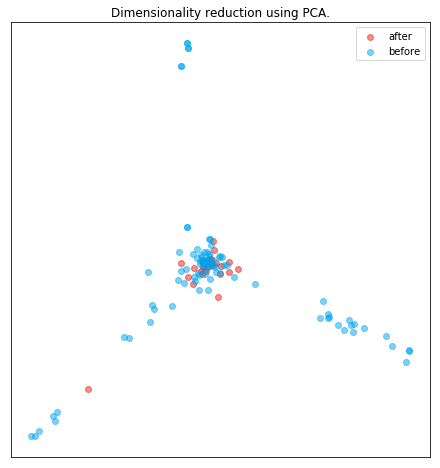

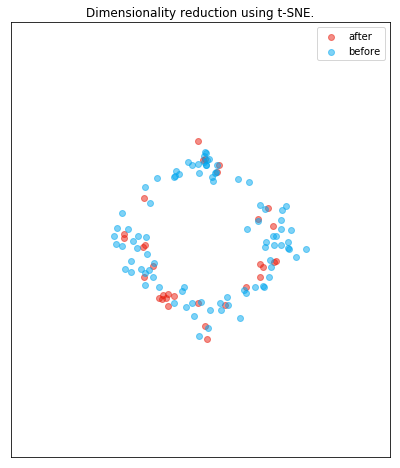



 ----- df_documents_50_50_balanced ---- 

Stored 'df' (DataFrame)


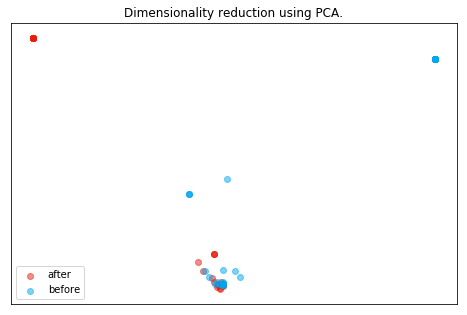

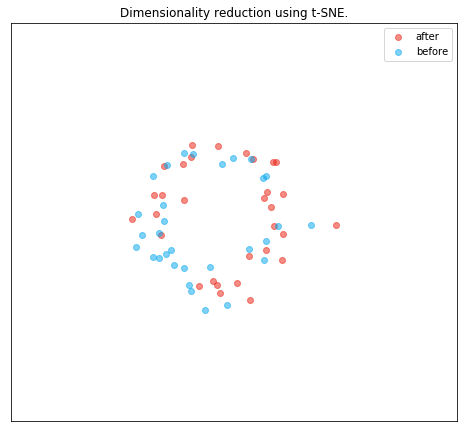



 ----- df_documents_all_3sentences ---- 

Stored 'df' (DataFrame)


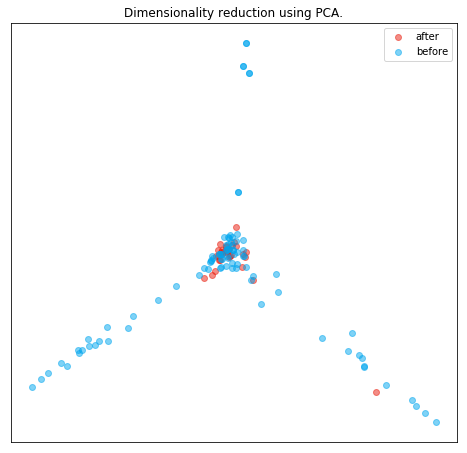

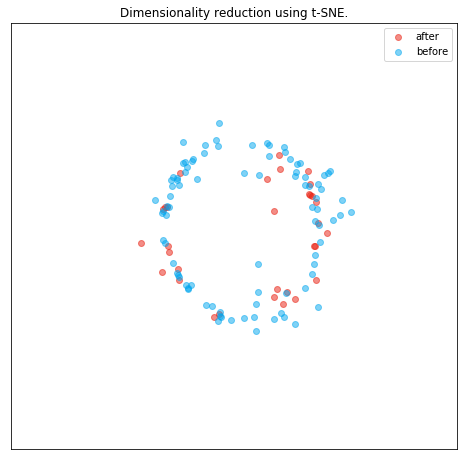



 ----- df_documents_50_50_balanced_3sentences ---- 

Stored 'df' (DataFrame)


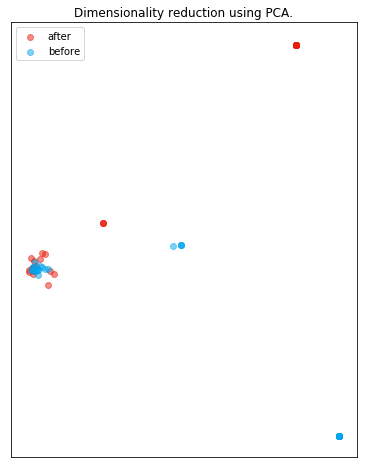

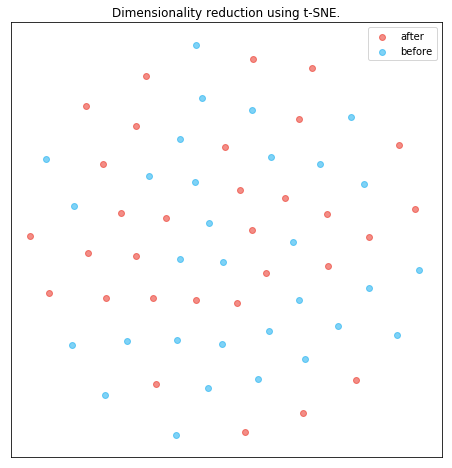



 ----- df_documents_all_5sentences ---- 

Stored 'df' (DataFrame)


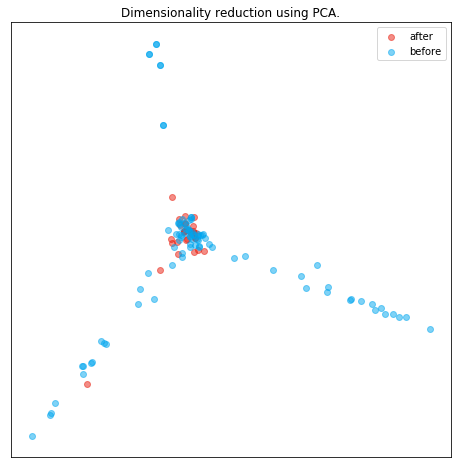

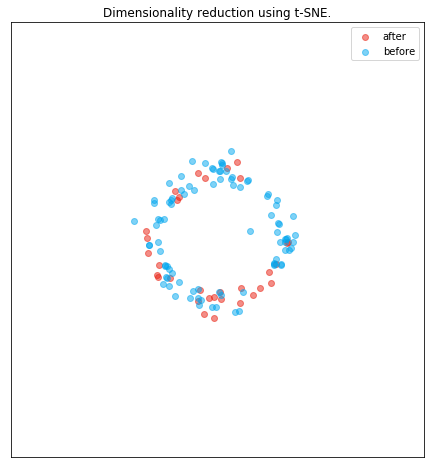



 ----- df_documents_50_50_balanced_5sentences ---- 

Stored 'df' (DataFrame)


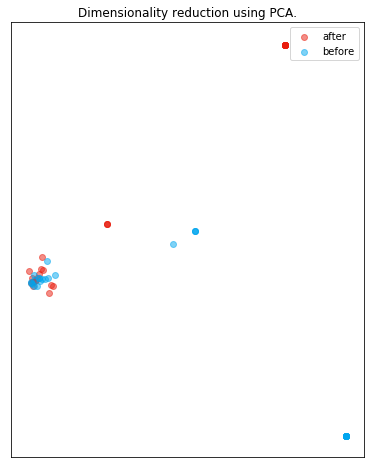

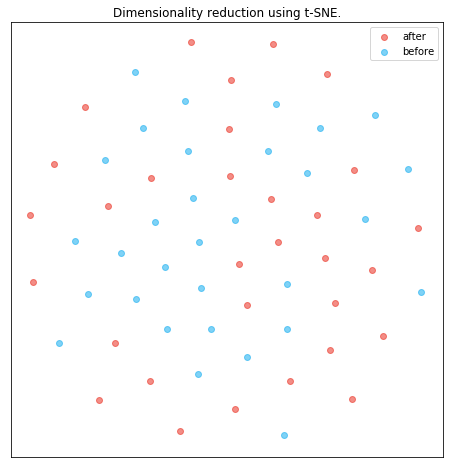

In [56]:
df = df_documents_all                  #1.1
print("\n\n ----- df_documents_all ---- \n")
%store df
%run unsupervised_classification.ipynb


df = df_documents_50_50_balanced       #1.3
print("\n\n ----- df_documents_50_50_balanced ---- \n")
%store df
%run unsupervised_classification.ipynb


df = df_documents_all_3sentences       #2.1
print("\n\n ----- df_documents_all_3sentences ---- \n")
%store df
%run unsupervised_classification.ipynb

df = df_documents_50_50_balanced_3sentences       #2.3
print("\n\n ----- df_documents_50_50_balanced_3sentences ---- \n")
%store df
%run unsupervised_classification.ipynb


df = df_documents_all_5sentences       #3.1
print("\n\n ----- df_documents_all_5sentences ---- \n")
%store df
%run unsupervised_classification.ipynb

df = df_documents_50_50_balanced_5sentences       #3.3
print("\n\n ----- df_documents_50_50_balanced_5sentences ---- \n")
%store df
%run unsupervised_classification.ipynb


#### Conclusion

* PCA dimensionality reduction seems to point that there are some differences on the vocabulary used when citing paper before and after this paper is retracted. Let's now try to classify the text using a supervised approach.

## Naive Bayes Algorithm - Supervised classification

In [83]:
import nltk 

def find_features(document, word_features):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

def train_Naive_Bayes(documents, list_all_words, spliting_training_test_ratio = 0.25):
    
    # Word frequencies
    all_words_freq = nltk.FreqDist(list_all_words)
    word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

    featuresets = [(find_features(article, word_features), cat) for (article, cat) in documents]

    # set that we'll train our classifier with                    
    test_size = round(spliting_training_test_ratio * len(featuresets))
    print("documents in test_set: \t", test_size)
    print("documents in training_set: \t", len(featuresets) -test_size)
    
    training_set = featuresets[test_size:]

    # set that we'll test against.
    testing_set = featuresets[:test_size]

    classifier = nltk.NaiveBayesClassifier.train(training_set)
    print("\nClassifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
    
    classifier.show_most_informative_features(100)
    
    return classifier
    
    

                         
                         
"""
list_all_words_50_50_freq = nltk.FreqDist(list_all_words_50_50) 
all_words_50_50_features = list(list_all_words_50_50_freq.keys())

list_all_words_50_50_balanced_freq = nltk.FreqDist(list_all_words_50_50_balanced)
all_words_50_50_balanced_features =  nltk.FreqDist(list_all_words_50_50_balanced)

list_all_words_3sentences_freq = nltk.FreqDist(list_all_words_3sentences)

list_all_words_50_50_3sentences_freq = nltk.FreqDist(list_all_words_50_50_3sentences)

list_all_words_50_50_balanced_3sentences_freq = nltk.FreqDist(list_all_words_50_50_balanced_3sentences)
"""

'\nlist_all_words_50_50_freq = nltk.FreqDist(list_all_words_50_50) \nall_words_50_50_features = list(list_all_words_50_50_freq.keys())\n\nlist_all_words_50_50_balanced_freq = nltk.FreqDist(list_all_words_50_50_balanced)\nall_words_50_50_balanced_features =  nltk.FreqDist(list_all_words_50_50_balanced)\n\nlist_all_words_3sentences_freq = nltk.FreqDist(list_all_words_3sentences)\n\nlist_all_words_50_50_3sentences_freq = nltk.FreqDist(list_all_words_50_50_3sentences)\n\nlist_all_words_50_50_balanced_3sentences_freq = nltk.FreqDist(list_all_words_50_50_balanced_3sentences)\n'

In [58]:
### 1. With one sentence citing:

#### 1.1 -  All documents

train_Naive_Bayes(documents_all, list_all_words, 0.20)

documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 70.83333333333334
Most Informative Features
                 increas = True            after : before =      7.4 : 1.0
                  number = True            after : before =      6.6 : 1.0
                  despit = True            after : before =      6.6 : 1.0
                     use = True            after : before =      5.4 : 1.0
                  articl = True            after : before =      4.7 : 1.0
                   novel = True            after : before =      4.7 : 1.0
                   organ = True            after : before =      4.7 : 1.0
                  surviv = True            after : before =      4.7 : 1.0
                   group = True            after : before =      4.7 : 1.0
                 present = True            after : before =      4.7 : 1.0
                   liver = True            after : before =      4.7 : 1.0
                    show = True          

In [59]:
train_Naive_Bayes(documents_all, list_all_bigrams, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 70.83333333333334
Most Informative Features
    ('nation', 'cancer') = False           after : before =      1.0 : 1.0
       ('peopl', 'live') = False           after : before =      1.0 : 1.0
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
 ('express', 'demonstr') = False           after : before =      1.0 : 1.0
     ('mark', 'increas') = False           after : before =      1.0 : 1.0
    ('sever', 'subunit') = False           after : before =      1.0 : 1.0
      ('toler', 'young') = False           after : before =      1.0 : 1.0
    ('demonstr', 'gene') = False           after : before =      1.0 : 1.0
   ('coverag', 'effect') = False           after : before =      1.0 : 1.0
      ('liver', 'induc') = False           after : before =      1.0 : 1.0
       ('state', 'unit') = False           after : before =      1.0 : 1.0
  ('opportun', 'breast') = False         

In [60]:
#### 1.2 -  50 % before - 50% after

train_Naive_Bayes(documents_50_50, list_all_words_50_50, 0.20)


documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 84.61538461538461
Most Informative Features
                    gene = True           before : after  =      5.7 : 1.0
                     use = True            after : before =      5.4 : 1.0
                    role = True           before : after  =      4.8 : 1.0
                   human = True           before : after  =      4.8 : 1.0
                prolifer = True           before : after  =      3.9 : 1.0
                 increas = True            after : before =      3.3 : 1.0
                    head = True           before : after  =      3.0 : 1.0
                  factor = True           before : after  =      3.0 : 1.0
                  target = True           before : after  =      3.0 : 1.0
                  signal = True           before : after  =      2.9 : 1.0
                   level = True            after : before =      2.8 : 1.0
                    show = True          

In [61]:
train_Naive_Bayes(documents_50_50, list_all_bigrams_50_50, 0.20)


documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 23.076923076923077
Most Informative Features
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
     ('mark', 'increas') = False           after : before =      1.0 : 1.0
    ('sever', 'subunit') = False           after : before =      1.0 : 1.0
      ('toler', 'young') = False           after : before =      1.0 : 1.0
   ('coverag', 'effect') = False           after : before =      1.0 : 1.0
      ('liver', 'induc') = False           after : before =      1.0 : 1.0
  ('opportun', 'breast') = False           after : before =      1.0 : 1.0
     ('circul', 'level') = False           after : before =      1.0 : 1.0
     ('combin', 'vitro') = False           after : before =      1.0 : 1.0
  ('carolina', 'chapel') = False           after : before =      1.0 : 1.0
('albeit', 'background') = False           after : before =      1.0 : 1.0
     ('liver', 'factor') = False        

In [62]:
#### 1.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced, list_all_words_50_50_balanced, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 75.0
Most Informative Features
                 describ = True            after : before =      8.3 : 1.0
                  stimul = True            after : before =      7.0 : 1.0
                  secret = True            after : before =      7.0 : 1.0
                receptor = True            after : before =      3.9 : 1.0
                although = True           before : after  =      3.7 : 1.0
                   could = True           before : after  =      3.7 : 1.0
                  report = True            after : before =      3.6 : 1.0
                  glucos = True            after : before =      3.6 : 1.0
                   howev = True            after : before =      3.3 : 1.0
                  recent = True            after : before =      3.3 : 1.0
                    mice = True            after : before =      3.3 : 1.0
                  effect = True            after : bef

In [63]:
train_Naive_Bayes(documents_50_50_balanced, list_all_bigrams_50_50_balanced, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 50.0
Most Informative Features
   ('circul', 'insulin') = False           after : before =      1.0 : 1.0
    ('toler', 'insulin') = False           after : before =      1.0 : 1.0
   ('respect', 'combin') = False           after : before =      1.0 : 1.0
      ('process', 'not') = False           after : before =      1.0 : 1.0
       ('mass', 'studi') = False           after : before =      1.0 : 1.0
       ('mutat', 'caus') = False           after : before =      1.0 : 1.0
    ('resist', 'result') = False           after : before =      1.0 : 1.0
 ('subsequ', 'research') = False           after : before =      1.0 : 1.0
   ('associ', 'nicotin') = False           after : before =      1.0 : 1.0
   ('knockout', 'islet') = False           after : before =      1.0 : 1.0
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
    ('replic', 'improv') = False           after : bef

In [64]:
### 2. With one sentence citing + following 3 sentences:

#### 2.1 -  All documents

train_Naive_Bayes(documents_all_3sentences, list_all_words_3sentences, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 79.16666666666666
Most Informative Features
                  despit = True            after : before =      9.4 : 1.0
                     due = True            after : before =      7.7 : 1.0
                     via = True            after : before =      7.7 : 1.0
             biosynthesi = True            after : before =      6.0 : 1.0
                 mainten = True            after : before =      6.0 : 1.0
                    upon = True            after : before =      6.0 : 1.0
                pancreat = True            after : before =      6.0 : 1.0
               transport = True            after : before =      6.0 : 1.0
                  domain = True            after : before =      6.0 : 1.0
                 univers = True            after : before =      6.0 : 1.0
                     per = True            after : before =      6.0 : 1.0
                    risk = True          

In [65]:

train_Naive_Bayes(documents_all_3sentences, list_all_bigrams_3sentences, 0.20)



documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 79.16666666666666
Most Informative Features
    ('control', 'avoid') = False           after : before =      1.0 : 1.0
    ('nation', 'cancer') = False           after : before =      1.0 : 1.0
  ('immunolog', 'first') = False           after : before =      1.0 : 1.0
    ('tropism', 'virus') = False           after : before =      1.0 : 1.0
      ('follow', 'fold') = False           after : before =      1.0 : 1.0
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
     ('erron', 'result') = False           after : before =      1.0 : 1.0
      ('toler', 'young') = False           after : before =      1.0 : 1.0
    ('demonstr', 'gene') = False           after : before =      1.0 : 1.0
('demonstr', 'interact') = False           after : before =      1.0 : 1.0
     ('indic', 'amplif') = False           after : before =      1.0 : 1.0
    ('express', 'enzym') = False         

In [66]:
#### 2.2 -  50 % before - 50% after

train_Naive_Bayes(documents_50_50_3sentences, list_all_words_50_50_3sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 53.84615384615385
Most Informative Features
                  promot = True           before : after  =      4.2 : 1.0
                   tissu = True           before : after  =      4.2 : 1.0
                approach = True            after : before =      3.8 : 1.0
                research = True            after : before =      3.8 : 1.0
                    mous = True           before : after  =      3.5 : 1.0
                    role = True           before : after  =      3.2 : 1.0
                  system = True            after : before =      3.1 : 1.0
                    base = True            after : before =      3.1 : 1.0
                    caus = True            after : before =      3.1 : 1.0
                   serum = True            after : before =      3.1 : 1.0
                 previou = True            after : before =      3.1 : 1.0
                 inhibit = True          

In [67]:
train_Naive_Bayes(documents_50_50_3sentences, list_all_bigrams_50_50_3sentences, 0.20)

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 46.15384615384615
Most Informative Features
   ('clarifi', 'kidney') = False           after : before =      1.0 : 1.0
      ('follow', 'fold') = False           after : before =      1.0 : 1.0
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
   ('measur', 'insulin') = False           after : before =      1.0 : 1.0
  ('product', 'increas') = False           after : before =      1.0 : 1.0
     ('mark', 'increas') = False           after : before =      1.0 : 1.0
    ('sever', 'subunit') = False           after : before =      1.0 : 1.0
  ('activ', 'contribut') = False           after : before =      1.0 : 1.0
      ('toler', 'young') = False           after : before =      1.0 : 1.0
     ('pathway', 'pool') = False           after : before =      1.0 : 1.0
   ('sustain', 'higher') = False           after : before =      1.0 : 1.0
   ('coverag', 'effect') = False         

In [68]:
#### 2.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced_3sentences, list_all_words_50_50_balanced_3sentences, 0.20)



documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 83.33333333333334
Most Informative Features
                  remain = True            after : before =      9.4 : 1.0
                   model = True           before : after  =      8.9 : 1.0
                 present = True            after : before =      8.9 : 1.0
                  assess = True            after : before =      7.7 : 1.0
                 subject = True           before : after  =      7.4 : 1.0
                    fail = True            after : before =      7.1 : 1.0
                conflict = True            after : before =      7.1 : 1.0
                  induct = True            after : before =      7.1 : 1.0
                individu = True            after : before =      7.1 : 1.0
                  analyz = True            after : before =      7.1 : 1.0
                 attempt = True            after : before =      7.1 : 1.0
                   other = True          

In [69]:

train_Naive_Bayes(documents_50_50_balanced_3sentences, list_all_bigrams_50_50_balanced_3sentences, 0.20)

documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 33.33333333333333
Most Informative Features
       ('includ', 'thu') = False           after : before =      1.0 : 1.0
   ('clarifi', 'kidney') = False           after : before =      1.0 : 1.0
  ('immunolog', 'first') = False           after : before =      1.0 : 1.0
      ('follow', 'fold') = False           after : before =      1.0 : 1.0
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
   ('measur', 'insulin') = False           after : before =      1.0 : 1.0
     ('mark', 'increas') = False           after : before =      1.0 : 1.0
      ('toler', 'young') = False           after : before =      1.0 : 1.0
       ('three', 'item') = False           after : before =      1.0 : 1.0
   ('associ', 'develop') = False           after : before =      1.0 : 1.0
   ('coverag', 'effect') = False           after : before =      1.0 : 1.0
      ('liver', 'induc') = False         

In [70]:
### 3. With one sentence citing + following 3 sentences:

#### 3.1 -  All documents

train_Naive_Bayes(documents_all_5sentences, list_all_words_5sentences, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 83.33333333333334
Most Informative Features
                  better = True            after : before =      8.6 : 1.0
                 earlier = True            after : before =      5.4 : 1.0
                   medic = True            after : before =      5.4 : 1.0
                prognost = True            after : before =      5.4 : 1.0
                pancreat = True            after : before =      5.4 : 1.0
               pulmonari = True            after : before =      5.4 : 1.0
                concentr = True            after : before =      5.4 : 1.0
                   enabl = True            after : before =      5.4 : 1.0
                 disrupt = True            after : before =      5.4 : 1.0
                    term = True            after : before =      5.4 : 1.0
                     per = True            after : before =      5.4 : 1.0
                   liver = True          

In [71]:


train_Naive_Bayes(documents_all_5sentences, list_all_bigrams_5sentences, 0.20)

documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 87.5
Most Informative Features
    ('control', 'avoid') = False           after : before =      1.0 : 1.0
    ('nation', 'cancer') = False           after : before =      1.0 : 1.0
    ('prostat', 'tissu') = False           after : before =      1.0 : 1.0
     ('resist', 'train') = False           after : before =      1.0 : 1.0
   ('similar', 'effect') = False           after : before =      1.0 : 1.0
    ('tropism', 'virus') = False           after : before =      1.0 : 1.0
      ('follow', 'fold') = False           after : before =      1.0 : 1.0
 ('influenc', 'potenti') = False           after : before =      1.0 : 1.0
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
     ('erron', 'result') = False           after : before =      1.0 : 1.0
      ('toler', 'young') = False           after : before =      1.0 : 1.0
 ('relationship', 'crc') = False           after : bef

In [72]:
#### 3.2 -  50 % before - 50% after


train_Naive_Bayes(documents_50_50_5sentences, list_all_words_50_50_5sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 61.53846153846154
Most Informative Features
               metastasi = True           before : after  =      5.7 : 1.0
                 predict = True            after : before =      4.9 : 1.0
                 sequenc = True            after : before =      4.1 : 1.0
                interact = True            after : before =      4.1 : 1.0
                   invas = True           before : after  =      3.9 : 1.0
                metastat = True           before : after  =      3.9 : 1.0
                  glucos = True            after : before =      3.4 : 1.0
                 primari = True            after : before =      3.4 : 1.0
                 univers = True            after : before =      3.4 : 1.0
                individu = True            after : before =      3.4 : 1.0
                     due = True            after : before =      3.4 : 1.0
              transcript = True          

In [73]:
train_Naive_Bayes(documents_50_50_5sentences, list_all_bigrams_50_50_5sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 38.46153846153847
Most Informative Features
   ('similar', 'effect') = False          before : after  =      1.0 : 1.0
      ('follow', 'fold') = False          before : after  =      1.0 : 1.0
 ('influenc', 'potenti') = False          before : after  =      1.0 : 1.0
('postnat', 'treatment') = False          before : after  =      1.0 : 1.0
      ('toler', 'young') = False          before : after  =      1.0 : 1.0
 ('relationship', 'crc') = False          before : after  =      1.0 : 1.0
   ('countri', 'factor') = False          before : after  =      1.0 : 1.0
    ('express', 'enzym') = False          before : after  =      1.0 : 1.0
  ('previou', 'statist') = False          before : after  =      1.0 : 1.0
     ('liver', 'factor') = False          before : after  =      1.0 : 1.0
       ('name', 'howev') = False          before : after  =      1.0 : 1.0
  ('activ', 'inhibitor') = False         

In [74]:

#### 3.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced_5sentences, list_all_words_50_50_balanced_5sentences, 0.20)



documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 58.333333333333336
Most Informative Features
                function = True           before : after  =      9.7 : 1.0
              differenti = True            after : before =      8.3 : 1.0
                     due = True            after : before =      8.3 : 1.0
                 endogen = True            after : before =      7.7 : 1.0
               transient = True            after : before =      7.7 : 1.0
                  potent = True            after : before =      7.7 : 1.0
            characterist = True            after : before =      7.7 : 1.0
                  assess = True            after : before =      7.7 : 1.0
                conflict = True            after : before =      7.7 : 1.0
                  examin = True            after : before =      7.7 : 1.0
                  induct = True            after : before =      7.7 : 1.0
            particularli = True         

In [75]:
train_Naive_Bayes(documents_50_50_balanced_5sentences, list_all_bigrams_50_50_balanced_5sentences, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 50.0
Most Informative Features
   ('clarifi', 'kidney') = False           after : before =      1.0 : 1.0
    ('control', 'avoid') = False           after : before =      1.0 : 1.0
   ('similar', 'effect') = False           after : before =      1.0 : 1.0
      ('follow', 'fold') = False           after : before =      1.0 : 1.0
 ('influenc', 'potenti') = False           after : before =      1.0 : 1.0
       ('peopl', 'live') = False           after : before =      1.0 : 1.0
   ('measur', 'insulin') = False           after : before =      1.0 : 1.0
    ('includ', 'absenc') = False           after : before =      1.0 : 1.0
('postnat', 'treatment') = False           after : before =      1.0 : 1.0
    ('smooth', 'striat') = False           after : before =      1.0 : 1.0
     ('mark', 'increas') = False           after : before =      1.0 : 1.0
      ('toler', 'young') = False           after : bef

## Conclusions

* As a working hypothesis we could assume that the paper is more heavily criticized and/or compared with other works once it has already been retracted. 

* Our analysis points to  a difference on the vocabulary used when citing a paper before and after this paper is retracted.

* Checking the words more frequently used after retraction we can actually find a set of words with negative feeling. This is more clear when having a balanced dataset and we consider the following 3 sentences: 
decreas, assess, alter, individu, induct, analyz, other, lack, remain, research, compar...
Although we can train a classifier the accuracy is not high: about 58%.

* We cannot deduce anything looking at bigrams due to the reduced dataset.

# 2. Using the citation corpus manually annotated by Awais Athar. 


## Settings

Download and unzip the citation sentiment corpus from http://cl.awaisathar.com/citation-sentiment-corpus/

This dataset contains 8736 sentences taken from different scientific papers. These sentences ares classified as positive (p), negative (n) or neutral (o).

## Uploading data

In [84]:
import pandas as pd
df_athar = pd.read_csv('citation_sentiment_corpus.txt', 
                    sep = '\t', 
                    names = ["Source_Paper_ID", 
                             "Target_Paper_ID", 
                             "Sentiment",
                             "Citation_Text"],
                    skiprows = 18)
df_athar


Source_Paper_ID Target_Paper_ID Sentiment  \
0           A00-1043        A00-2024         o   
1           H05-1033        A00-2024         o   
2           I05-2009        A00-2024         o   
3           I05-2009        A00-2024         o   
4           I05-2009        A00-2024         o   
5           I08-1016        A00-2024         o   
6           I08-2101        A00-2024         p   
7           J02-4002        A00-2024         o   
8           J02-4004        A00-2024         o   
9           J02-4005        A00-2024         p   
10          J02-4005        A00-2024         o   
11          J02-4005        A00-2024         o   
12          J02-4005        A00-2024         n   
13          J05-3002        A00-2024         o   
14          J05-3002        A00-2024         o   
15          J05-3002        A00-2024         o   
16          J05-3002        A00-2024         o   
17          J05-3002        A00-2024         o   
18          W02-0404        A00-2024         o   
19          W02-0404        A00-2024         o   
20          W03-1004        A00-2024         o   
21          W03-1102        A00-2024         p   
22          W09-0604        A00-2024         o   
23          W09-0604        A00-2024         o   
24          W09-0604        A00-2024         o   
25          W09-2807        A00-2024         o   
26          W09-2807        A00-2024         o   
27          W09-2808        A00-2024         o   
28          W09-2808        A00-2024         o   
29          A00-1026        A92-1018         o   
...              ...             ...       ...   
8706        W06-1618        W96-0213         o   
8707        W06-1666        W96-0213         o   
8708        W06-1701        W96-0213         o   
8709        W06-3327        W96-0213         p   
8710        W06-3603        W96-0213         o   
8711        W06-3603        W96-0213         o   
8712        W06-3603        W96-0213         o   
8713        W07-1202        W96-0213         o   
8714        W07-1209        W96-0213         o   
8715        W07-1516        W96-0213         p   
8716        W07-2053        W96-0213         o   
8717        W07-2206        W96-0213         o   
8718        W08-0206        W96-0213         o   
8719        W08-0206        W96-0213         o   
8720        W08-0206        W96-0213         o   
8721        W08-0409        W96-0213         o   
8722        W08-0611        W96-0213         o   
8723        W09-0416        W96-0213         o   
8724        W09-0715        W96-0213         o   
8725        W96-0111        W96-0213         o   
8726        W97-0301        W96-0213         o   
8727        W97-0301        W96-0213         o   
8728        W97-0301        W96-0213         o   
8729        W98-1116        W96-0213         p   
8730        W98-1117        W96-0213         o   
8731        W98-1118        W96-0213         p   
8732        W99-0606        W96-0213         o   
8733        W99-0607        W96-0213         o   
8734        W99-0607        W96-0213         p   
8735        W99-0608        W96-0213         o   

                                          Citation_Text  
0     We analyzed a set of articles and identified s...  
1     Table 3: Example compressions Compression AvgL...  
2     5.3 Related works and discussion Our two-step ...  
3     (1999) proposed a summarization system based o...  
4     We found that the deletion of lead parts did n...  
5     Automatic text summarization approaches have o...  
6     al., 1994), compression of sentences with Auto...  
7     Because of this, it is generally accepted that...  
8     Additionally, some research has explored cutti...  
9     But in fact, the issue of editing in text summ...  
10    Jing and McKeown (2000) and Jing (2000) propos...  
11    Our work in sentence reformulation is differen...  
12    Jing and McKeown (2000) have proposed a rule-b...  
13    As previously observed in the literature (Mani...  
14    In addition to sentence fusi

##### Let's look for a balanced dataset

In [85]:
# Same number of positive and negative citing sentences ("Source_Paper_ID") for the same cited doi ('Target_Paper_ID')
from modules.get_stemmed_sentences_and_list_words import *

list_doi_added = []
df_athar_balanced_negative_sentences = pd.DataFrame()
df_athar_balanced_positive_sentences = pd.DataFrame()
df_athar_balanced_neutral_sentences = pd.DataFrame()

for doi in df_athar["Target_Paper_ID"].unique():
    
    df_only_this_cited_doi = df_athar[df_athar["Target_Paper_ID"] == doi]
    
    df_athar_balanced_all_negative_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "n"]
    df_athar_balanced_all_positive_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "p"]
    df_athar_balanced_all_neutral_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "o"]
    
    number_all_negative_sentences = df_athar_balanced_all_negative_sentences.shape[0]
    number_all_neutral_sentences = df_athar_balanced_all_neutral_sentences.shape[0]
    number_all_positive_sentences = df_athar_balanced_all_positive_sentences.shape[0]
    
    if  number_all_negative_sentences <= number_all_neutral_sentences:
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences[:number_all_negative_sentences]
                                                        )
        df_athar_balanced_negative_sentences = df_athar_balanced_negative_sentences.append(
                                                        df_athar_balanced_all_negative_sentences
                                                        )    
    else: 
        df_athar_balanced_negative_sentences = df_athar_balanced_negative_sentences.append(
                                                        df_athar_balanced_all_negative_sentences[:number_all_neutral_sentences]
                                                        )
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences
                                                        )    

df_athar_documents_50_50_balanced = df_athar_balanced_neutral_sentences.append(df_athar_balanced_negative_sentences)

# used for unsupervised
athar_sentences_before = df_athar_balanced_neutral_sentences.Citation_Text
athar_sentences_after = df_athar_balanced_negative_sentences.Citation_Text

(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, athar_list_all_bigrams_50_50_balanced) = get_tuple_articles_stemmed_classified_and_list_words(athar_sentences_before, athar_sentences_after)


In [86]:
df_athar_balanced_negative_sentences.shape

(276, 4)

In [87]:
df_athar_documents_50_50_balanced.shape

(552, 4)

Our balanced dataset contains these 276 negative sentences and 276 neutral sentences.

## Classifier

### Using all documents

In [88]:
from modules.get_stemmed_sentences_and_list_words import *
#import imp
#imp.reload(modules.get_stemmed_sentences_and_list_words)

df_athar_negative = df_athar.loc[df_athar['Sentiment'] == "n", ['Sentiment','Citation_Text']]
df_athar_neutral= df_athar.loc[df_athar['Sentiment'] == "o", ['Sentiment','Citation_Text']]#[:df_athar_negative.shape[0]]

sentences_neutral = df_athar_neutral.Citation_Text
sentences_negative = df_athar_negative.Citation_Text

df_documents_athar = df_athar_neutral.append(df_athar_negative)

(documents_athar, list_all_words_athar, list_all_bigrams_athar) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')


In [89]:
df_athar_negative.shape


(280, 2)

In [90]:
len(sentences_neutral)

7627

#### Unsupervised clustering

Stored 'df' (DataFrame)


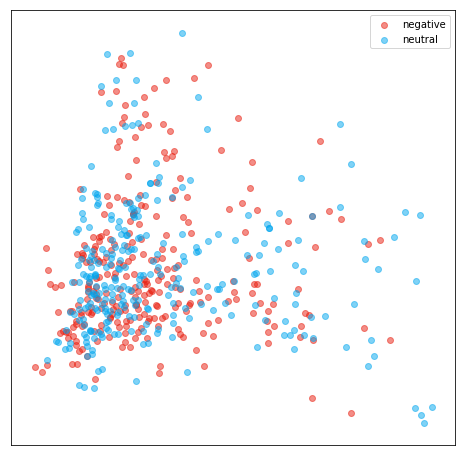

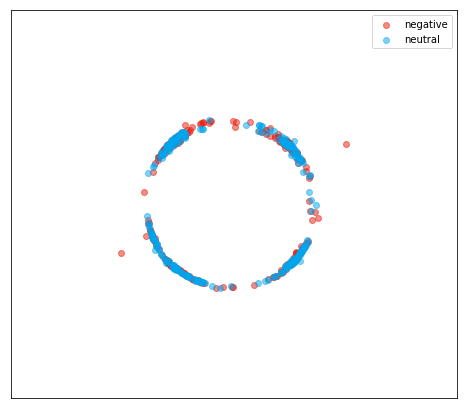

In [91]:
df = df_documents_athar                

%store df
%run unsupervised_classification_athar.ipynb

#### Naive Bayes - Supervised classifier

In [92]:
train_Naive_Bayes(documents_athar, list_all_words_athar, 0.20)



documents in test_set: 	 1581
documents in training_set: 	 6326

Classifier accuracy percent: 93.9911448450348
Most Informative Features
                   unabl = True           negati : neutra =     44.2 : 1.0
                 revisit = True           negati : neutra =     44.2 : 1.0
                    ongo = True           negati : neutra =     44.2 : 1.0
                  defici = True           negati : neutra =     44.2 : 1.0
              outperform = True           negati : neutra =     44.2 : 1.0
                  faster = True           negati : neutra =     31.3 : 1.0
                 noisier = True           negati : neutra =     26.5 : 1.0
              thoroughli = True           negati : neutra =     26.5 : 1.0
               unrealist = True           negati : neutra =     26.5 : 1.0
              understood = True           negati : neutra =     26.5 : 1.0
                  analyt = True           negati : neutra =     26.5 : 1.0
                 burgess = True       

### 50% negative - 50% neutral sentences dataset

In [93]:
df_athar_negative = df_athar.loc[df_athar['Sentiment'] == "n", ['Sentiment','Citation_Text']]
df_athar_neutral_selection = df_athar.loc[df_athar['Sentiment'] == "o", ['Sentiment','Citation_Text']][:df_athar_negative.shape[0]]

df_documents_athar_50_50 = df_athar_negative.append(df_athar_neutral_selection)

################

sentences_neutral = df_athar_neutral_selection.Citation_Text
sentences_negative = df_athar_negative.Citation_Text
(documents_athar_50_50, list_all_words_athar_50_50, list_all_bigrams_athar_50_50) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')
################



train_Naive_Bayes(documents_athar_50_50, list_all_words_athar_50_50, 0.20)




documents in test_set: 	 112
documents in training_set: 	 448

Classifier accuracy percent: 83.92857142857143
Most Informative Features
                     cut = True           neutra : negati =     22.8 : 1.0
                although = True           negati : neutra =     14.0 : 1.0
                   brown = True           negati : neutra =     13.9 : 1.0
                 similar = True           neutra : negati =     10.7 : 1.0
                  collin = True           negati : neutra =     10.1 : 1.0
                 describ = True           neutra : negati =      9.4 : 1.0
                    show = True           negati : neutra =      9.2 : 1.0
                thesauru = True           neutra : negati =      8.1 : 1.0
                     lin = True           neutra : negati =      6.2 : 1.0
                  summar = True           neutra : negati =      6.2 : 1.0
                   evalu = True           negati : neutra =      6.0 : 1.0
              unsupervis = True        

#### Unsupervised clustering

Stored 'df' (DataFrame)


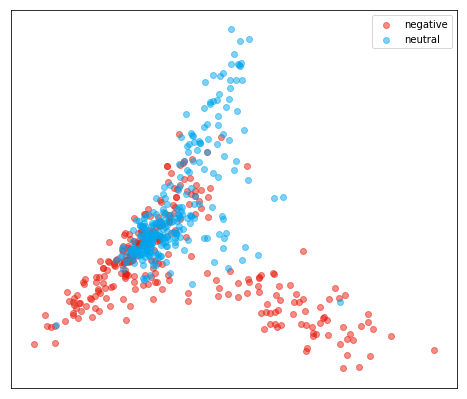

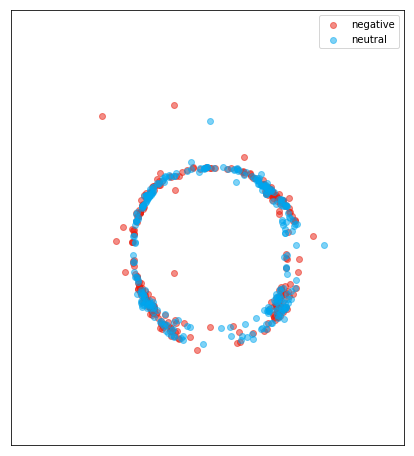

In [97]:
df = df_documents_athar_50_50                

%store df
%run unsupervised_classification_athar.ipynb

### Balanced dataset

#### Naive Bayes - Supervised classifier

Stored 'df' (DataFrame)


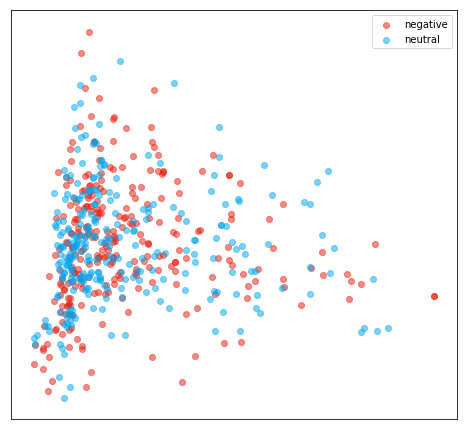

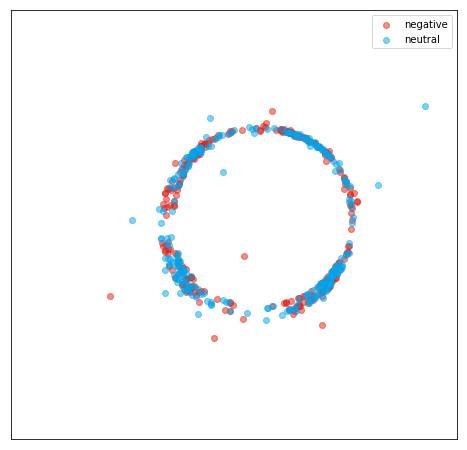

In [99]:
df = df_athar_documents_50_50_balanced                

%store df
%run unsupervised_classification_athar.ipynb




In [100]:
model_Naive_Bayes = train_Naive_Bayes(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, 0.20)



documents in test_set: 	 110
documents in training_set: 	 442

Classifier accuracy percent: 77.27272727272727
Most Informative Features
              outperform = True            after : before =     13.0 : 1.0
                   while = True            after : before =     11.7 : 1.0
                 bilingu = True           before : after  =      9.0 : 1.0
                      no = True            after : before =      7.7 : 1.0
                although = True            after : before =      7.0 : 1.0
                   limit = True            after : before =      6.3 : 1.0
                   small = True            after : before =      6.3 : 1.0
                    show = True            after : before =      5.8 : 1.0
                    make = True            after : before =      5.7 : 1.0
                  provid = True            after : before =      5.7 : 1.0
                advantag = True            after : before =      5.0 : 1.0
                  origin = True        

## Conclusions

* Using 50% negative sentences and 50% neutral sentences, an unsupervised classifier can cluster tehm into two groups, although there is some overlap. 

* Using a balanced dataset, the number of documents is reduced and the unsupervised clustering doesn't work. However, the vocabulary is cleaner (surnames, for instance have been filtered out). 

# 3. Analysis of the sentiment in sentences citing retracted papers (from #1) using a Naive Bayes classifier (from #2)

* Let's check whether our working hypothesis in #1 was correct.

* Let's check whether it is possible to improve the classifier (from #2) by using additional sentences from #1.

* Note that we are creating here the features using athar_list_all_words_50_50_balanced. However, to train another agorithm you must use all words from the documents.

In [101]:
import imp
import sys
sys.path.insert(0, "./modules")


* df_1sentence has the sentences citing for each section as indepent features whereas df1sentence_sentences_classification has all the sentences citing a retracted paper merged as a single string. I will use df1sentence_sentences_classification.

* The cell bellow creates the dataframe df1sentence_sentences_classification_NBayes which includes all the information from df1sentence_sentences_classification and a new feature "Naive_Bayes_prediction". This feature takes the value "before" if the Naive Bayes classifier trained in section #2 classifies the sentence as citing, and it takes the value "after" if the sentence is classified as critizising.


In [102]:

df1sentence_sentences_classification_NBayes = df1sentence_sentences_classification

list_prediction_NBayes = []
for index, row, in df1sentence_sentences_classification_NBayes.iterrows():
    #print(row.sentences_citing)
    
    list_sentences = [row.sentences_citing] #sentences_after #athar_sentences_after[12]
    list_sentences_tokenized_stemmed = get_stemmed_sentence(list_sentences)

    all_words_freq = nltk.FreqDist(athar_list_all_words_50_50_balanced)
    word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

    list_features_for_all_sentences = []
    for sentence in list_sentences_tokenized_stemmed:
        features = find_features(sentence, word_features)
        list_features_for_all_sentences.append(features)

    predicted = model_Naive_Bayes.classify_many(list_features_for_all_sentences)
    list_prediction_NBayes = list_prediction_NBayes + predicted
    #print(index, '\t', predicted)

df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] = list_prediction_NBayes

df1sentence_sentences_classification_NBayes.head(3)


DOI_cited      doi_article_citing  before_retraction  \
0     10.1186/s13033-017-0143-5                     NaN                  0   
1            10.1002/cbin.10291     10.1042/BSR20160174                  1   
2  10.1371/journal.pone.0164571  10.3390/ijerph14060602                  0   

   after_retraction                                   sentences_citing  \
0                 1   1)  Although there has been meaningful debate...   
1                 0  To verify the activation of FOXO1 in our model...   
2                 1  The persistent practice of open defecation may...   

  Naive_Bayes_prediction  
0                  after  
1                 before  
2                  after

* How many papers published before the retraction were citing and how many critizising?

In [103]:
before_classified_as_non_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 1, 'Naive_Bayes_prediction']).count('before')
before_classified_as_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 1, 'Naive_Bayes_prediction']).count('after')

after_classified_as_non_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 0, 'Naive_Bayes_prediction']).count('before')
after_classified_as_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 0, 'Naive_Bayes_prediction']).count('after')

print('Number of documents:', 
      '\n before_classified_as_non_critizising: \t', before_classified_as_non_critizising,
      '\n before_classified_as_critizising: \t', before_classified_as_critizising,
      '\n after_classified_as_non_critizising: \t', after_classified_as_non_critizising,
      '\n after_classified_as_critizising: \t', after_classified_as_critizising
      )

Number of documents: 
 before_classified_as_non_critizising: 	 42 
 before_classified_as_critizising: 	 48 
 after_classified_as_non_critizising: 	 15 
 after_classified_as_critizising: 	 17


* This explains why the vocabulary obtained with the Naive Bayes algorithm trained on sentences from papers citing retracted papers cannot provide a clean list of words used when critizising. 

In [104]:
sentences_NBayes_predicts_critizising = (
    df1sentence_sentences_classification_NBayes.loc[
    df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] == 'after',
        ['sentences_citing', 'before_retraction']])

sentences_NBayes_predicts_non_critizising = (
    df1sentence_sentences_classification_NBayes.loc[
    df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] == 'before',
        ['sentences_citing', 'before_retraction']])

In [105]:
sentences_NBayes_predicts_non_critizising.head(3)

sentences_citing  before_retraction
1  To verify the activation of FOXO1 in our model...                  1
3  in a S961-induced insulin resistance mouse mod...                  1
5   Betatrophin, also known as lipasin (  19  ) o...                  0

#### Let's have a look at the sentences and how they have been classified

* Papers classified as critizing:

In [106]:
for index, row in sentences_NBayes_predicts_critizising.iterrows():
    print("\n %%%%%%%%%%%%   ",index, "   - before retraction: ", row.before_retraction, "-   %%%%%%%%%%%%% \n\n", row.sentences_citing)


 %%%%%%%%%%%%    0    - before retraction:  0 -   %%%%%%%%%%%%% 

  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  
      1
     
     –
     
      3)
     
     In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder. 
      1)
     
     Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,
     
      4)
     
     research has already begun to investigate treatments for the disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already

* Papers classified as non critizising

In [107]:
for index, row in sentences_NBayes_predicts_non_critizising.iterrows():
    print("\n %%%%%%%%%%%%   ",index, "   - before retraction: ", row.before_retraction, "-   %%%%%%%%%%%%% \n\n", row.sentences_citing)


 %%%%%%%%%%%%    1    - before retraction:  1 -   %%%%%%%%%%%%% 

 To verify the activation of FOXO1 in our model, we measured mRNA levels of  PIK3C3  and  Sod2  , gene targets of FOXO1 that also encode for autophagy-associated proteins .   To verify the activation of FOXO1 in our model, we measured mRNA levels of  PIK3C3  and  Sod2  , gene targets of FOXO1 that also encode for autophagy-associated proteins .

 %%%%%%%%%%%%    3    - before retraction:  1 -   %%%%%%%%%%%%% 

 in a S961-induced insulin resistance mouse model .  in a S961-induced insulin resistance mouse model . in a S961-induced insulin resistance mouse model .

 %%%%%%%%%%%%    5    - before retraction:  0 -   %%%%%%%%%%%%% 

  Betatrophin, also known as lipasin (  19  ) or angiopoietin-like 8 (  20  ), was recently described as a potent stimulator of mouse β-cell proliferation (  21  ). Its transient overexpression in the liver induces β-cell proliferation and improves glucose tolerance in young adult mice (  21  ). 

### Let's filter the sentences

Critizising: After retraction and classified as critizising by the Naive Bayes model

    
Non-critizising: Before retraction and classified as neutral by the Naive Bayes model

In [108]:
mask_before = (df1sentence_sentences_classification_NBayes.before_retraction == 1) & (
        df1sentence_sentences_classification_NBayes.Naive_Bayes_prediction == 'before')

mask_after = (df1sentence_sentences_classification_NBayes.before_retraction == 0) & (
        df1sentence_sentences_classification_NBayes.Naive_Bayes_prediction == 'after')
        
sentences_before_non_critizising_filtered = df1sentence_sentences_classification_NBayes[mask_before].sentences_citing
sentences_after_critizising_filtered = df1sentence_sentences_classification_NBayes[mask_after].sentences_citing


In [109]:
sentences_before_non_critizising_filtered.shape

(42,)

In [110]:
sentences_after_critizising_filtered.shape

(17,)

### Naive Bayes Classifier

* Using all the documents

In [111]:
(documents_athar_before_after, list_all_words_athar_before_after, list_all_bigrams_athar_before_after) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_non_critizising_filtered, 
                                                                                                                       sentences_after_critizising_filtered,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



train_Naive_Bayes(documents_athar_before_after, list_all_words_athar_before_after, 0.20)



documents in test_set: 	 12
documents in training_set: 	 47

Classifier accuracy percent: 75.0
Most Informative Features
                     use = True           negati : neutra =      5.4 : 1.0
                previous = True           negati : neutra =      4.8 : 1.0
                 express = True           negati : neutra =      4.8 : 1.0
                   level = True           negati : neutra =      3.7 : 1.0
                   liver = True           negati : neutra =      3.4 : 1.0
                 mainten = True           negati : neutra =      3.4 : 1.0
                     may = True           negati : neutra =      3.2 : 1.0
                  associ = True           negati : neutra =      2.9 : 1.0
                      no = True           negati : neutra =      2.9 : 1.0
                    evid = True           negati : neutra =      2.9 : 1.0
                    cell = True           negati : neutra =      2.5 : 1.0
                 patient = True           neutra : neg

In [112]:
len(sentences_before_non_critizising_filtered)

42

In [113]:
len(sentences_after_critizising_filtered)

17

* Using same number of documents published before and after retraction.

In [114]:
sentences_before_non_critizising_filtered_limited = sentences_before_non_critizising_filtered[:len(sentences_after_critizising_filtered)] 
sentences_after_critizising_filtered


(documents_athar_before_after_50_50, list_all_words_athar_before_after_50_50, list_all_bigrams_athar_before_after) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_non_critizising_filtered_limited, 
                                                                                                                       sentences_after_critizising_filtered,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



train_Naive_Bayes(documents_athar_before_after_50_50, list_all_words_athar_before_after_50_50, 0.20)






documents in test_set: 	 7
documents in training_set: 	 27

Classifier accuracy percent: 28.57142857142857
Most Informative Features
                     may = True           negati : neutra =      4.5 : 1.0
                  report = True           negati : neutra =      3.7 : 1.0
                function = True           negati : neutra =      3.7 : 1.0
                    gene = True           neutra : negati =      3.0 : 1.0
                previous = True           negati : neutra =      2.9 : 1.0
                   studi = True           negati : neutra =      2.9 : 1.0
                 express = True           negati : neutra =      2.9 : 1.0
                    cell = True           negati : neutra =      2.7 : 1.0
                  target = True           neutra : negati =      2.4 : 1.0
                   level = True           negati : neutra =      2.2 : 1.0
                 pathway = True           negati : neutra =      2.1 : 1.0
                     not = True           

* Using balanced dataset

In [115]:
athar_documents_50_50_balanced

[(['although',
   'author',
   'brown',
   'state',
   'would',
   'discuss',
   'search',
   'problem',
   'followup',
   'far',
   'no',
   'public',
   'devot',
   'decod',
   'issu',
   'statist',
   'machin',
   'translat'],
  'after'),
 (['optim',
   'measur',
   'done',
   'implement',
   'baselin',
   'compar',
   'translat',
   'pattern',
   'match',
   'convent',
   'exact',
   'model',
   'represent',
   'use',
   'extern',
   'prefix',
   'tree'],
  'before'),
 (['among',
   'applic',
   'analysi',
   'lexic',
   'acquisit',
   'deriv',
   'syntact',
   'cue',
   'sens',
   'prefer',
   'acquisit',
   'select',
   'restrict',
   'lexic',
   'prefer',
   'gener',
   'word',
   'cluster',
   'etc',
   'major',
   'paper',
   'even',
   'though',
   'preced',
   'subsequ',
   'statist',
   'process',
   'reduc',
   'number',
   'accident',
   'associ',
   'larg',
   'corpora',
   'word',
   'necessari',
   'obtain',
   'reliabl',
   'data',
   'larg',
   'enough',
   'number',

### Let's train a Naive Bayes classifier using sentences from Athar and from paper citing a retracted paper.

In [116]:
# Adding sentences

sentences_before_non_critizising_filtered_limited = sentences_before_non_critizising_filtered[:len(sentences_after_critizising_filtered)] 
sentences_after_critizising_filtered


athar_sentences_before = df_athar_balanced_neutral_sentences.Citation_Text
athar_sentences_after = df_athar_balanced_negative_sentences.Citation_Text



all_neutral = sentences_before_non_critizising_filtered_limited.append(athar_sentences_before)
all_negative = sentences_after_critizising_filtered.append(athar_sentences_after)


(documents_athar_adding, list_all_words_athar_adding, list_all_bigrams_athar_adding) = get_tuple_articles_stemmed_classified_and_list_words(all_neutral, 
                                                                                                                       all_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



classifier_adding = train_Naive_Bayes(documents_athar_adding, list_all_words_athar_adding, 0.20)






documents in test_set: 	 117
documents in training_set: 	 469

Classifier accuracy percent: 76.92307692307693
Most Informative Features
                although = True           negati : neutra =     13.8 : 1.0
                    show = True           negati : neutra =     11.8 : 1.0
              outperform = True           negati : neutra =     11.1 : 1.0
                   while = True           negati : neutra =     10.5 : 1.0
                    time = True           negati : neutra =      8.4 : 1.0
                 bilingu = True           neutra : negati =      8.2 : 1.0
                    mani = True           negati : neutra =      7.8 : 1.0
                 increas = True           negati : neutra =      5.7 : 1.0
                    much = True           negati : neutra =      5.7 : 1.0
                  origin = True           negati : neutra =      5.7 : 1.0
                 current = True           negati : neutra =      5.1 : 1.0
                 address = True        

### Vocabulary used when criticising

In [117]:
# classifier_adding.most_informative_features()

In [118]:
def show_most_informative_features_in_list(classifier, n=10, corpus_label = 'negative'):
    #https://stackoverflow.com/questions/42970646/store-most-informative-features-from-nltk-naivebayesclassifier-in-a-list
    """
    Return a nested list of the "most informative" features 
    used by the classifier along with it's predominant labels
    """
    cpdist = classifier._feature_probdist       # probability distribution for feature values given labels
    feature_list = []
    corpus_negative = []
    for (fname, fval) in classifier.most_informative_features(n):
        def labelprob(l):
            return cpdist[l, fname].prob(fval)
        labels = sorted([l for l in classifier._labels if fval in cpdist[l, fname].samples()], 
                        key=labelprob)
        feature_list.append([fname, labels[-1]])
        if labels[-1] == corpus_label:
            corpus_negative.append(fname)
    return (feature_list, corpus_negative)

(list_features, corpus_negative) = show_most_informative_features_in_list(classifier_adding, n =20)

print("Vocabulary mainly used when critizising: \n")
corpus_negative


Vocabulary mainly used when critizising: 



['although',
 'show',
 'outperform',
 'while',
 'time',
 'mani',
 'increas',
 'much',
 'origin',
 'current',
 'address',
 'no',
 'but',
 'advantag',
 'small',
 'correl']

##### Let's compare with the vocabulary obtained using just the sentences annotated by Athar (athar_documents_50_50_balanced)

In [119]:
model_Naive_Bayes = train_Naive_Bayes(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, 0.20)

(list_features_athar_50_50_balanced, corpus_negative_athar_50_50_balanced) = show_most_informative_features_in_list(model_Naive_Bayes, n =25, corpus_label = 'after')

# corpus_negative_athar_50_50_balanced


documents in test_set: 	 110
documents in training_set: 	 442

Classifier accuracy percent: 77.27272727272727
Most Informative Features
              outperform = True            after : before =     13.0 : 1.0
                   while = True            after : before =     11.7 : 1.0
                 bilingu = True           before : after  =      9.0 : 1.0
                      no = True            after : before =      7.7 : 1.0
                although = True            after : before =      7.0 : 1.0
                   limit = True            after : before =      6.3 : 1.0
                   small = True            after : before =      6.3 : 1.0
                    show = True            after : before =      5.8 : 1.0
                    make = True            after : before =      5.7 : 1.0
                  provid = True            after : before =      5.7 : 1.0
                advantag = True            after : before =      5.0 : 1.0
                  origin = True        

In [120]:
corpus_negative_athar_50_50_balanced

['outperform',
 'while',
 'no',
 'although',
 'limit',
 'small',
 'show',
 'make',
 'provid',
 'advantag',
 'origin',
 'point',
 'time',
 'but',
 'current',
 'problem']

* New words added when using Athar and papers citing retracted works

In [121]:
set(corpus_negative) - set(corpus_negative_athar_50_50_balanced) 

{'address', 'correl', 'increas', 'mani', 'much'}

* Words that seem less relevant if using both Athar and papers citing retracted works

In [122]:
set(corpus_negative_athar_50_50_balanced) - set(corpus_negative)

{'limit', 'make', 'point', 'problem', 'provid'}

* It seems that using additional sentences from papers citing retracted works we can obtain additional words used when criticising.

* The complete list of vocabulary obtained is: 

In [123]:
set(corpus_negative_athar_50_50_balanced) | set(corpus_negative)

{'address',
 'advantag',
 'although',
 'but',
 'correl',
 'current',
 'increas',
 'limit',
 'make',
 'mani',
 'much',
 'no',
 'origin',
 'outperform',
 'point',
 'problem',
 'provid',
 'show',
 'small',
 'time',
 'while'}

* Apart from "three" all the other words are used when criticising or comparing works.

### Conclusions

Using a Naives Bayes algorithm trained with manually classified sentences we have classified sentences from papers citing retracted works. Next we have trained another Naive Bayes classifier using the manually annotated sentences and these additional sentences. We have found that the accuracy of the classifier increases up to 76%. This could be due to an overfitting. However the list of words that are considered most informative by the Naive Bayes algorithm includes new words that are actually used when critizising. This result shows that it is possible to improve at some extend the accuracy of the classifier by classifying new sentences and train a new algorithm in a recurrent way.

# 4. Word embedding approaches

* We will explore here the possibility of using word embedding to keep some sintaxis information and improve our classifier.

* We will explore two types of algorithms: word2vect and doc2vect.

## 4.1  word2vect

Here we follow the app
http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/



Let's use the balanced dataset created using the sentences classified by Athar.

In [112]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


We will train Word2Vec using the sentences from Athar included in df_documents_athar_50_50.

In [141]:
import gensim
import nltk

# X is a list of tokenized texts (i.e. list of lists of tokens).
# Let's use the balanced dataset created using the sentences classified by Athar.
X = []
y = []
for index, row in df_documents_athar_50_50.iterrows():
    X.append(nltk.word_tokenize(row.Citation_Text))
    y.append(row.Sentiment)

# Train model using the do
model = gensim.models.Word2Vec(X, size=100, iter = 1000)
w2v = dict(zip(model.wv.index2word, model.wv.vectors))
#w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}




#### Some checkings

In [142]:
w2v

{'%': array([-5.2610674 ,  5.2185326 , -2.2002616 , -1.0136222 , -0.73428816,
         3.8379266 ,  0.92018425,  3.5832    ,  2.8023026 , -3.8901007 ,
        -4.0454993 ,  2.9440434 , -2.6077654 ,  0.6403492 ,  0.20530124,
         0.5108788 ,  1.0680428 , -5.050246  , -4.799525  ,  1.4623787 ,
         2.5960689 ,  0.51194507, -4.916285  ,  4.5692964 , -3.834539  ,
         3.0978463 ,  2.189352  , -4.432768  ,  0.31612888,  1.3290029 ,
         1.5552614 ,  1.1779716 , -0.8250131 , -1.1066207 ,  4.677346  ,
        -1.9746068 , -1.3147604 , -0.62042373, -0.82784766,  3.6116636 ,
        -2.1936707 ,  1.2684708 ,  2.9510744 , -0.09839491, -2.1276414 ,
        -0.15605015,  0.5860703 , -1.6264683 ,  1.4038757 ,  2.3201823 ,
         1.7904708 , -1.0425262 ,  0.72146624,  1.9217662 , -2.1337805 ,
        -1.3867189 , -0.45984766, -0.4548644 ,  3.74133   ,  2.4145265 ,
         0.39611498, -1.7036922 ,  2.6272504 , -0.82970846,  1.7594582 ,
        -1.4183007 , -3.9996235 ,  0.3214982 ,

In [143]:
model.wv['%']

array([-5.2610674 ,  5.2185326 , -2.2002616 , -1.0136222 , -0.73428816,
        3.8379266 ,  0.92018425,  3.5832    ,  2.8023026 , -3.8901007 ,
       -4.0454993 ,  2.9440434 , -2.6077654 ,  0.6403492 ,  0.20530124,
        0.5108788 ,  1.0680428 , -5.050246  , -4.799525  ,  1.4623787 ,
        2.5960689 ,  0.51194507, -4.916285  ,  4.5692964 , -3.834539  ,
        3.0978463 ,  2.189352  , -4.432768  ,  0.31612888,  1.3290029 ,
        1.5552614 ,  1.1779716 , -0.8250131 , -1.1066207 ,  4.677346  ,
       -1.9746068 , -1.3147604 , -0.62042373, -0.82784766,  3.6116636 ,
       -2.1936707 ,  1.2684708 ,  2.9510744 , -0.09839491, -2.1276414 ,
       -0.15605015,  0.5860703 , -1.6264683 ,  1.4038757 ,  2.3201823 ,
        1.7904708 , -1.0425262 ,  0.72146624,  1.9217662 , -2.1337805 ,
       -1.3867189 , -0.45984766, -0.4548644 ,  3.74133   ,  2.4145265 ,
        0.39611498, -1.7036922 ,  2.6272504 , -0.82970846,  1.7594582 ,
       -1.4183007 , -3.9996235 ,  0.3214982 ,  2.3854463 ,  0.19

### Sentiment analysis using word2vect

* Following: http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

* Word2vect provides a vector representing each word. To train a classifier we need to combine somehow all the vectors of the words included in a sentence to represent this sentence. Here we try using the mean.

In [116]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [117]:
from collections import defaultdict

class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])


In [118]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])


In [144]:
from sklearn.model_selection import cross_val_score, KFold 

kfold = KFold(n_splits= 5)

etree_w2v.fit(X,y)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).mean()

print(evalua)



0.4553571428571429


In [145]:
from sklearn.model_selection import cross_val_score, KFold 


etree_w2v = Pipeline([("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)), ("word2vec extra trees", ExtraTreesClassifier(n_estimators=100))])
etree_w2v_tfidf = Pipeline([("tfidf word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)), ("tfidf word2vec extra trees", ExtraTreesClassifier(n_estimators=100))])


kfold = KFold(n_splits=3)

all_models = [
    ("etree_w2v", etree_w2v), 
    ("etree_w2v_tfidf", etree_w2v_tfidf)
]

etree_w2v.fit(X,y)
etree_w2v_tfidf.fit(X,y)



scores = sorted([(name, 
                  cross_val_score(model, X, y, cv=kfold).mean())
                 for name, model in all_models], 
                 key=lambda args: -(args[1]))

print(scores)


[('etree_w2v_tfidf', 0.26920054434285934), ('etree_w2v', 0.2442451076227167)]


##### Conclusion 1

* The score for our classifier is very low. This may be due to two reasons:
    1. We don't have enough sentences to properly train word2vect. This could be avoided using pre-trained vectors (see following section).
    2. The vectors should be combined in a different way in order to properly represent the sentences.

### Classifier using pre-trained data

As pre-trainned data we use the vectors from glove.6B that can be found at https://nlp.stanford.edu/projects/glove/

These vectors are trained on Wikipedia 2014 and Gigaword 5. It contains 6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors.

Note you need to download (next cell) a zip file of 822 MB.

In [139]:
%%bash
wget http://nlp.stanford.edu/data/glove.6B.zip
unzip glove.6B.zip

Archive:  glove.6B.zip


--2018-04-25 10:07:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-04-25 10:07:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

     0K .......... .......... .......... .......... ..........  0%  118K 1h58m
    50K .......... .......... .......... .......... ..........  0%  347K 79m41s
   100K .......... .......... .......... .......... ..........  0%  347K 66m35s
   150K .......... .......... .......... .......... ..........  0%  348K 60m2s
   200K .......... .......... .......... .......... ..........  0%  348K 56m5s
   250

In [122]:
import numpy as np

with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0].decode('UTF-8'): np.array(list(map(float, line.split()[1:])))
           for line in lines}


In [123]:
w2v

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.41634 , -0.15428 ,  0.1

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])


In [125]:
from sklearn.model_selection import cross_val_score, KFold 

kfold = KFold(n_splits= 5)

etree_w2v.fit(X,y)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).mean()

print(evalua)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).min()

print(evalua)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).max()

print(evalua)



0.46785714285714286
0.3392857142857143
0.6875


##### Conclusion 2

Using pre-trained vectors on Wikipedia the classifier improves. This means that we actually don't have enough sentences from papers to train the algorithm with them.

We can assume that the vocabulary in a enciclopedia is similar to that of scientific papers. The classifier using pre-trained vectors give, however, very poor results. This seems  to be due to the way we are combining the vectors of the words in a sentence to have a single vector representing the sentence itself. Let's try another approach: doc2vect

## 4.2 Sentiment Analysis using Doc2Vec

* We will follow: https://linanqiu.github.io/2015/10/07/word2vec-sentiment/

In [130]:
# gensim modules
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec

# numpy
import numpy

# classifier
from sklearn.linear_model import LogisticRegression

# random
import random

In [131]:
class LabeledLineSentence(object):
    def __init__(self, sources):
        self.sources = sources
        
        flipped = {}
        
        # make sure that keys are unique
        for key, value in sources.items():
            if value not in flipped:
                flipped[value] = [key]
            else:
                raise Exception('Non-unique prefix encountered')
    
    def __iter__(self):
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    yield LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no])
    
    def to_array(self):
        self.sentences = []
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    self.sentences.append(LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no]))
        return self.sentences
    
    def sentences_perm(self):
        shuffled = list(self.sentences)
        random.shuffle(shuffled)
        return shuffled

### 4.2.1 Let's train doc2vect using the sentences in df_documents_athar_50_50

In https://linanqiu.github.io/2015/10/07/word2vec-sentiment/ five documents are used to train doc2vect:


- `test-neg.txt`: 12500 negative movie reviews from the test data
- `test-pos.txt`: 12500 positive movie reviews from the test data
- `train-neg.txt`: 12500 negative movie reviews from the training data
- `train-pos.txt`: 12500 positive movie reviews from the training data
- `train-unsup.txt`: 50000 Unlabelled movie reviews

Each of the documents in a file should be on one line, separated by new lines. 

We will create alternative files using the sentences in df_documents_athar_50_50

In [132]:

# Let's use the balanced dataset created using the sentences classified by Athar.
X = []
y = []


list_neg_docs = []
list_neut_docs = []
list_pos_docs = []

df_documents_athar_50_50 = df_documents_athar_50_50.reset_index(drop = True)

list_clean_sentences = []

for index, row in df_documents_athar_50_50.iterrows():
        
    citing_sentence = row.Citation_Text 
    if  citing_sentence != None:
        citing_sentence = re.sub("[*?]", " ", citing_sentence)
        citing_sentence = re.sub("\(*?\)", " ", citing_sentence)
        citing_sentence = re.sub("[\),\(,\,,\<,\>,\.,\;]", " ", citing_sentence) 
        citing_sentence = re.sub("et al", " ", citing_sentence)
        citing_sentence = re.sub('[0-9]+', '', citing_sentence)
        citing_sentence = re.sub('\n', ' ', citing_sentence)
        citing_sentence = re.sub("\s\s+", " ", citing_sentence)
        citing_sentence = citing_sentence.strip()
        #sentence_tokenized = nltk.word_tokenize(citing_sentence)
        
        if row.Sentiment == 'n':
            list_neg_docs.append(citing_sentence)
        if row.Sentiment == 'o':
            list_neut_docs.append(citing_sentence)
        if row.Sentiment == 'p':
            list_pos_docs.append(citing_sentence)
            
        #print(index)

In [133]:
with open("all_neg_docs.txt", "w") as text_file:
    print("\n".join(list_neg_docs), file=text_file)

with open("all_neut_docs.txt", "w") as text_file:
    print("\n".join(list_neut_docs), file=text_file)
    

# Splitting into training and test datasets:

size_test_split = 0.3

index_test_split_neg_docs = round(len(list_neg_docs) * size_test_split)
test_neg_docs = list_neg_docs[:index_test_split_neg_docs]
train_neg_docs = list_neg_docs[index_test_split_neg_docs:]


index_test_split_neut_docs = round(len(list_neut_docs) * size_test_split)
test_neut_docs = list_neut_docs[:index_test_split_neut_docs]
train_neut_docs = list_neut_docs[index_test_split_neut_docs:]


with open("test_neg_docs.txt", "w") as text_file:
    print("\n".join(test_neg_docs), file=text_file)
    
with open("train_neg_docs.txt", "w") as text_file:
    print("\n".join(train_neg_docs), file=text_file)
    
with open("test_neut_docs.txt", "w") as text_file:
    print("\n".join(test_neut_docs), file=text_file)
    
with open("train_neut_docs.txt", "w") as text_file:
    print("\n".join(train_neut_docs), file=text_file)

    

In [134]:
sources = {'test_neg_docs.txt':'test_neg_docs', 
           'test_neut_docs.txt':'test_neut_docs',
           'train_neg_docs.txt':'train_neg_docs',
           'train_neut_docs.txt':'train_neut_docs'}
sentences = LabeledLineSentence(sources)

* Those are our alternative files to train the system.

In [160]:
model = Doc2Vec(min_count=1, window=10, size=100, sample=1e-4, negative=5, workers=7)

model.build_vocab(sentences.to_array())

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


In [161]:
sources = {'test_neg_docs.txt':'test_neg_docs', 
           'test_neut_docs.txt':'test_neut_docs',
           'train_neg_docs.txt':'train_neg_docs',
           'train_neut_docs.txt':'train_neut_docs'}

sentences_athar = LabeledLineSentence(sources)

In [162]:
sentences_athar.to_array()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


[LabeledSentence(words=['Jing', 'and', 'McKeown', 'have', 'proposed', 'a', 'rule-based', 'algorithm', 'for', 'sentence', 'combination', 'but', 'no', 'results', 'have', 'been', 'reported'], tags=['test_neg_docs_0']),
 LabeledSentence(words=['Many', 'approaches', 'for', 'POS', 'tagging', 'have', 'been', 'developed', 'in', 'the', 'past', 'including', 'rule-based', 'tagging', 'Brill', 'HMM', 'taggers', 'Brants', 'Cutting', 'and', 'others', 'maximum-entropy', 'models', 'Rathnaparki', 'cyclic', 'dependency', 'networks', 'Toutanova', 'memory-based', 'learning', 'Daelemans', 'etc', 'All', 'of', 'these', 'approaches', 'require', 'either', 'a', 'large', 'amount', 'of', 'annotated', 'training', 'data', 'for', 'supervised', 'tagging', 'or', 'a', 'lexicon', 'listing', 'all', 'possible', 'tags', 'for', 'each', 'word', 'for', 'unsupervised', 'tagging'], tags=['test_neg_docs_1']),
 LabeledSentence(words=["Brill's", 'results', 'demonstrate', 'that', 'this', 'approach', 'can', 'outperform', 'the', 'Hidd

In [163]:
for epoch in range(600):
    model.train(sentences.sentences_perm(), total_examples=model.corpus_count, epochs=model.iter)
    

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


In [165]:
model.most_similar('however')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('broadly', 0.5874921083450317),
 ('collocations', 0.5428531765937805),
 ('unacceptable', 0.5206321477890015),
 ('operation', 0.512297511100769),
 ('Hurst', 0.5002304315567017),
 ('abstracts', 0.4661073684692383),
 ('Nigam', 0.4441237449645996),
 ('pasting', 0.4181930124759674),
 ('lexicography', 0.41740548610687256),
 ('class:', 0.41362524032592773)]

##### Conclusion 1

Looking for words "close" to "however" we find a list of random words that are not directly related to "however". We cannot properly train doc2vect because we don't have enough sentences. 

Let's use vectors already trained to classify our sentences.

### 4.2.2 Using pre-trained vetors.

We use train-net, train-pos and train-unsup from https://linanqiu.github.io/2015/10/07/word2vec-sentiment/. Unfourtunately we don't have vectors trained in scientific papers or encyclopedias. Instead, the vectors provided are trained in sentences coming from movie reviews. In addition we only have pre-trained vectors for negative and positive reviews, not neutral. 
Let's use all the negative (all_neg_docs.txt) and neutral (all_neut_docs) sentences from Athar's dataset.

In [200]:
sources = {'all_neg_docs.txt':'TEST_NEG', 'all_neut_docs.txt':'TEST_POS', 'train-neg.txt':'TRAIN_NEG', 'train-pos.txt':'TRAIN_POS', 'train-unsup.txt':'TRAIN_UNS'}

sentences = LabeledLineSentence(sources)

In [ ]:
sentences

* Train model. It takes about 15 minutes to run.

In [201]:
model = Doc2Vec(min_count=1, window=10, size=100, sample=1e-4, negative=5, workers=7)

model.build_vocab(sentences.to_array())



/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


In [202]:
for epoch in range(10):
    model.train(sentences.sentences_perm(), total_examples=model.corpus_count, epochs=model.iter)
    

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


In [203]:
model.wv.most_similar('however')


[('although', 0.6821292042732239),
 ('this', 0.6455080509185791),
 ('but', 0.6449192762374878),
 ('which', 0.6309636831283569),
 ('that', 0.5967345237731934),
 ('though', 0.5823181867599487),
 ('it', 0.5813311338424683),
 ('the', 0.5606280565261841),
 ('film', 0.5329082012176514),
 ('quite', 0.5297988653182983)]

* The pre-trained vectors allow to find words similar to "however". We can conclude that using pre-trained vector to classify texts with negative sentiments make sense even if they are not based in movie reviews . 

* We now have a vector for each sentence citing a retracted paper. Let's use these vectors to train a classfier.

#### Classifying sentences according to the sentiment

As explained in  https://linanqiu.github.io/2015/10/07/word2vec-sentiment, the classifier can only take numpy arrays. There are two parallel arrays: 1) one formed with the vectors or train_arrays; and 2) another with the labels used for trainig.

The arrays labeled as positive are occupy the first half of the array, and the vectors labeled as negative the second half.


In [204]:
train_arrays = numpy.zeros((25000, 100))
train_labels = numpy.zeros(25000)

for i in range(12500):
    prefix_train_pos = 'TRAIN_POS_' + str(i)
    if i == 100:
        print(prefix_train_pos)
    prefix_train_neg = 'TRAIN_NEG_' + str(i)
    train_arrays[i] = model[prefix_train_pos]
    if i == 100:
        print(train_arrays[i])
    train_arrays[12500 + i] = model[prefix_train_neg]
    train_labels[i] = 1
    train_labels[12500 + i] = 0

TRAIN_POS_100
[-0.5307588  -0.72628707  2.33564782  1.04206598 -0.54473877  0.81072277
  0.01115854  1.90126371 -2.25363517  0.60376191  0.06149751  0.17948326
 -0.5539853   0.46463349  0.79822361  0.10142881 -0.43469757 -0.4154976
 -1.14323378  0.3093459   0.74636775  0.24104637 -0.17080544 -1.21130681
 -0.3649745   0.35794902  0.85878521 -0.38146117  0.0591647  -2.10942364
  1.55834532  0.54859918 -0.27176484  2.38954902 -0.78810328  0.02321576
 -0.07908744  1.01171756 -0.55080891 -0.39262676 -0.25335732 -0.68377686
  0.16978334 -0.257101    0.42227146 -1.85665846  0.44947335 -0.18984331
  0.1747594  -1.26690042  0.01672935 -0.53990179  0.28156602  0.60565948
 -0.9584803  -0.32152697 -0.29390314 -1.38933659  0.3785831  -0.57366508
  1.4808383  -0.21228029 -0.75944179  0.53511536  0.74086946 -0.11779492
 -0.06802637  1.1625458  -1.5712235   0.02280655  0.01726627  0.7660535
  0.24762602  0.70424503 -0.78730685 -0.52234578  0.0802555   0.91983145
 -0.94735503 -0.44018289 -0.69730163  0

In [208]:
len(list_neut_docs)

280

In [212]:
number_neg_test_docs = len(list_neg_docs)
number_neut_test_docs = len(list_neut_docs)
number_test_docs = number_neg_test_docs + number_neut_test_docs

test_arrays = numpy.zeros((number_test_docs, 100))
test_labels = numpy.zeros(number_test_docs)

for i in range(number_neg_test_docs):
    prefix_test_pos = 'TEST_POS_' + str(i)
    prefix_test_neg = 'TEST_NEG_' + str(i)
    test_arrays[i] = model[prefix_test_pos]
    test_arrays[number_neg_test_docs + i] = model[prefix_test_neg]
    test_labels[i] = 1
    test_labels[number_neg_test_docs + i] = 0

In [214]:
classifier = LogisticRegression()
classifier.fit(train_arrays, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [215]:
 classifier.score(test_arrays, test_labels)

0.4857142857142857

##### Conclusion

* Doc2vect using pre-trained vectors on movie reviews do not allow to classify scientific papers with higher accuracy than the bag of words approach followed in sections 2 an 3.

# 5.  Naive Bayes algorithm after simplifying the text using word embedings

We will explore here whether it is possible to further improve our Naive Bayes classifier (section 3) by simplifying the sentences using word embeddings (the pre-trained vectors on movie reviews will allow to find similar words) 

The idea is to simplify the vocabulary used. We will substitute each word in each sentence in Athar's dataset with the word most frequently used in Athars documents and that is similar within a threshold to the original word according to doc2vect (pre-trained in movie reviews). 

* Let's substitute each word for the closest to it 
* We will set a minimum similarity threshold in order to change a word
* In case doc2vect find several similar words, it will be selected the most frequentyly used word.  


In [135]:
from nltk import word_tokenize, FreqDist


def word_frequencies_in_list_sentences(list_all_sentences):
    list_words_in_all_sentences = []
    for sentence in list_all_sentences:

        list_words_in_sentence = word_tokenize(sentence) 
        list_words_in_all_sentences = list_words_in_all_sentences + list_words_in_sentence 

    word_frequencies = FreqDist(list_words_in_all_sentences)
    return word_frequencies

def get_substitute(word, proximity_threshold, word_frequencies):
    new_word = word
    try:
        for (closed_word, mark) in model.most_similar(word):
            if (closed_word in english_words) and (closed_word in word_frequencies) and (mark >= proximity_threshold):
                if word_frequencies[closed_word] > word_frequencies[new_word]:
                    new_word = closed_word

        print(word, '\t should be substituted for \t', new_word)
        return new_word
    except:
        return ""

def simplify_sentence(sentence_to_simplify, proximity_threshold, word_frequencies):
    
    tokenized_sentence = word_tokenize(sentence_to_simplify)
    tokenized_sentence_simplified = []
    
    for word in tokenized_sentence:
        if word in english_words:       
            new_word = get_substitute(word, proximity_threshold, word_frequencies)
        else:
            new_word = ""
        
        tokenized_sentence_simplified.append(new_word)
        sentence_simplified = " ".join(tokenized_sentence_simplified)
    
    return sentence_simplified



# Let's get the word frequencies in all the sentences in Athar's dataset 
list_all_sentences = list_neg_docs + list_neut_docs
word_frequencies = word_frequencies_in_list_sentences(list_all_sentences)

# We will remove words not in the dictionary
with open('./english_words/wordsEn.txt', 'r') as word_file:
    english_words = set(word.strip().lower() for word in word_file)

# Simplified sentences:

list_neg_docs_simplified = []
for sentence in list_neg_docs:
    simplified_sentence = simplify_sentence(sentence, 0.6, word_frequencies)
    list_neg_docs_simplified.append(simplified_sentence)
    

list_neut_docs_simplified = []
for sentence in list_neut_docs:
    simplified_sentence = simplify_sentence(sentence, 0.6, word_frequencies)
    list_neut_docs_simplified.append(simplified_sentence)
    

In [136]:
list_neg_docs_simplified

['                ',
 '                                                            ',
 '                                 ',
 '                                ',
 '                                   ',
 '                 ',
 '                  ',
 '                ',
 '                   ',
 '                        ',
 '                  ',
 '                                ',
 '                                           ',
 '                  ',
 '              ',
 '           ',
 '                             ',
 '                       ',
 '                    ',
 '                       ',
 '                     ',
 '                            ',
 '                                ',
 '                      ',
 '                             ',
 '                                            ',
 '                       ',
 '                                             ',
 '          ',
 '                       ',
 '          ',
 '                                 ',
 '                 

#### Let's train a Naive Bayes Algorithm with the simplified sentences

* Let's use all sentences and let's check how the threshold for the word proximity affects the results

In [379]:
print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.4 %%%%%%%%%%%%%%%%\n\n")

list_neg_docs_simplified_threshold_0p4 = []
for sentence in list_neg_docs:
    simplified_sentence = simplify_sentence(sentence, 0.4, word_frequencies)
    list_neg_docs_simplified_threshold_0p4.append(simplified_sentence)
    

list_neut_docs_simplified_threshold_0p4 = []
for sentence in list_neut_docs:
    simplified_sentence = simplify_sentence(sentence, 0.4, word_frequencies)
    list_neut_docs_simplified_threshold_0p4.append(simplified_sentence)

print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.5 %%%%%%%%%%%%%%%%\n\n")

list_neg_docs_simplified_threshold_0p5 = []
for sentence in list_neg_docs:
    simplified_sentence = simplify_sentence(sentence, 0.5, word_frequencies)
    list_neg_docs_simplified_threshold_0p5.append(simplified_sentence)
    

list_neut_docs_simplified_threshold_0p5 = []
for sentence in list_neut_docs:
    simplified_sentence = simplify_sentence(sentence, 0.5, word_frequencies)
    list_neut_docs_simplified_threshold_0p5.append(simplified_sentence)


print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.6 %%%%%%%%%%%%%%%%\n\n")

list_neg_docs_simplified_threshold_0p6 = []
for sentence in list_neg_docs:
    simplified_sentence = simplify_sentence(sentence, 0.6, word_frequencies)
    list_neg_docs_simplified_threshold_0p6.append(simplified_sentence)
    

list_neut_docs_simplified_threshold_0p6 = []
for sentence in list_neut_docs:
    simplified_sentence = simplify_sentence(sentence, 0.6, word_frequencies)
    list_neut_docs_simplified_threshold_0p6.append(simplified_sentence)


print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.7 %%%%%%%%%%%%%%%%\n\n")

list_neg_docs_simplified_threshold_0p7 = []
for sentence in list_neg_docs:
    simplified_sentence = simplify_sentence(sentence, 0.7, word_frequencies)
    list_neg_docs_simplified_threshold_0p7.append(simplified_sentence)
    

list_neut_docs_simplified_threshold_0p7 = []
for sentence in list_neut_docs:
    simplified_sentence = simplify_sentence(sentence, 0.7, word_frequencies)
    list_neut_docs_simplified_threshold_0p7.append(simplified_sentence)




%%%%%%%%%%%%%%%% word_proximity threshold = 0.4 %%%%%%%%%%%%%%%%


and 	 should be substituted for 	 the
have 	 should be substituted for 	 be
proposed 	 should be substituted for 	 proposed
a 	 should be substituted for 	 the
algorithm 	 should be substituted for 	 syntactic
for 	 should be substituted for 	 the
sentence 	 should be substituted for 	 word
combination 	 should be substituted for 	 combination
but 	 should be substituted for 	 and
no 	 should be substituted for 	 that
results 	 should be substituted for 	 results
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
reported 	 should be substituted for 	 data
approaches 	 should be substituted for 	 approaches
for 	 should be substituted for 	 the
tagging 	 should be substituted for 	 algorithm
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
developed 	 should be substituted for 	 developed
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
past

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:17: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


as 	 should be substituted for 	 the
well 	 should be substituted for 	 well
as 	 should be substituted for 	 the
showing 	 should be substituted for 	 shown
promise 	 should be substituted for 	 potential
for 	 should be substituted for 	 the
other 	 should be substituted for 	 other
applications 	 should be substituted for 	 semantic
papers 	 should be substituted for 	 reported
have 	 should be substituted for 	 be
looked 	 should be substituted for 	 was
at 	 should be substituted for 	 the
representations 	 should be substituted for 	 representations
but 	 should be substituted for 	 and
have 	 should be substituted for 	 be
not 	 should be substituted for 	 not
examined 	 should be substituted for 	 examined
the 	 should be substituted for 	 the
equivalence 	 should be substituted for 	 equivalence
of 	 should be substituted for 	 the
distributions 	 should be substituted for 	 distributions
when 	 should be substituted for 	 and
formalized 	 should be substituted for 	 formalize

than 	 should be substituted for 	 than
the 	 should be substituted for 	 the
patterns 	 should be substituted for 	 lexical
of 	 should be substituted for 	 the
morphological 	 should be substituted for 	 morphological
processing 	 should be substituted for 	 processing
in 	 should be substituted for 	 the
is 	 should be substituted for 	 the
more 	 should be substituted for 	 than
sophisticated 	 should be substituted for 	 sophisticated
than 	 should be substituted for 	 than
in 	 should be substituted for 	 the
information 	 should be substituted for 	 information
though 	 should be substituted for 	 that
potentially 	 should be substituted for 	 potentially
of 	 should be substituted for 	 the
interest 	 should be substituted for 	 attention
as 	 should be substituted for 	 the
a 	 should be substituted for 	 the
measure 	 should be substituted for 	 measure
of 	 should be substituted for 	 the
status 	 should be substituted for 	 success
was 	 should be substituted for 	 was
not 

makes 	 should be substituted for 	 is
preprocessing 	 should be substituted for 	 preprocessing
such 	 should be substituted for 	 as
as 	 should be substituted for 	 the
tagging 	 should be substituted for 	 algorithm
or 	 should be substituted for 	 not
partial 	 should be substituted for 	 overlap
parsing 	 should be substituted for 	 parsing
too 	 should be substituted for 	 but
costly 	 should be substituted for 	 costly
algorithms 	 should be substituted for 	 algorithms
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
previously 	 should be substituted for 	 have
shown 	 should be substituted for 	 shown
to 	 should be substituted for 	 the
work 	 should be substituted for 	 work
fairly 	 should be substituted for 	 very
well 	 should be substituted for 	 well
for 	 should be substituted for 	 the
the 	 should be substituted for 	 the
classification 	 should be substituted for 	 algorithms
of 	 should be substituted for 	 the
words 	 should be substit

on 	 should be substituted for 	 the
is 	 should be substituted for 	 the
the 	 should be substituted for 	 the
word 	 should be substituted for 	 word
methods 	 should be substituted for 	 methods
acknowledge 	 should be substituted for 	 deny
the 	 should be substituted for 	 the
significant 	 should be substituted for 	 important
role 	 should be substituted for 	 performance
played 	 should be substituted for 	 chosen
in 	 should be substituted for 	 the
language 	 should be substituted for 	 language
by 	 should be substituted for 	 by
expressions 	 should be substituted for 	 expressions
thus 	 should be substituted for 	 to
incorporating 	 should be substituted for 	 using
in 	 should be substituted for 	 the
a 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
framework 	 should be substituted for 	 framework
the 	 should be substituted for 	 the
insight 	 should be substituted for 	 insight
behind 	 should be substituted for 	 behind
is 	 s

translations 	 should be substituted for 	 alignment
were 	 should be substituted for 	 are
learned 	 should be substituted for 	 studied
in 	 should be substituted for 	 the
increasingly 	 should be substituted for 	 increasingly
large 	 should be substituted for 	 large
training 	 should be substituted for 	 training
corpora 	 should be substituted for 	 corpus
increasing 	 should be substituted for 	 increasing
the 	 should be substituted for 	 the
size 	 should be substituted for 	 size
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
basic 	 should be substituted for 	 basic
unit 	 should be substituted for 	 unit
of 	 should be substituted for 	 the
translation 	 should be substituted for 	 translation
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
does 	 should be substituted for 	 can
away 	 should be substituted for 	 into
with 	 should be substituted for 	 the
many 	 should be substituted for 	 the

methods 	 should be substituted for 	 methods
and 	 should be substituted for 	 the
outperform 	 should be substituted for 	 outperform
methods 	 should be substituted for 	 methods
field 	 should be substituted for 	 field
of 	 should be substituted for 	 the
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
has 	 should be substituted for 	 is
seen 	 should be substituted for 	 seen
many 	 should be substituted for 	 these
advances 	 should be substituted for 	 advances
in 	 should be substituted for 	 the
recent 	 should be substituted for 	 recent
years 	 should be substituted for 	 years
most 	 should be substituted for 	 one
notably 	 should be substituted for 	 including
the 	 should be substituted for 	 the
shift 	 should be substituted for 	 shift
from 	 should be substituted for 	 the
to 	 should be substituted for 	 the
models 	 should be substituted for 	 model
which 	 should be substituted for 	 the
use 	 should be substitu

that 	 should be substituted for 	 the
the 	 should be substituted for 	 the
standard 	 should be substituted for 	 standard
model 	 should be substituted for 	 model
outperformed 	 should be substituted for 	 outperformed
their 	 should be substituted for 	 and
generative 	 should be substituted for 	 generative
model 	 should be substituted for 	 model
prominent 	 should be substituted for 	 selected
constraint 	 should be substituted for 	 constraint
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
word 	 should be substituted for 	 word
alignment 	 should be substituted for 	 syntactic
models 	 should be substituted for 	 model
is 	 should be substituted for 	 the
functional 	 should be substituted for 	 functional
alignment 	 should be substituted for 	 syntactic
that 	 should be substituted for 	 the
is 	 should be substituted for 	 the
each 	 should be substituted for 	 two
target 	 should be substituted for 	 target
word 	 should be substituted for 	 w

syntactic 	 should be substituted for 	 syntactic
analysis 	 should be substituted for 	 analysis
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
provides 	 should be substituted for 	 provides
no 	 should be substituted for 	 that
help 	 should be substituted for 	 stop
recent 	 should be substituted for 	 recent
work 	 should be substituted for 	 work
and 	 should be substituted for 	 the
has 	 should be substituted for 	 is
considered 	 should be substituted for 	 considered
methods 	 should be substituted for 	 methods
for 	 should be substituted for 	 the
speeding 	 should be substituted for 	 speeding
up 	 should be substituted for 	 on
the 	 should be substituted for 	 the
feature 	 should be substituted for 	 features
selection 	 should be substituted for 	 selection
methods 	 should be substituted for 	 methods
described 	 should be substituted for 	 described
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be 

complex 	 should be substituted for 	 complex
relationships 	 should be substituted for 	 relationships
while 	 should be substituted for 	 the
maintaining 	 should be substituted for 	 maintaining
the 	 should be substituted for 	 the
property 	 should be substituted for 	 property
in 	 should be substituted for 	 the
each 	 should be substituted for 	 two
language 	 should be substituted for 	 language
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
proposed 	 should be substituted for 	 proposed
for 	 should be substituted for 	 the
many 	 should be substituted for 	 these
years 	 should be substituted for 	 years
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
but 	 should be substituted for 	 and
have 	 should be substituted for 	 be
not 	 should be substituted for 	 not
been 	 should be substituted for 	 be
scaled 	 should be substituted for 	 scaled
to 	 should be substituted for 	 the
large 	 should be substituted for 	 la

worthless 	 should be substituted for 	 worthless
effort 	 should be substituted for 	 resources
for 	 should be substituted for 	 the
paraphrase 	 should be substituted for 	 paraphrase
corpora 	 should be substituted for 	 corpus
construction 	 should be substituted for 	 construction
contrary 	 should be substituted for 	 contrary
to 	 should be substituted for 	 the
the 	 should be substituted for 	 the
literature 	 should be substituted for 	 literature
claims 	 should be substituted for 	 claims
about 	 should be substituted for 	 and
clustering 	 should be substituted for 	 algorithms
algorithms 	 should be substituted for 	 algorithms
fact 	 should be substituted for 	 that
table 	 should be substituted for 	 table
shows 	 should be substituted for 	 shown
that 	 should be substituted for 	 the
most 	 should be substituted for 	 one
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
clusters 	 should be substituted for 	 syntactic
have 	 should be substi

translation 	 should be substituted for 	 translation
models 	 should be substituted for 	 model
and 	 should be substituted for 	 the
adopt 	 should be substituted for 	 obtain
full 	 should be substituted for 	 full
matching 	 should be substituted for 	 lexicon
strategy 	 should be substituted for 	 alignments
for 	 should be substituted for 	 the
phrase 	 should be substituted for 	 word
translation 	 should be substituted for 	 translation
which 	 should be substituted for 	 the
means 	 should be substituted for 	 means
that 	 should be substituted for 	 the
a 	 should be substituted for 	 the
phrase 	 should be substituted for 	 word
pair 	 should be substituted for 	 pair
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
used 	 should be substituted for 	 used
for 	 should be substituted for 	 the
translating 	 should be substituted for 	 translating
a 	 should be substituted for 	 the
source 	 should be substituted for 	 source
phrase 	 should be substit

are 	 should be substituted for 	 are
not 	 should be substituted for 	 not
able 	 should be substituted for 	 can
to 	 should be substituted for 	 the
generalize 	 should be substituted for 	 generalize
well 	 should be substituted for 	 well
from 	 should be substituted for 	 the
a 	 should be substituted for 	 the
single 	 should be substituted for 	 single
phrase 	 should be substituted for 	 word
pair 	 should be substituted for 	 pair
we 	 should be substituted for 	 we
show 	 should be substituted for 	 show
that 	 should be substituted for 	 the
our 	 should be substituted for 	 we
contextually 	 should be substituted for 	 contextually
richer 	 should be substituted for 	 richer
rules 	 should be substituted for 	 rules
provide 	 should be substituted for 	 provides
a 	 should be substituted for 	 the
point 	 should be substituted for 	 point
increase 	 should be substituted for 	 considerable
over 	 should be substituted for 	 on
those 	 should be substituted for 	 are
of 	 s

recognizing 	 should be substituted for 	 recognizing
highly 	 should be substituted for 	 highly
irregular 	 should be substituted for 	 irregular
forms 	 should be substituted for 	 form
is 	 should be substituted for 	 the
examined 	 should be substituted for 	 examined
more 	 should be substituted for 	 than
extensively 	 should be substituted for 	 taggers
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
it 	 should be substituted for 	 that
seems 	 should be substituted for 	 is
unrealistic 	 should be substituted for 	 unrealistic
to 	 should be substituted for 	 the
expect 	 should be substituted for 	 expect
a 	 should be substituted for 	 the
approach 	 should be substituted for 	 approach
to 	 should be substituted for 	 the
be 	 should be substituted for 	 be
achieve 	 should be substituted for 	 achieve
uniformly 	 should be substituted for 	 uniformly
high 	 should be substituted for 	 high
performance 	 should be substituted for 	 performance
ac

or 	 should be substituted for 	 not
the 	 should be substituted for 	 the
weighted 	 should be substituted for 	 weighted
model 	 should be substituted for 	 model
proposed 	 should be substituted for 	 proposed
here 	 should be substituted for 	 and
may 	 should be substituted for 	 may
be 	 should be substituted for 	 be
more 	 should be substituted for 	 than
consistent 	 should be substituted for 	 consistent
in 	 should be substituted for 	 the
judging 	 should be substituted for 	 pointed
quality 	 should be substituted for 	 quality
as 	 should be substituted for 	 the
compared 	 should be substituted for 	 compare
to 	 should be substituted for 	 the
human 	 should be substituted for 	 human
evaluators 	 should be substituted for 	 evaluators
but 	 should be substituted for 	 and
human 	 should be substituted for 	 human
judgments 	 should be substituted for 	 judgments
remain 	 should be substituted for 	 remain
the 	 should be substituted for 	 the
only 	 should be substitut

for 	 should be substituted for 	 the
computing 	 should be substituted for 	 lexical
the 	 should be substituted for 	 the
association 	 should be substituted for 	 classification
of 	 should be substituted for 	 the
two 	 should be substituted for 	 two
terms 	 should be substituted for 	 terms
which 	 should be substituted for 	 the
is 	 should be substituted for 	 the
defined 	 should be substituted for 	 developed
as 	 should be substituted for 	 the
null 	 should be substituted for 	 algorithms
null 	 should be substituted for 	 algorithms
null 	 should be substituted for 	 algorithms
null 	 should be substituted for 	 algorithms
null 	 should be substituted for 	 algorithms
null 	 should be substituted for 	 algorithms
null 	 should be substituted for 	 algorithms
we 	 should be substituted for 	 we
argue 	 should be substituted for 	 consider
that 	 should be substituted for 	 the
is 	 should be substituted for 	 the
not 	 should be substituted for 	 not
a 	 should be substitut

static 	 should be substituted for 	 frames
systems 	 should be substituted for 	 statistical
most 	 should be substituted for 	 one
widely 	 should be substituted for 	 widely
applied 	 should be substituted for 	 dependency
training 	 should be substituted for 	 training
procedure 	 should be substituted for 	 procedure
for 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
model 	 should be substituted for 	 model
unsupervised 	 should be substituted for 	 algorithm
training 	 should be substituted for 	 training
followed 	 should be substituted for 	 followed
by 	 should be substituted for 	 by
with 	 should be substituted for 	 the
heuristics 	 should be substituted for 	 corpora
and 	 should be substituted for 	 the
yields 	 should be substituted for 	 optimize
low 	 should be substituted for 	 high
quality 	 should be substituted for 	 quality


than 	 should be substituted for 	 than
using 	 should be substituted for 	 used
inference 	 should be substituted for 	 inference
our 	 should be substituted for 	 we
training 	 should be substituted for 	 training
time 	 should be substituted for 	 time
can 	 should be substituted for 	 can
probably 	 should be substituted for 	 one
be 	 should be substituted for 	 be
decreased 	 should be substituted for 	 outperforms
further 	 should be substituted for 	 further
by 	 should be substituted for 	 by
choosing 	 should be substituted for 	 making
a 	 should be substituted for 	 the
parsing 	 should be substituted for 	 parsing
strategy 	 should be substituted for 	 alignments
with 	 should be substituted for 	 the
a 	 should be substituted for 	 the
lower 	 should be substituted for 	 higher
branching 	 should be substituted for 	 branching
factor 	 should be substituted for 	 factor
examine 	 should be substituted for 	 examine
the 	 should be substituted for 	 the
of 	 should be subs

been 	 should be substituted for 	 be
far 	 should be substituted for 	 possible
more 	 should be substituted for 	 than
successful 	 should be substituted for 	 successful
in 	 should be substituted for 	 the
distinguishing 	 should be substituted for 	 matched
senses 	 should be substituted for 	 senses
than 	 should be substituted for 	 than
ones 	 should be substituted for 	 are
but 	 should be substituted for 	 and
does 	 should be substituted for 	 can
that 	 should be substituted for 	 the
approach 	 should be substituted for 	 approach
neglect 	 should be substituted for 	 neglect
necessary 	 should be substituted for 	 necessary
meaning 	 should be substituted for 	 meaning
differences 	 should be substituted for 	 similarities
approximations 	 should be substituted for 	 approximations
to 	 should be substituted for 	 the
exist 	 should be substituted for 	 appear
and 	 should be substituted for 	 the
but 	 should be substituted for 	 and
we 	 should be substituted for 	 we
f

simpler 	 should be substituted for 	 simpler
more 	 should be substituted for 	 than
uniform 	 should be substituted for 	 uniform
general 	 should be substituted for 	 general
intuitive 	 should be substituted for 	 intuitive
and 	 should be substituted for 	 the
natural 	 should be substituted for 	 natural
generation 	 should be substituted for 	 generation
model 	 should be substituted for 	 model
obviating 	 should be substituted for 	 obviating
the 	 should be substituted for 	 the
need 	 should be substituted for 	 can
for 	 should be substituted for 	 the
transforms 	 should be substituted for 	 transforms
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
original 	 should be substituted for 	 original
proposal 	 should be substituted for 	 proposal
of 	 should be substituted for 	 the
and 	 should be substituted for 	 the
van 	 should be substituted for 	 van
addition 	 should be substituted for 	 addition
uniform 	 should be substituted for 	 uniform

and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
context 	 should be substituted for 	 context
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
whole 	 should be substituted for 	 the
corpus 	 should be substituted for 	 syntactic
rather 	 should be substituted for 	 more
than 	 should be substituted for 	 than
a 	 should be substituted for 	 the
single 	 should be substituted for 	 single
sentence 	 should be substituted for 	 word
is 	 should be substituted for 	 the
considered 	 should be substituted for 	 considered
in 	 should be substituted for 	 the
this 	 should be substituted for 	 a
iterative 	 should be substituted for 	 algorithms
unsupervised 	 should be substituted for 	 algorithm
procedure 	 should be substituted for 	 procedure
yielding 	 should be substituted for 	 methods
a 	 should be substituted for 	 the
more 	 should be substituted for 	 than
reliable 	 should be substituted for 	 reliable
alignment 	 should be 

augment 	 should be substituted for 	 augment
the 	 should be substituted for 	 the
lexical 	 should be substituted for 	 syntactic
language 	 should be substituted for 	 language
model 	 should be substituted for 	 model
probability 	 should be substituted for 	 lexical
be 	 should be substituted for 	 be
tween 	 should be substituted for 	 tween
two 	 should be substituted for 	 two
head 	 should be substituted for 	 head
words 	 should be substituted for 	 word
but 	 should be substituted for 	 and
never 	 should be substituted for 	 that
seek 	 should be substituted for 	 finding
a 	 should be substituted for 	 the
full 	 should be substituted for 	 full
dependency 	 should be substituted for 	 lexical
graph 	 should be substituted for 	 semantic
is 	 should be substituted for 	 the
in 	 should be substituted for 	 the
direct 	 should be substituted for 	 direct
contrast 	 should be substituted for 	 contrast
to 	 should be substituted for 	 the
recent 	 should be substituted for 	

a 	 should be substituted for 	 the
large 	 should be substituted for 	 large
enough 	 should be substituted for 	 but
number 	 should be substituted for 	 number
of 	 should be substituted for 	 the
words 	 should be substituted for 	 word
thesaurus 	 should be substituted for 	 corpus
is 	 should be substituted for 	 the
based 	 should be substituted for 	 based
on 	 should be substituted for 	 the
the 	 should be substituted for 	 the
method 	 should be substituted for 	 method
proposed 	 should be substituted for 	 proposed
by 	 should be substituted for 	 by
although 	 should be substituted for 	 and
did 	 should be substituted for 	 was
not 	 should be substituted for 	 not
apply 	 should be substituted for 	 applied
it 	 should be substituted for 	 that
to 	 should be substituted for 	 the
information 	 should be substituted for 	 information
retrieval 	 should be substituted for 	 retrieval
is 	 should be substituted for 	 the
based 	 should be substituted for 	 based
on 	 shou

set 	 should be substituted for 	 set
within 	 should be substituted for 	 in
either 	 should be substituted for 	 or
binary 	 should be substituted for 	 alignments
senses 	 should be substituted for 	 senses
or 	 should be substituted for 	 not
dictionary 	 should be substituted for 	 syntactic
homograph 	 should be substituted for 	 homograph
level 	 should be substituted for 	 level
grammars 	 should be substituted for 	 grammars
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
presented 	 should be substituted for 	 shown
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
as 	 should be substituted for 	 the
an 	 should be substituted for 	 the
abstraction 	 should be substituted for 	 syntactic
of 	 should be substituted for 	 the
language 	 should be substituted for 	 language
models 	 should be substituted for 	 model
that 	 should be substituted for 	 the
have 	 should be substituted for 	 be
been 	 should be substituted for 	

with 	 should be substituted for 	 the
a 	 should be substituted for 	 the
subset 	 should be substituted for 	 subset
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
problematic 	 should be substituted for 	 problematic
cases 	 should be substituted for 	 methods
general 	 should be substituted for 	 general
these 	 should be substituted for 	 are
authors 	 should be substituted for 	 supervised
have 	 should be substituted for 	 be
found 	 should be substituted for 	 was
that 	 should be substituted for 	 the
existing 	 should be substituted for 	 semantic
parsing 	 should be substituted for 	 parsing
models 	 should be substituted for 	 model
for 	 should be substituted for 	 the
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
straightforwardly 	 should be substituted for 	 annotation
generalize 	 should be substituted for 	 generalize
to 	 should be substituted for 	 the
new 	 should be substituted for 	 new
languages 	 should be

proposed 	 should be substituted for 	 proposed
by 	 should be substituted for 	 by
is 	 should be substituted for 	 the
closely 	 should be substituted for 	 closely
related 	 should be substituted for 	 used
to 	 should be substituted for 	 the
but 	 should be substituted for 	 and
the 	 should be substituted for 	 the
best 	 should be substituted for 	 most
training 	 should be substituted for 	 training
methods 	 should be substituted for 	 methods
seem 	 should be substituted for 	 seems
to 	 should be substituted for 	 the
have 	 should be substituted for 	 be
a 	 should be substituted for 	 the
slight 	 should be substituted for 	 slight
edge 	 should be substituted for 	 side
over 	 should be substituted for 	 on
the 	 should be substituted for 	 the
generalized 	 should be substituted for 	 compression
any 	 should be substituted for 	 that
rate 	 should be substituted for 	 average
regularized 	 should be substituted for 	 regularized
conditional 	 should be substituted for 	

a 	 should be substituted for 	 the
the 	 should be substituted for 	 the
same 	 should be substituted for 	 similar
concept 	 should be substituted for 	 concepts
our 	 should be substituted for 	 we
approach 	 should be substituted for 	 approach
outperforms 	 should be substituted for 	 outperforms
in 	 should be substituted for 	 the
most 	 should be substituted for 	 one
comparisons 	 should be substituted for 	 similarities
and 	 should be substituted for 	 the
it 	 should be substituted for 	 that
often 	 should be substituted for 	 many
achieves 	 should be substituted for 	 achieves
higher 	 should be substituted for 	 higher
correlations 	 should be substituted for 	 correlations
with 	 should be substituted for 	 the
human 	 should be substituted for 	 human
judgments 	 should be substituted for 	 judgments
than 	 should be substituted for 	 than
the 	 should be substituted for 	 the
metric 	 should be substituted for 	 algorithm
what 	 should be substituted for 	 that
conce

unexplored 	 should be substituted for 	 ambiguity
improves 	 should be substituted for 	 improves
on 	 should be substituted for 	 the
the 	 should be substituted for 	 the
most 	 should be substituted for 	 one
closely 	 should be substituted for 	 closely
related 	 should be substituted for 	 used
work 	 should be substituted for 	 work
the 	 should be substituted for 	 the
technique 	 should be substituted for 	 method
for 	 should be substituted for 	 the
domain 	 should be substituted for 	 domain
adaptation 	 should be substituted for 	 version
in 	 should be substituted for 	 the
experiments 	 should be substituted for 	 experiments
the 	 should be substituted for 	 the
best 	 should be substituted for 	 most
result 	 should be substituted for 	 result
was 	 should be substituted for 	 was
obtained 	 should be substituted for 	 algorithms
with 	 should be substituted for 	 the
which 	 should be substituted for 	 the
is 	 should be substituted for 	 the
an 	 should be substitute

training 	 should be substituted for 	 training
data 	 should be substituted for 	 data
which 	 should be substituted for 	 the
usually 	 should be substituted for 	 often
reflects 	 should be substituted for 	 reflects
a 	 should be substituted for 	 the
lack 	 should be substituted for 	 lack
of 	 should be substituted for 	 the
linguistic 	 should be substituted for 	 statistical
clarity 	 should be substituted for 	 clarity
or 	 should be substituted for 	 not
determination 	 should be substituted for 	 determination
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
correct 	 should be substituted for 	 correct
part 	 should be substituted for 	 part
of 	 should be substituted for 	 the
speech 	 should be substituted for 	 sentence
in 	 should be substituted for 	 the
context 	 should be substituted for 	 context
and 	 should be substituted for 	 the
were 	 should be substituted for 	 are
trained 	 should be substituted for 	 trained
using 	 should be subst

major 	 should be substituted for 	 major
despite 	 should be substituted for 	 due
some 	 should be substituted for 	 many
work 	 should be substituted for 	 work
on 	 should be substituted for 	 the
modification 	 should be substituted for 	 lexicon
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
of 	 should be substituted for 	 the
this 	 should be substituted for 	 a
it 	 should be substituted for 	 that
is 	 should be substituted for 	 the
generally 	 should be substituted for 	 often
accepted 	 should be substituted for 	 accepted
that 	 should be substituted for 	 the
some 	 should be substituted for 	 many
kind 	 should be substituted for 	 kind
of 	 should be substituted for 	 the
postprocessing 	 should be substituted for 	 parser
should 	 should be substituted for 	 has
be 	 should be substituted for 	 be
performed 	 should be substituted for 	 performed
to 	 should be substituted for 	 the
improve 	 should be

addressed 	 should be substituted for 	 addressed
revision 	 should be substituted for 	 revision
in 	 should be substituted for 	 the
summaries 	 should be substituted for 	 summaries
and 	 should be substituted for 	 the
has 	 should be substituted for 	 is
suggested 	 should be substituted for 	 suggested
that 	 should be substituted for 	 the
revising 	 should be substituted for 	 revising
summaries 	 should be substituted for 	 summaries
can 	 should be substituted for 	 can
make 	 should be substituted for 	 make
them 	 should be substituted for 	 these
more 	 should be substituted for 	 than
informative 	 should be substituted for 	 informative
and 	 should be substituted for 	 the
correct 	 should be substituted for 	 correct
errors 	 should be substituted for 	 errors
contrast 	 should be substituted for 	 contrast
concentrated 	 should be substituted for 	 concentrated
on 	 should be substituted for 	 the
analyzing 	 should be substituted for 	 analyzing
summaries 	 should be

tools 	 should be substituted for 	 methods
work 	 should be substituted for 	 work
introduced 	 should be substituted for 	 defined
grouping 	 should be substituted for 	 grouping
of 	 should be substituted for 	 the
words 	 should be substituted for 	 word
into 	 should be substituted for 	 on
classes 	 should be substituted for 	 classes
based 	 should be substituted for 	 based
on 	 should be substituted for 	 the
the 	 should be substituted for 	 the
set 	 should be substituted for 	 set
of 	 should be substituted for 	 the
possible 	 should be substituted for 	 possible
tags 	 should be substituted for 	 tagging
to 	 should be substituted for 	 the
reduce 	 should be substituted for 	 reduce
the 	 should be substituted for 	 the
number 	 should be substituted for 	 number
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
parameters 	 should be substituted for 	 algorithm
used 	 should be substituted for 	 used
tile 	 should be substituted for 	 parsed
cla

agglomeration 	 should be substituted for 	 clustering
applied 	 should be substituted for 	 dependency
to 	 should be substituted for 	 the
a 	 should be substituted for 	 the
sample 	 should be substituted for 	 syntactic
statistical 	 should be substituted for 	 statistical
model 	 should be substituted for 	 model
use 	 should be substituted for 	 used
the 	 should be substituted for 	 the
tagger 	 should be substituted for 	 tagger
a 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
tagger 	 should be substituted for 	 tagger
made 	 should be substituted for 	 made
at 	 should be substituted for 	 the
the 	 should be substituted for 	 the
information 	 should be substituted for 	 information
typically 	 should be substituted for 	 typically
concerns 	 should be substituted for 	 concerns
sequences 	 should be substituted for 	 sequence
of 	 should be substituted for 	 the
tags 	 should be substituted for 	 tagging
or 	 should be substituted fo

and 	 should be substituted for 	 the
taggers 	 should be substituted for 	 algorithm
use 	 should be substituted for 	 used
both 	 should be substituted for 	 and
contextual 	 should be substituted for 	 lexical
and 	 should be substituted for 	 the
morphological 	 should be substituted for 	 morphological
information 	 should be substituted for 	 information
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
model 	 should be substituted for 	 model
parameters 	 should be substituted for 	 algorithm
are 	 should be substituted for 	 are
usually 	 should be substituted for 	 often
defined 	 should be substituted for 	 developed
or 	 should be substituted for 	 not
updated 	 should be substituted for 	 updated
automatically 	 should be substituted for 	 automatically
from 	 should be substituted for 	 the
tagged 	 should be substituted for 	 tagged
texts 	 should be substituted for 	 taggers
and 	 should be substituted for 	 the
and 	 should be substituted for 

tagging 	 should be substituted for 	 algorithm
and 	 should be substituted for 	 the
morphological 	 should be substituted for 	 morphological
using 	 should be substituted for 	 used
various 	 should be substituted for 	 these
techniques 	 should be substituted for 	 methods
such 	 should be substituted for 	 as
as 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
techniques 	 should be substituted for 	 methods
techniques 	 should be substituted for 	 methods
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
techniques 	 should be substituted for 	 methods
the 	 should be substituted for 	 the
automatic 	 should be substituted for 	 statistical
approach 	 should be substituted for 	 approach
in 	 should be substituted for 	 the
which 	 should be substituted for 	 the
the 	 should be substituted for 	 the
mod

is 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
built 	 should be substituted for 	 set
upon 	 should be substituted for 	 on
the 	 should be substituted for 	 the
tagger 	 should be substituted for 	 tagger
and 	 should be substituted for 	 the
another 	 should be substituted for 	 a
based 	 should be substituted for 	 based
on 	 should be substituted for 	 the
linguistic 	 should be substituted for 	 statistical
constraints 	 should be substituted for 	 parsing
only 	 should be substituted for 	 the
work 	 should be substituted for 	 work
on 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
methods 	 should be substituted for 	 methods
has 	 should be substituted for 	 is
used 	 should be substituted for 	 used
models 	 should be substituted for 	 model
or 	 should be substituted for 	 not
taggers 	 should be substituted for 	 algorithm
etc 	 should be substituted for 	 etc
has 	 should be substituted fo

strongly 	 should be substituted for 	 readily
invoke 	 should be substituted for 	 yield
one 	 should be substituted for 	 the
another 	 should be substituted for 	 a
yet 	 should be substituted for 	 and
which 	 should be substituted for 	 the
can 	 should be substituted for 	 can
not 	 should be substituted for 	 not
readily 	 should be substituted for 	 automatically
be 	 should be substituted for 	 be
said 	 should be substituted for 	 described
to 	 should be substituted for 	 the
be 	 should be substituted for 	 be
similar 	 should be substituted for 	 similar
by 	 should be substituted for 	 by
using 	 should be substituted for 	 used
evaluations 	 should be substituted for 	 statistical
similar 	 should be substituted for 	 similar
to 	 should be substituted for 	 the
those 	 should be substituted for 	 are
described 	 should be substituted for 	 described
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
by 	 should be substituted for 	 by
we 	 should

wash 	 should be substituted for 	 wash
out 	 should be substituted for 	 into
smear 	 should be substituted for 	 smear
or 	 should be substituted for 	 not
those 	 should be substituted for 	 are
associations 	 should be substituted for 	 corpora
exhibited 	 should be substituted for 	 exhibited
at 	 should be substituted for 	 the
smaller 	 should be substituted for 	 large
scales 	 should be substituted for 	 scales
has 	 should be substituted for 	 is
been 	 should be substituted for 	 be
shown 	 should be substituted for 	 shown
that 	 should be substituted for 	 the
varying 	 should be substituted for 	 varying
the 	 should be substituted for 	 the
size 	 should be substituted for 	 size
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
context 	 should be substituted for 	 context
considered 	 should be substituted for 	 considered
for 	 should be substituted for 	 the
a 	 should be substituted for 	 the
word 	 should be substituted for 	 word
can 	 sho

future 	 should be substituted for 	 future
work 	 should be substituted for 	 work
to 	 should be substituted for 	 the
embed 	 should be substituted for 	 embed
in 	 should be substituted for 	 the
our 	 should be substituted for 	 we
model 	 should be substituted for 	 model
some 	 should be substituted for 	 many
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
interesting 	 should be substituted for 	 important
approaches 	 should be substituted for 	 approaches
like 	 should be substituted for 	 like
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
or 	 should be substituted for 	 not
combinations 	 should be substituted for 	 combinations
with 	 should be substituted for 	 the
very 	 should be substituted for 	 and
high 	 should be substituted for 	 high
accuracy 	 should be substituted for 	 accuracy
structure 	 should be substituted for 	 structure
of 	 should be substituted for 	 the
semantic 	 should be substituted for 	 s

network 	 should be substituted for 	 network
decoding 	 should be substituted for 	 alignment
or 	 should be substituted for 	 not
system 	 should be substituted for 	 systems
combination 	 should be substituted for 	 combination
one 	 should be substituted for 	 the
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
major 	 should be substituted for 	 major
limitations 	 should be substituted for 	 parameters
of 	 should be substituted for 	 the
these 	 should be substituted for 	 are
advances 	 should be substituted for 	 advances
is 	 should be substituted for 	 the
the 	 should be substituted for 	 the
structured 	 should be substituted for 	 structured
syntactic 	 should be substituted for 	 syntactic
knowledge 	 should be substituted for 	 knowledge
which 	 should be substituted for 	 the
is 	 should be substituted for 	 the
important 	 should be substituted for 	 important
to 	 should be substituted for 	 the
global 	 should be substituted for 	 global
r

a 	 should be substituted for 	 the
strong 	 should be substituted for 	 strong
baseline 	 should be substituted for 	 algorithm
which 	 should be substituted for 	 the
ensures 	 should be substituted for 	 ensures
the 	 should be substituted for 	 the
validity 	 should be substituted for 	 validity
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
improvement 	 should be substituted for 	 improvement
we 	 should be substituted for 	 we
would 	 should be substituted for 	 would
obtain 	 should be substituted for 	 obtain
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
original 	 should be substituted for 	 original
model 	 should be substituted for 	 model
a 	 should be substituted for 	 the
translation 	 should be substituted for 	 translation
rule 	 should be substituted for 	 rule
is 	 should be substituted for 	 the
composed 	 should be substituted for 	 score
of 	 should be substituted for 	 the
a 	 should be substituted for 	 t

verbal 	 should be substituted for 	 verbal
analogy 	 should be substituted for 	 clusters
tests 	 should be substituted for 	 tests
classification 	 should be substituted for 	 algorithms
and 	 should be substituted for 	 the
distinction 	 should be substituted for 	 contextual
between 	 should be substituted for 	 and
semantically 	 should be substituted for 	 computed
similar 	 should be substituted for 	 similar
and 	 should be substituted for 	 the
semantically 	 should be substituted for 	 computed
associated 	 should be substituted for 	 associated
words 	 should be substituted for 	 word
in 	 should be substituted for 	 the
his 	 should be substituted for 	 who
system 	 should be substituted for 	 systems
see 	 should be substituted for 	 see
modeling 	 should be substituted for 	 modeling
and 	 should be substituted for 	 the
constructing 	 should be substituted for 	 constructing
syntactic 	 should be substituted for 	 syntactic
rules 	 should be substituted for 	 rules
for 	

it 	 should be substituted for 	 that
simply 	 should be substituted for 	 that
prohibits 	 should be substituted for 	 corpora
any 	 should be substituted for 	 that
other 	 should be substituted for 	 other
useful 	 should be substituted for 	 useful
translations 	 should be substituted for 	 alignment
which 	 should be substituted for 	 the
violate 	 should be substituted for 	 entropy
constituent 	 should be substituted for 	 constituent
boundaries 	 should be substituted for 	 boundaries
algorithms 	 should be substituted for 	 algorithms
exist 	 should be substituted for 	 appear
for 	 should be substituted for 	 the
the 	 should be substituted for 	 the
size 	 should be substituted for 	 size
of 	 should be substituted for 	 the
rules 	 should be substituted for 	 rules
in 	 should be substituted for 	 the
a 	 should be substituted for 	 the
and 	 should be substituted for 	 the
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
l

that 	 should be substituted for 	 the
phrases 	 should be substituted for 	 sentence
make 	 should be substituted for 	 make
contribution 	 should be substituted for 	 contribution
to 	 should be substituted for 	 the
the 	 should be substituted for 	 the
tree 	 should be substituted for 	 tree
translation 	 should be substituted for 	 translation
model 	 should be substituted for 	 model
is 	 should be substituted for 	 the
proposed 	 should be substituted for 	 proposed
a 	 should be substituted for 	 the
that 	 should be substituted for 	 the
uses 	 should be substituted for 	 used
tree 	 should be substituted for 	 tree
sequence 	 should be substituted for 	 sequence
as 	 should be substituted for 	 the
the 	 should be substituted for 	 the
basic 	 should be substituted for 	 basic
translation 	 should be substituted for 	 translation
unit 	 should be substituted for 	 unit
rather 	 should be substituted for 	 more
than 	 should be substituted for 	 than
using 	 should be substitu

to 	 should be substituted for 	 the
degraded 	 should be substituted for 	 degraded
performance 	 should be substituted for 	 performance
to 	 should be substituted for 	 the
authors 	 should be substituted for 	 supervised
describe 	 should be substituted for 	 describe
extensions 	 should be substituted for 	 extensions
to 	 should be substituted for 	 the
to 	 should be substituted for 	 the
incorporate 	 should be substituted for 	 incorporate
additional 	 should be substituted for 	 additional
syntactic 	 should be substituted for 	 syntactic
information 	 should be substituted for 	 information
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
or 	 should be substituted for 	 not
to 	 should be substituted for 	 the
combine 	 should be substituted for 	 capture
it 	 should be substituted for 	 that
with 	 should be substituted for 	 the
latent 	 should be substituted for 	 latent
models 	 should be substituted for 	

approaches 	 should be substituted for 	 approaches
and 	 should be substituted for 	 the
to 	 should be substituted for 	 the
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
division 	 should be substituted for 	 restrictions
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
used 	 should be substituted for 	 used
in 	 should be substituted for 	 the
research 	 should be substituted for 	 information
derivation 	 should be substituted for 	 derivation
pointed 	 should be substituted for 	 presented
out 	 should be substituted for 	 into
that 	 should be substituted for 	 the
it 	 should be substituted for 	 that
is 	 should be substituted for 	 the
helpful 	 should be substituted for 	 helpful
to 	 should be substituted for 	 the
identify 	 should be substituted for 	 identify
pairs 	 should be substituted for 	 lexical
for 	 should be substituted for 	 the
such 	 should be substituted for 	 as
tasks 	 should be substituted f

degree 	 should be substituted for 	 degree
there 	 should be substituted for 	 the
were 	 should be substituted for 	 are
disclaimers 	 should be substituted for 	 disclaimers
about 	 should be substituted for 	 and
the 	 should be substituted for 	 the
map 	 should be substituted for 	 map
it 	 should be substituted for 	 that
nonetheless 	 should be substituted for 	 nonetheless
stands 	 should be substituted for 	 comes
as 	 should be substituted for 	 the
a 	 should be substituted for 	 the
usable 	 should be substituted for 	 usable
gold 	 should be substituted for 	 gold
standard 	 should be substituted for 	 standard
for 	 should be substituted for 	 the
efforts 	 should be substituted for 	 efforts
to 	 should be substituted for 	 the
compare 	 should be substituted for 	 compare
lexical 	 should be substituted for 	 syntactic
resources 	 should be substituted for 	 resources
we 	 should be substituted for 	 we
have 	 should be substituted for 	 be
a 	 should be substituted fo

clues 	 should be substituted for 	 information
information 	 should be substituted for 	 information
about 	 should be substituted for 	 and
the 	 should be substituted for 	 the
syntactic 	 should be substituted for 	 syntactic
and 	 should be substituted for 	 the
semantic 	 should be substituted for 	 syntactic
in 	 should be substituted for 	 the
a 	 should be substituted for 	 the
word 	 should be substituted for 	 word
appears 	 should be substituted for 	 is
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
sense 	 should be substituted for 	 sense
database 	 should be substituted for 	 lexical
synonyms 	 should be substituted for 	 syntactic
perhaps 	 should be substituted for 	 be
a 	 should be substituted for 	 the
or 	 should be substituted for 	 not
example 	 should be substituted for 	 example
usages 	 should be substituted for 	 vector
gloss 	 should be substituted for 	 gloss
some 	 should be substituted for 	 many
syntactic 	 should be substitu

a 	 should be substituted for 	 the
sense 	 should be substituted for 	 sense
we 	 should be substituted for 	 we
selected 	 should be substituted for 	 selected
a 	 should be substituted for 	 the
sense 	 should be substituted for 	 sense
based 	 should be substituted for 	 based
on 	 should be substituted for 	 the
the 	 should be substituted for 	 the
highest 	 should be substituted for 	 reduce
percentage 	 should be substituted for 	 percentage
of 	 should be substituted for 	 the
words 	 should be substituted for 	 word
over 	 should be substituted for 	 on
all 	 should be substituted for 	 the
senses 	 should be substituted for 	 senses
empty 	 should be substituted for 	 empty
selection 	 should be substituted for 	 selection
was 	 should be substituted for 	 was
made 	 should be substituted for 	 made
all 	 should be substituted for 	 the
the 	 should be substituted for 	 the
words 	 should be substituted for 	 word
in 	 should be substituted for 	 the
the 	 should be substitu

vocabulary 	 should be substituted for 	 phrase
between 	 should be substituted for 	 and
these 	 should be substituted for 	 are
two 	 should be substituted for 	 two
definition 	 should be substituted for 	 definition
sets 	 should be substituted for 	 set
seems 	 should be substituted for 	 is
to 	 should be substituted for 	 the
be 	 should be substituted for 	 be
somewhat 	 should be substituted for 	 rather
divergent 	 should be substituted for 	 divergent
it 	 should be substituted for 	 that
might 	 should be substituted for 	 can
appear 	 should be substituted for 	 appear
as 	 should be substituted for 	 the
if 	 should be substituted for 	 or
the 	 should be substituted for 	 the
word 	 should be substituted for 	 word
overlap 	 should be substituted for 	 overlap
analysis 	 should be substituted for 	 analysis
does 	 should be substituted for 	 can
not 	 should be substituted for 	 not
perform 	 should be substituted for 	 performs
well 	 should be substituted for 	 well
th

included 	 should be substituted for 	 include
in 	 should be substituted for 	 the
a 	 should be substituted for 	 the
meaning 	 should be substituted for 	 meaning
components 	 should be substituted for 	 proposed
can 	 should be substituted for 	 can
include 	 should be substituted for 	 include
syntactic 	 should be substituted for 	 syntactic
features 	 should be substituted for 	 features
and 	 should be substituted for 	 the
including 	 should be substituted for 	 of
patterns 	 should be substituted for 	 lexical
components 	 should be substituted for 	 proposed
realized 	 should be substituted for 	 realized
through 	 should be substituted for 	 on
identification 	 should be substituted for 	 bootstrapping
of 	 should be substituted for 	 the
selectional 	 should be substituted for 	 selectional
restrictions 	 should be substituted for 	 constraints
and 	 should be substituted for 	 the
specifications 	 should be substituted for 	 parameters
first 	 should be substituted for 	 

for 	 should be substituted for 	 the
rep 	 should be substituted for 	 rep
adj 	 should be substituted for 	 neural
manner 	 should be substituted for 	 results
st 	 should be substituted for 	 th
manner 	 should be substituted for 	 results
allows 	 should be substituted for 	 provides
us 	 should be substituted for 	 we
to 	 should be substituted for 	 the
recognize 	 should be substituted for 	 see
as 	 should be substituted for 	 the
possibly 	 should be substituted for 	 possibly
rise 	 should be substituted for 	 rise
to 	 should be substituted for 	 the
a 	 should be substituted for 	 the
manner 	 should be substituted for 	 results
component 	 should be substituted for 	 component
where 	 should be substituted for 	 the
we 	 should be substituted for 	 we
the 	 should be substituted for 	 the
which 	 should be substituted for 	 the
allows 	 should be substituted for 	 provides
us 	 should be substituted for 	 we
to 	 should be substituted for 	 the
specify 	 should be substitu

then 	 should be substituted for 	 when
select 	 should be substituted for 	 reported
the 	 should be substituted for 	 the
sense 	 should be substituted for 	 sense
the 	 should be substituted for 	 the
score 	 should be substituted for 	 score
we 	 should be substituted for 	 we
compare 	 should be substituted for 	 compare
our 	 should be substituted for 	 we
with 	 should be substituted for 	 the
that 	 should be substituted for 	 the
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
gold 	 should be substituted for 	 gold
standard 	 should be substituted for 	 standard
to 	 should be substituted for 	 the
assess 	 should be substituted for 	 assess
our 	 should be substituted for 	 we
mapping 	 should be substituted for 	 mapping
over 	 should be substituted for 	 on
all 	 should be substituted for 	 the
senses 	 should be substituted for 	 senses
way 	 should be substituted for 	 to
an 	 should be substituted for 	 the
our 	 should be substituted for 	 we

few 	 should be substituted for 	 two
empty 	 should be substituted for 	 empty
mappings 	 should be substituted for 	 mappings
senses 	 should be substituted for 	 senses
for 	 should be substituted for 	 the
was 	 should be substituted for 	 was
not 	 should be substituted for 	 not
to 	 should be substituted for 	 the
make 	 should be substituted for 	 make
an 	 should be substituted for 	 the
assignment 	 should be substituted for 	 account
are 	 should be substituted for 	 are
the 	 should be substituted for 	 the
cases 	 should be substituted for 	 methods
where 	 should be substituted for 	 the
at 	 should be substituted for 	 the
appears 	 should be substituted for 	 is
that 	 should be substituted for 	 the
the 	 should be substituted for 	 the
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
overlap 	 should be substituted for 	 overlap
and 	 should be substituted for 	 the
thus 	 should be substituted for 	 to
a 	 should be substituted for 	 the
tent

senses 	 should be substituted for 	 senses
being 	 should be substituted for 	 that
mapped 	 should be substituted for 	 alignment
the 	 should be substituted for 	 the
average 	 should be substituted for 	 standard
number 	 should be substituted for 	 number
of 	 should be substituted for 	 the
assignments 	 should be substituted for 	 assignments
the 	 should be substituted for 	 the
target 	 should be substituted for 	 target
the 	 should be substituted for 	 the
average 	 should be substituted for 	 standard
number 	 should be substituted for 	 number
of 	 should be substituted for 	 the
senses 	 should be substituted for 	 senses
for 	 should be substituted for 	 the
which 	 should be substituted for 	 the
no 	 should be substituted for 	 that
could 	 should be substituted for 	 can
be 	 should be substituted for 	 be
made 	 should be substituted for 	 made
the 	 should be substituted for 	 the
average 	 should be substituted for 	 standard
number 	 should be substituted for 	 nu

able 	 should be substituted for 	 can
to 	 should be substituted for 	 the
identify 	 should be substituted for 	 identify
a 	 should be substituted for 	 the
from 	 should be substituted for 	 the
to 	 should be substituted for 	 the
her 	 should be substituted for 	 his
senses 	 should be substituted for 	 senses
for 	 should be substituted for 	 the
two 	 should be substituted for 	 two
words 	 should be substituted for 	 word
float 	 should be substituted for 	 float
and 	 should be substituted for 	 the
shake 	 should be substituted for 	 shake
for 	 should be substituted for 	 the
has 	 should be substituted for 	 is
several 	 should be substituted for 	 two
entries 	 should be substituted for 	 entries
she 	 should be substituted for 	 she
has 	 should be substituted for 	 is
considerably 	 should be substituted for 	 significantly
more 	 should be substituted for 	 than
components 	 should be substituted for 	 proposed
than 	 should be substituted for 	 than
we 	 should be sub

consists 	 should be substituted for 	 includes
not 	 should be substituted for 	 not
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
words 	 should be substituted for 	 word
that 	 should be substituted for 	 the
make 	 should be substituted for 	 make
up 	 should be substituted for 	 on
the 	 should be substituted for 	 the
definition 	 should be substituted for 	 definition
but 	 should be substituted for 	 and
also 	 should be substituted for 	 the
the 	 should be substituted for 	 the
total 	 should be substituted for 	 complete
network 	 should be substituted for 	 network
represented 	 should be substituted for 	 presented
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
have 	 should be substituted for 	 be
our 	 should be substituted for 	 we
results 	 should be substituted for 	 results
by 	 should be substituted for 	 by
only 	 should be substituted for 	 the
a 	 should be substituted for 	 the
small 	 should be substituted

as 	 should be substituted for 	 the
part 	 should be substituted for 	 part
of 	 should be substituted for 	 the
a 	 should be substituted for 	 the
lexicographer 	 should be substituted for 	 lexicographer
are 	 should be substituted for 	 are
parsed 	 should be substituted for 	 parsed
and 	 should be substituted for 	 the
are 	 should be substituted for 	 are
the 	 should be substituted for 	 the
data 	 should be substituted for 	 data
structures 	 should be substituted for 	 dependency
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
against 	 should be substituted for 	 against
a 	 should be substituted for 	 the
corpus 	 should be substituted for 	 syntactic
of 	 should be substituted for 	 the
instances 	 should be substituted for 	 points
for 	 should be substituted for 	 the
words 	 should be substituted for 	 word
as 	 should be substituted for 	 the
for 	 should be substituted for 	 the
improving 	 should be substituted for 	 improving
will 	 should

analysis 	 should be substituted for 	 analysis
method 	 should be substituted for 	 method
would 	 should be substituted for 	 would
provide 	 should be substituted for 	 provides
additional 	 should be substituted for 	 additional
available 	 should be substituted for 	 available
for 	 should be substituted for 	 the
of 	 should be substituted for 	 the
cohesion 	 should be substituted for 	 cohesion
methods 	 should be substituted for 	 methods
particular 	 should be substituted for 	 particular
would 	 should be substituted for 	 would
some 	 should be substituted for 	 many
the 	 should be substituted for 	 the
individual 	 should be substituted for 	 these
chams 	 should be substituted for 	 chams
rather 	 should be substituted for 	 more
than 	 should be substituted for 	 than
just 	 should be substituted for 	 and
each 	 should be substituted for 	 two
cham 	 should be substituted for 	 unsupervised
as 	 should be substituted for 	 the
an 	 should be substituted for 	 the
amorp

sets 	 should be substituted for 	 set
into 	 should be substituted for 	 on
a 	 should be substituted for 	 the
scalar 	 should be substituted for 	 cosine
value 	 should be substituted for 	 value
several 	 should be substituted for 	 two
measures 	 should be substituted for 	 measures
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
proposed 	 should be substituted for 	 proposed
such 	 should be substituted for 	 as
as 	 should be substituted for 	 the
cosine 	 should be substituted for 	 cosine
measure 	 should be substituted for 	 measure
divergence 	 should be substituted for 	 divergence
and 	 should be substituted for 	 the
its 	 should be substituted for 	 the
variants 	 should be substituted for 	 variants
measure 	 should be substituted for 	 measure
proposed 	 should be substituted for 	 proposed
a 	 should be substituted for 	 the
symmetrical 	 should be substituted for 	 symmetrical
measure 	 should be substituted for 	 measure
where 	 should b

empirical 	 should be substituted for 	 empirical
model 	 should be substituted for 	 model
from 	 should be substituted for 	 the
this 	 should be substituted for 	 a
data 	 should be substituted for 	 data
a 	 should be substituted for 	 the
similar 	 should be substituted for 	 similar
word 	 should be substituted for 	 word
list 	 should be substituted for 	 list
for 	 should be substituted for 	 the
eat 	 should be substituted for 	 eat
misses 	 should be substituted for 	 misses
these 	 should be substituted for 	 are
but 	 should be substituted for 	 and
includes 	 should be substituted for 	 features
sleep 	 should be substituted for 	 sleep
ranked 	 should be substituted for 	 rate
and 	 should be substituted for 	 the
sit 	 should be substituted for 	 go
ranked 	 should be substituted for 	 rate
because 	 should be substituted for 	 that
these 	 should be substituted for 	 are
have 	 should be substituted for 	 be
similar 	 should be substituted for 	 similar
subjects 	 shoul

between 	 should be substituted for 	 and
lexical 	 should be substituted for 	 syntactic
units 	 should be substituted for 	 units
such 	 should be substituted for 	 as
as 	 should be substituted for 	 the
words 	 should be substituted for 	 word
or 	 should be substituted for 	 not
phrases 	 should be substituted for 	 sentence
is 	 should be substituted for 	 the
important 	 should be substituted for 	 important
for 	 should be substituted for 	 the
numerous 	 should be substituted for 	 many
tasks 	 should be substituted for 	 systems
in 	 should be substituted for 	 the
natural 	 should be substituted for 	 natural
language 	 should be substituted for 	 language
processing 	 should be substituted for 	 processing
such 	 should be substituted for 	 as
as 	 should be substituted for 	 the
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
synonym 	 should be substituted for 	 synonym
extraction 	 should be substituted for 	 algorithms
a 	 should be sub

nearest 	 should be substituted for 	 nearest
in 	 should be substituted for 	 the
line 	 should be substituted for 	 line
with 	 should be substituted for 	 the
the 	 should be substituted for 	 the
random 	 should be substituted for 	 random
baseline 	 should be substituted for 	 algorithm
we 	 should be substituted for 	 we
select 	 should be substituted for 	 reported
one 	 should be substituted for 	 the
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
at 	 should be substituted for 	 the
random 	 should be substituted for 	 random
for 	 should be substituted for 	 the
each 	 should be substituted for 	 two
word 	 should be substituted for 	 word
token 	 should be substituted for 	 token
and 	 should be substituted for 	 the
average 	 should be substituted for 	 standard
the 	 should be substituted for 	 the
precision 	 should be substituted for 	 precision
over 	 should be substituted for 	 on
trials 	 should be substituted for 	 trials
which 	 sh

and 	 should be substituted for 	 the
developing 	 should be substituted for 	 developing
lexicographic 	 should be substituted for 	 lexicographic
materials 	 should be substituted for 	 lexical
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
area 	 should be substituted for 	 area
of 	 should be substituted for 	 the
creating 	 should be substituted for 	 making
various 	 should be substituted for 	 these
kinds 	 should be substituted for 	 types
of 	 should be substituted for 	 the
lexical 	 should be substituted for 	 syntactic
resources 	 should be substituted for 	 resources
such 	 should be substituted for 	 as
as 	 should be substituted for 	 the
and 	 should be substituted for 	 the
approach 	 should be substituted for 	 approach
is 	 should be substituted for 	 the
similar 	 should be substituted for 	 similar
to 	 should be substituted for 	 the
conventional 	 should be sub

and 	 should be substituted for 	 the
summarization 	 should be substituted for 	 corpus
applications 	 should be substituted for 	 semantic
where 	 should be substituted for 	 the
the 	 should be substituted for 	 the
selection 	 should be substituted for 	 selection
process 	 should be substituted for 	 process
is 	 should be substituted for 	 the
driven 	 should be substituted for 	 driven
by 	 should be substituted for 	 by
multiple 	 should be substituted for 	 two
constraints 	 should be substituted for 	 parsing
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
prior 	 should be substituted for 	 previous
research 	 should be substituted for 	 information
was 	 should be substituted for 	 was
used 	 should be substituted for 	 used
as 	 should be substituted for 	 the
a 	 should be substituted for 	 the
postprocessing 	 should be substituted for 	 parser
step 	 should be substituted for 	 step
to 	 should be substituted for 	 the
remove 	 should be subs

semantic 	 should be substituted for 	 syntactic
representation 	 should be substituted for 	 representation
potential 	 should be substituted for 	 potential
caveat 	 should be substituted for 	 caveat
with 	 should be substituted for 	 the
similarity 	 should be substituted for 	 similarity
measure 	 should be substituted for 	 measure
is 	 should be substituted for 	 the
its 	 should be substituted for 	 it
reliance 	 should be substituted for 	 reliance
on 	 should be substituted for 	 in
syntactic 	 should be substituted for 	 syntactic
information 	 should be substituted for 	 information
for 	 should be substituted for 	 of
obtaining 	 should be substituted for 	 obtaining
dependency 	 should be substituted for 	 lexical
relations 	 should be substituted for 	 relations
there 	 should be substituted for 	 there
is 	 should be substituted for 	 the
no 	 should be substituted for 	 there
straightforward 	 should be substituted for 	 straightforward
generalization 	 should be subst

shown 	 should be substituted for 	 shown
to 	 should be substituted for 	 and
outperform 	 should be substituted for 	 outperform
the 	 should be substituted for 	 the
class 	 should be substituted for 	 classes
based 	 should be substituted for 	 based
model 	 should be substituted for 	 model
proposed 	 should be substituted for 	 proposed
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
can 	 should be substituted for 	 can
thus 	 should be substituted for 	 thus
be 	 should be substituted for 	 be
expected 	 should be substituted for 	 expected
to 	 should be substituted for 	 and
discover 	 should be substituted for 	 discover
better 	 should be substituted for 	 more
clusters 	 should be substituted for 	 syntactic
of 	 should be substituted for 	 the
words 	 should be substituted for 	 word
is 	 should be substituted for 	 the
in 	 should be substituted for 	 the
contrast 	 should be substituted for 	 contrast
to 	 should be substituted for 	 and
purel

such 	 should be substituted for 	 such
as 	 should be substituted for 	 the
and 	 should be substituted for 	 the
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
work 	 should be substituted for 	 work
also 	 should be substituted for 	 the
differs 	 should be substituted for 	 differs
from 	 should be substituted for 	 the
previous 	 should be substituted for 	 previous
proposals 	 should be substituted for 	 proposals
on 	 should be substituted for 	 in
lexical 	 should be substituted for 	 syntactic
acquisition 	 should be substituted for 	 acquisition
using 	 should be substituted for 	 used
statistical 	 should be substituted for 	 statistical
measures 	 should be substituted for 	 measures
such 	 should be substituted for 	 such
as 	 should be substituted for 	 the
which 	 should be substituted for 	 the
either 	 should be substituted for 	 or
deny 	 should be substituted for 	 deny
the 	 should be substituted for 	 the
prior 	 should be substituted for

or 	 should be substituted for 	 or
for 	 should be substituted for 	 of
language 	 should be substituted for 	 language
pairs 	 should be substituted for 	 lexical
with 	 should be substituted for 	 the
less 	 should be substituted for 	 than
similar 	 should be substituted for 	 similar
word 	 should be substituted for 	 word
order 	 should be substituted for 	 order
system 	 should be substituted for 	 system
outperforms 	 should be substituted for 	 outperforms
competing 	 should be substituted for 	 competing
approaches 	 should be substituted for 	 approaches
including 	 should be substituted for 	 include
the 	 should be substituted for 	 the
standard 	 should be substituted for 	 standard
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
alignment 	 should be substituted for 	 syntactic
models 	 should be substituted for 	 model
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
the 	 should be substitut

on 	 should be substituted for 	 in
the 	 should be substituted for 	 the
accuracy 	 should be substituted for 	 accuracy
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
alignment 	 should be substituted for 	 syntactic
to 	 should be substituted for 	 and
earlier 	 should be substituted for 	 recent
methods 	 should be substituted for 	 methods
such 	 should be substituted for 	 such
as 	 should be substituted for 	 the
methods 	 should be substituted for 	 methods
such 	 should be substituted for 	 such
as 	 should be substituted for 	 the
are 	 should be substituted for 	 are
much 	 should be substituted for 	 than
more 	 should be substituted for 	 than
effective 	 should be substituted for 	 effective
in 	 should be substituted for 	 the
producing 	 should be substituted for 	 making
idiomatic 	 should be substituted for 	 idiomatic
translations 	 should be substituted for 	 alignment
and 	 should be substituted for 	 the
are 	 should be substituted for 

pure 	 should be substituted for 	 pure
generation 	 should be substituted for 	 generation
where 	 should be substituted for 	 the
incomplete 	 should be substituted for 	 incomplete
knowledge 	 should be substituted for 	 knowledge
is 	 should be substituted for 	 the
inevitable 	 should be substituted for 	 inevitable
and 	 should be substituted for 	 the
pure 	 should be substituted for 	 pure
statistical 	 should be substituted for 	 statistical
bag 	 should be substituted for 	 bag
generation 	 should be substituted for 	 generation
where 	 should be substituted for 	 the
the 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
system 	 should be substituted for 	 system
has 	 should be substituted for 	 is
no 	 should be substituted for 	 there
linguistic 	 should be substituted for 	 statistical
guidance 	 should be substituted for 	 guidance
the 	 should be substituted for 	 the
authors 	 should be substituted for 	 supervised
of 	 should be 

accuracy 	 should be substituted for 	 accuracy
over 	 should be substituted for 	 over
the 	 should be substituted for 	 the
original 	 should be substituted for 	 original
models 	 should be substituted for 	 model
works 	 should be substituted for 	 works
in 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
shows 	 should be substituted for 	 show
how 	 should be substituted for 	 that
modeling 	 should be substituted for 	 modeling
and 	 should be substituted for 	 the
a 	 should be substituted for 	 the
significantly 	 should be substituted for 	 significantly
outperform 	 should be substituted for 	 outperform
the 	 should be substituted for 	 the
historical 	 should be substituted for 	 accuracy
modeling 	 should be substituted for 	 modeling
tried 	 should be substituted for 	 attempts
a 	 should be substituted for 	 the
different 	 should be

on 	 should be substituted for 	 in
trees 	 should be substituted for 	 trees
we 	 should be substituted for 	 we
decided 	 should be substituted for 	 tried
to 	 should be substituted for 	 and
adopt 	 should be substituted for 	 adopt
for 	 should be substituted for 	 of
the 	 should be substituted for 	 the
the 	 should be substituted for 	 the
annotation 	 should be substituted for 	 annotation
scheme 	 should be substituted for 	 scheme
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
has 	 should be substituted for 	 is
been 	 should be substituted for 	 be
difficult 	 should be substituted for 	 difficult
to 	 should be substituted for 	 and
identify 	 should be substituted for 	 identify
all 	 should be substituted for 	 the
and 	 should be substituted for 	 the
only 	 should be substituted for 	 that
those 	 should be substituted for 	 these
cases 	 should be substituted for 	 cases
where 	 should be substituted for 	 the
a 	 should be substituted for

tree 	 should be substituted for 	 tree
a 	 should be substituted for 	 the
is 	 should be substituted for 	 the
obtained 	 should be substituted for 	 algorithms
as 	 should be substituted for 	 the
a 	 should be substituted for 	 the
of 	 should be substituted for 	 the
parsing 	 should be substituted for 	 parsing
a 	 should be substituted for 	 the
their 	 should be substituted for 	 are
use 	 should be substituted for 	 used
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
is 	 should be substituted for 	 the
not 	 should be substituted for 	 not
mathematically 	 should be substituted for 	 mathematically
motivated 	 should be substituted for 	 motivated
since 	 should be substituted for 	 have
their 	 should be substituted for 	 are
models 	 should be substituted for 	 model
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
decompose 	 should be substituted for 	 decompose
into 	 should be substituted for 	 on
and 	 should be subs

obtained 	 should be substituted for 	 algorithms
by 	 should be substituted for 	 by
computing 	 should be substituted for 	 lexical
the 	 should be substituted for 	 the
dot 	 should be substituted for 	 dot
product 	 should be substituted for 	 product
of 	 should be substituted for 	 the
their 	 should be substituted for 	 are
corresponding 	 should be substituted for 	 taggers
vectors 	 should be substituted for 	 vectors
formula 	 should be substituted for 	 formula
is 	 should be substituted for 	 the
described 	 should be substituted for 	 described
below 	 should be substituted for 	 below
similarity 	 should be substituted for 	 similarity
methods 	 should be substituted for 	 methods
based 	 should be substituted for 	 based
on 	 should be substituted for 	 in
monolingual 	 should be substituted for 	 monolingual
parallel 	 should be substituted for 	 parallel
corpora 	 should be substituted for 	 corpus
such 	 should be substituted for 	 such
as 	 should be substituted for 

limited 	 should be substituted for 	 limited
to 	 should be substituted for 	 and
the 	 should be substituted for 	 the
mapping 	 should be substituted for 	 mapping
of 	 should be substituted for 	 the
small 	 should be substituted for 	 small
contiguous 	 should be substituted for 	 reordering
chunks 	 should be substituted for 	 chunks
of 	 should be substituted for 	 the
text 	 should be substituted for 	 text
reordering 	 should be substituted for 	 syntactic
models 	 should be substituted for 	 model
in 	 should be substituted for 	 the
traditional 	 should be substituted for 	 traditional
systems 	 should be substituted for 	 statistical
are 	 should be substituted for 	 are
not 	 should be substituted for 	 not
sufficient 	 should be substituted for 	 sufficient
to 	 should be substituted for 	 and
treat 	 should be substituted for 	 treat
such 	 should be substituted for 	 such
complex 	 should be substituted for 	 complex
cases 	 should be substituted for 	 cases
when 	 shou

source 	 should be substituted for 	 source
sentence 	 should be substituted for 	 word
context 	 should be substituted for 	 context
in 	 should be substituted for 	 the
which 	 should be substituted for 	 the
phrases 	 should be substituted for 	 phrases
occur 	 should be substituted for 	 occur
is 	 should be substituted for 	 the
completely 	 should be substituted for 	 simply
ignored 	 should be substituted for 	 ignored
such 	 should be substituted for 	 such
tasks 	 should be substituted for 	 systems
feature 	 should be substituted for 	 feature
calculation 	 should be substituted for 	 calculation
is 	 should be substituted for 	 the
also 	 should be substituted for 	 the
very 	 should be substituted for 	 and
expensive 	 should be substituted for 	 expensive
in 	 should be substituted for 	 the
terms 	 should be substituted for 	 terms
of 	 should be substituted for 	 the
time 	 should be substituted for 	 time
required 	 should be substituted for 	 required
huge 	 should be 

units 	 should be substituted for 	 units
where 	 should be substituted for 	 the
either 	 should be substituted for 	 or
the 	 should be substituted for 	 the
source 	 should be substituted for 	 source
text 	 should be substituted for 	 text
the 	 should be substituted for 	 the
target 	 should be substituted for 	 target
text 	 should be substituted for 	 text
or 	 should be substituted for 	 or
both 	 should be substituted for 	 two
are 	 should be substituted for 	 are
represented 	 should be substituted for 	 represented
as 	 should be substituted for 	 the
word 	 should be substituted for 	 word
sequences 	 should be substituted for 	 sequence
without 	 should be substituted for 	 without
any 	 should be substituted for 	 that
syntactic 	 should be substituted for 	 syntactic
structure 	 should be substituted for 	 structure
interpretation 	 should be substituted for 	 interpretation
is 	 should be substituted for 	 the
more 	 should be substituted for 	 than
useful 	 should be 

best 	 should be substituted for 	 best
systems 	 should be substituted for 	 statistical
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
challenge 	 should be substituted for 	 challenge
for 	 should be substituted for 	 of
and 	 should be substituted for 	 the
it 	 should be substituted for 	 that
still 	 should be substituted for 	 still
does 	 should be substituted for 	 do
significantly 	 should be substituted for 	 significantly
worse 	 should be substituted for 	 better
on 	 should be substituted for 	 in
these 	 should be substituted for 	 are
languages 	 should be substituted for 	 statistical
than 	 should be substituted for 	 than
of 	 should be substituted for 	 the
and 	 should be substituted for 	 the
compared 	 should be substituted for 	 compare
to 	 should be substituted for 	 and
reported 	 should be substituted for 	 data
that 	 should be substituted for 	 the
their 	 should be substituted for 	 are
method 	 should be substituted for 	 meth

applies 	 should be substituted for 	 applies
to 	 should be substituted for 	 and
the 	 should be substituted for 	 the
closely 	 should be substituted for 	 closely
related 	 should be substituted for 	 related
score 	 should be substituted for 	 score
are 	 should be substituted for 	 are
a 	 should be substituted for 	 the
bit 	 should be substituted for 	 little
controversial 	 should be substituted for 	 controversial
in 	 should be substituted for 	 the
a 	 should be substituted for 	 the
proper 	 should be substituted for 	 proper
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
where 	 should be substituted for 	 the
the 	 should be substituted for 	 the
popular 	 should be substituted for 	 popular
score 	 should be substituted for 	 score
although 	 should be substituted for 	 and
widely 	 should be substituted for 	 widely
accepted 	 should be substituted for 	 accepted
as 	 should be substituted for 	 the
a 	 should be sub

these 	 should be substituted for 	 are
tasks 	 should be substituted for 	 systems
to 	 should be substituted for 	 and
some 	 should be substituted for 	 many
degree 	 should be substituted for 	 degree
is 	 should be substituted for 	 the
the 	 should be substituted for 	 the
first 	 should be substituted for 	 first
to 	 should be substituted for 	 and
report 	 should be substituted for 	 report
results 	 should be substituted for 	 results
we 	 should be substituted for 	 we
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
have 	 should be substituted for 	 be
a 	 should be substituted for 	 the
direct 	 should be substituted for 	 direct
comparison 	 should be substituted for 	 comparison
we 	 should be substituted for 	 we
note 	 should be substituted for 	 note
that 	 should be substituted for 	 the
performs 	 should be substituted for 	 performs
worse 	 should be substituted for 	 better
on 	 should be substituted for 	 in
movie 	 should be substituted

often 	 should be substituted for 	 often
outperform 	 should be substituted for 	 outperform
systems 	 should be substituted for 	 statistical
and 	 should be substituted for 	 the
on 	 should be substituted for 	 in
fluency 	 should be substituted for 	 fluency
and 	 should be substituted for 	 the
adequacy 	 should be substituted for 	 adequacy
size 	 should be substituted for 	 size
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
development 	 should be substituted for 	 development
set 	 should be substituted for 	 set
used 	 should be substituted for 	 used
to 	 should be substituted for 	 and
generate 	 should be substituted for 	 generate
and 	 should be substituted for 	 the
sentences 	 should be substituted for 	 sentence
compensates 	 should be substituted for 	 compensates
the 	 should be substituted for 	 the
tendency 	 should be substituted for 	 tendency
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
algorithm 	 shou

a 	 should be substituted for 	 the
working 	 should be substituted for 	 working
parser 	 should be substituted for 	 algorithm
is 	 should be substituted for 	 the
much 	 should be substituted for 	 than
faster 	 should be substituted for 	 faster
than 	 should be substituted for 	 than
using 	 should be substituted for 	 used
inference 	 should be substituted for 	 inference
our 	 should be substituted for 	 we
training 	 should be substituted for 	 training
time 	 should be substituted for 	 time
can 	 should be substituted for 	 can
probably 	 should be substituted for 	 likely
be 	 should be substituted for 	 be
decreased 	 should be substituted for 	 outperforms
further 	 should be substituted for 	 further
by 	 should be substituted for 	 by
choosing 	 should be substituted for 	 choosing
a 	 should be substituted for 	 the
parsing 	 should be substituted for 	 parsing
strategy 	 should be substituted for 	 strategy
with 	 should be substituted for 	 the
a 	 should be substitut

manage 	 should be substituted for 	 manage
higher 	 should be substituted for 	 higher
relative 	 should be substituted for 	 relative
improvement 	 should be substituted for 	 improvement
than 	 should be substituted for 	 than
existing 	 should be substituted for 	 existing
work 	 should be substituted for 	 work
despite 	 should be substituted for 	 due
starting 	 should be substituted for 	 starting
from 	 should be substituted for 	 the
a 	 should be substituted for 	 the
very 	 should be substituted for 	 and
competitive 	 should be substituted for 	 competitive
baseline 	 should be substituted for 	 algorithm
rates 	 should be substituted for 	 rates
and 	 should be substituted for 	 the
system 	 should be substituted for 	 system
performance 	 should be substituted for 	 performance
both 	 should be substituted for 	 two
significantly 	 should be substituted for 	 significantly
improve 	 should be substituted for 	 improve
with 	 should be substituted for 	 the
senses 	 should

to 	 should be substituted for 	 and
what 	 should be substituted for 	 that
extent 	 should be substituted for 	 extent
that 	 should be substituted for 	 the
assumption 	 should be substituted for 	 assumption
holds 	 should be substituted for 	 holds
is 	 should be substituted for 	 the
tested 	 should be substituted for 	 tested
only 	 should be substituted for 	 that
on 	 should be substituted for 	 in
a 	 should be substituted for 	 the
small 	 should be substituted for 	 small
number 	 should be substituted for 	 number
of 	 should be substituted for 	 the
language 	 should be substituted for 	 language
pairs 	 should be substituted for 	 lexical
using 	 should be substituted for 	 used
hand 	 should be substituted for 	 hand
aligned 	 should be substituted for 	 aligned
data 	 should be substituted for 	 data
additional 	 should be substituted for 	 additional
conditioning 	 should be substituted for 	 conditioning
has 	 should be substituted for 	 is
the 	 should be substitute

and 	 should be substituted for 	 the
van 	 should be substituted for 	 van
and 	 should be substituted for 	 the
focus 	 should be substituted for 	 focus
on 	 should be substituted for 	 in
alignment 	 should be substituted for 	 syntactic
and 	 should be substituted for 	 the
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
present 	 should be substituted for 	 present
results 	 should be substituted for 	 results
while 	 should be substituted for 	 and
and 	 should be substituted for 	 the
algorithm 	 should be substituted for 	 syntactic
where 	 should be substituted for 	 the
the 	 should be substituted for 	 the
unaligned 	 should be substituted for 	 unaligned
target 	 should be substituted for 	 target
words 	 should be substituted for 	 word
are 	 should be substituted for 	 are
and 	 should be substituted for 	 the
give 	 should be substituted for 	 given
an 	 should be substituted for 	 an
informal 	 should be substituted for 	 informal
example 	 sh

and 	 should be substituted for 	 the
outperformed 	 should be substituted for 	 outperformed
and 	 should be substituted for 	 the
system 	 should be substituted for 	 system
improves 	 should be substituted for 	 improves
over 	 should be substituted for 	 over
the 	 should be substituted for 	 the
latent 	 should be substituted for 	 latent
tagging 	 should be substituted for 	 algorithm
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
from 	 should be substituted for 	 the
to 	 should be substituted for 	 and
while 	 should be substituted for 	 and
most 	 should be substituted for 	 most
pronoun 	 should be substituted for 	 pronoun
resolution 	 should be substituted for 	 resolution
evaluations 	 should be substituted for 	 statistical
simply 	 should be substituted for 	 just
exclude 	 should be substituted for 	 exclude
pronouns 	 should be substituted for 	 pronouns
recent 	 should be substituted for 	 recent
unsupervised 	 should be substituted for 	 

preference 	 should be substituted for 	 preference
acquisition 	 should be substituted for 	 acquisition
of 	 should be substituted for 	 the
selectional 	 should be substituted for 	 selectional
restrictions 	 should be substituted for 	 constraints
lexical 	 should be substituted for 	 syntactic
preference 	 should be substituted for 	 preference
in 	 should be substituted for 	 the
generation 	 should be substituted for 	 generation
word 	 should be substituted for 	 word
clustering 	 should be substituted for 	 algorithms
etc 	 should be substituted for 	 etc
the 	 should be substituted for 	 the
majority 	 should be substituted for 	 majority
of 	 should be substituted for 	 the
these 	 should be substituted for 	 are
papers 	 should be substituted for 	 supervised
even 	 should be substituted for 	 that
though 	 should be substituted for 	 that
the 	 should be substituted for 	 the
precedent 	 should be substituted for 	 precedent
or 	 should be substituted for 	 or
subsequent 	

applied 	 should be substituted for 	 dependency
to 	 should be substituted for 	 and
natural 	 should be substituted for 	 natural
language 	 should be substituted for 	 language
problems 	 should be substituted for 	 problem
and 	 should be substituted for 	 the
several 	 should be substituted for 	 two
questions 	 should be substituted for 	 question
remain 	 should be substituted for 	 remain
unanswered 	 should be substituted for 	 unanswered
when 	 should be substituted for 	 and
these 	 should be substituted for 	 are
methods 	 should be substituted for 	 methods
are 	 should be substituted for 	 are
applied 	 should be substituted for 	 dependency
to 	 should be substituted for 	 and
syntactic 	 should be substituted for 	 syntactic
or 	 should be substituted for 	 or
semantic 	 should be substituted for 	 syntactic
pattern 	 should be substituted for 	 pattern
acquisition 	 should be substituted for 	 acquisition
our 	 should be substituted for 	 we
system 	 should be substitu

presents 	 should be substituted for 	 presents
an 	 should be substituted for 	 an
error 	 should be substituted for 	 error
analysis 	 should be substituted for 	 analysis
for 	 should be substituted for 	 of
model 	 should be substituted for 	 model
which 	 should be substituted for 	 the
shows 	 should be substituted for 	 show
that 	 should be substituted for 	 the
the 	 should be substituted for 	 the
dependencies 	 should be substituted for 	 semantic
used 	 should be substituted for 	 used
in 	 should be substituted for 	 the
this 	 should be substituted for 	 a
model 	 should be substituted for 	 model
fail 	 should be substituted for 	 fail
to 	 should be substituted for 	 and
cope 	 should be substituted for 	 overcome
well 	 should be substituted for 	 well
with 	 should be substituted for 	 the
the 	 should be substituted for 	 the
flat 	 should be substituted for 	 flat
structures 	 should be substituted for 	 dependency
in 	 should be substituted for 	 the
such 	 should 

for 	 should be substituted for 	 of
feature 	 should be substituted for 	 feature
weight 	 should be substituted for 	 weight
tuning 	 should be substituted for 	 tuning
work 	 should be substituted for 	 work
in 	 should be substituted for 	 the
that 	 should be substituted for 	 the
direction 	 should be substituted for 	 direction
has 	 should be substituted for 	 is
so 	 should be substituted for 	 and
far 	 should be substituted for 	 much
addressed 	 should be substituted for 	 addressed
only 	 should be substituted for 	 that
parse 	 should be substituted for 	 parse
and 	 should be substituted for 	 the
generalized 	 should be substituted for 	 compression
proposed 	 should be substituted for 	 proposed
by 	 should be substituted for 	 by
is 	 should be substituted for 	 the
closely 	 should be substituted for 	 closely
related 	 should be substituted for 	 related
to 	 should be substituted for 	 and
but 	 should be substituted for 	 and
the 	 should be substituted for 	 the


summary 	 should be substituted for 	 summary
information 	 should be substituted for 	 information
that 	 should be substituted for 	 the
it 	 should be substituted for 	 that
is 	 should be substituted for 	 the
not 	 should be substituted for 	 not
present 	 should be substituted for 	 present
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
original 	 should be substituted for 	 original
input 	 should be substituted for 	 input
source 	 should be substituted for 	 source
we 	 should be substituted for 	 we
found 	 should be substituted for 	 found
that 	 should be substituted for 	 the
a 	 should be substituted for 	 the
human 	 should be substituted for 	 human
evaluation 	 should be substituted for 	 parser
was 	 should be substituted for 	 was
more 	 should be substituted for 	 than
adequate 	 should be substituted for 	 adequate
to 	 should be substituted for 	 and
assess 	 should be substituted for 	 assess
the 	 should be substituted for 	 the
relev

and 	 should be substituted for 	 the
other 	 should be substituted for 	 other
rates 	 should be substituted for 	 rates
for 	 should be substituted for 	 of
this 	 should be substituted for 	 a
data 	 should be substituted for 	 data
accuracy 	 should be substituted for 	 accuracy
precision 	 should be substituted for 	 precision
all 	 should be substituted for 	 the
but 	 should be substituted for 	 and
two 	 should be substituted for 	 two
formats 	 should be substituted for 	 formats
achieves 	 should be substituted for 	 achieves
better 	 should be substituted for 	 more
rates 	 should be substituted for 	 rates
than 	 should be substituted for 	 than
the 	 should be substituted for 	 the
best 	 should be substituted for 	 best
published 	 should be substituted for 	 published
result 	 should be substituted for 	 result
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
of 	 should be substituted for 	 the
chunking 	 should be substituted for 	 chunking
ex

using 	 should be substituted for 	 used
tags 	 should be substituted for 	 tagging
unknown 	 should be substituted for 	 unknown
words 	 should be substituted for 	 word
gives 	 should be substituted for 	 provides
a 	 should be substituted for 	 the
relative 	 should be substituted for 	 relative
reduction 	 should be substituted for 	 algorithms
in 	 should be substituted for 	 the
error 	 should be substituted for 	 error
of 	 should be substituted for 	 the
over 	 should be substituted for 	 over
even 	 should be substituted for 	 that
with 	 should be substituted for 	 the
sentences 	 should be substituted for 	 sentence
of 	 should be substituted for 	 the
source 	 should be substituted for 	 source
domain 	 should be substituted for 	 domain
training 	 should be substituted for 	 training
data 	 should be substituted for 	 data
analyzed 	 should be substituted for 	 prepositional
a 	 should be substituted for 	 the
set 	 should be substituted for 	 set
of 	 should be substitute

some 	 should be substituted for 	 many
work 	 should be substituted for 	 work
on 	 should be substituted for 	 in
modification 	 should be substituted for 	 lexicon
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
of 	 should be substituted for 	 the
this 	 should be substituted for 	 a
it 	 should be substituted for 	 that
is 	 should be substituted for 	 the
generally 	 should be substituted for 	 usually
accepted 	 should be substituted for 	 accepted
that 	 should be substituted for 	 the
some 	 should be substituted for 	 many
kind 	 should be substituted for 	 kind
of 	 should be substituted for 	 the
postprocessing 	 should be substituted for 	 parser
should 	 should be substituted for 	 would
be 	 should be substituted for 	 be
performed 	 should be substituted for 	 performed
to 	 should be substituted for 	 and
improve 	 should be substituted for 	 improve
the 	 should be substituted for 	 the
final 	 should b

and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
splitting 	 should be substituted for 	 splitting
and 	 should be substituted for 	 the
merging 	 should be substituted for 	 merging
of 	 should be substituted for 	 the
sentences 	 should be substituted for 	 sentence
and 	 should be substituted for 	 the
which 	 should be substituted for 	 the
seems 	 should be substituted for 	 seems
related 	 should be substituted for 	 related
to 	 should be substituted for 	 and
content 	 should be substituted for 	 content
planning 	 should be substituted for 	 planning
and 	 should be substituted for 	 the
aggregation 	 should be substituted for 	 aggregation
task 	 should be substituted for 	 task
of 	 should be substituted for 	 the
sentence 	 should be substituted for 	 word
compression 	 should be substituted for 	 compression
or 	 should be substituted for 	 or
sentence 	 should be substituted for 	 word
reduction 	 should be 

that 	 should be substituted for 	 the
of 	 should be substituted for 	 the
a 	 should be substituted for 	 the
and 	 should be substituted for 	 the
a 	 should be substituted for 	 the
tagger 	 should be substituted for 	 tagger
performance 	 should be substituted for 	 performance
of 	 should be substituted for 	 the
presented 	 should be substituted for 	 presented
tagger 	 should be substituted for 	 tagger
is 	 should be substituted for 	 the
measured 	 should be substituted for 	 achieves
and 	 should be substituted for 	 the
compared 	 should be substituted for 	 compare
to 	 should be substituted for 	 and
that 	 should be substituted for 	 the
of 	 should be substituted for 	 the
two 	 should be substituted for 	 two
other 	 should be substituted for 	 other
taggers 	 should be substituted for 	 algorithm
documentation 	 should be substituted for 	 documentation
of 	 should be substituted for 	 the
tile 	 should be substituted for 	 parsed
construction 	 should be substituted 

the 	 should be substituted for 	 the
approach 	 should be substituted for 	 approach
a 	 should be substituted for 	 the
language 	 should be substituted for 	 language
model 	 should be substituted for 	 model
is 	 should be substituted for 	 the
acquired 	 should be substituted for 	 acquired
from 	 should be substituted for 	 the
corpora 	 should be substituted for 	 corpus
and 	 should be substituted for 	 the
has 	 should be substituted for 	 is
the 	 should be substituted for 	 the
forms 	 should be substituted for 	 forms
of 	 should be substituted for 	 the
rules 	 should be substituted for 	 rules
decision 	 should be substituted for 	 decision
trees 	 should be substituted for 	 trees
or 	 should be substituted for 	 or
neural 	 should be substituted for 	 semantic
networks 	 should be substituted for 	 network
the 	 should be substituted for 	 the
absence 	 should be substituted for 	 absence
of 	 should be substituted for 	 the
an 	 should be substituted for 	 an
annotated

the 	 should be substituted for 	 the
baseline 	 should be substituted for 	 algorithm
standard 	 should be substituted for 	 standard
we 	 should be substituted for 	 we
took 	 should be substituted for 	 take
the 	 should be substituted for 	 the
rule 	 should be substituted for 	 rule
set 	 should be substituted for 	 set
supplied 	 should be substituted for 	 supplied
with 	 should be substituted for 	 the
the 	 should be substituted for 	 the
tagger 	 should be substituted for 	 tagger
tagger 	 should be substituted for 	 tagger
comes 	 should be substituted for 	 comes
with 	 should be substituted for 	 the
a 	 should be substituted for 	 the
set 	 should be substituted for 	 set
of 	 should be substituted for 	 the
rules 	 should be substituted for 	 rules
that 	 should be substituted for 	 the
assign 	 should be substituted for 	 reduce
an 	 should be substituted for 	 an
unknown 	 should be substituted for 	 unknown
word 	 should be substituted for 	 word
a 	 should be substit

on 	 should be substituted for 	 in
the 	 should be substituted for 	 the
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
tagger 	 should be substituted for 	 tagger
and 	 should be substituted for 	 the
provides 	 should be substituted for 	 provides
simple 	 should be substituted for 	 simple
noun 	 should be substituted for 	 syntactic
phrases 	 should be substituted for 	 phrases
that 	 should be substituted for 	 the
are 	 should be substituted for 	 are
mapped 	 should be substituted for 	 mapped
to 	 should be substituted for 	 and
concepts 	 should be substituted for 	 concepts
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
using 	 should be substituted for 	 used
initial 	 should be substituted for 	 initial
phase 	 should be substituted for 	 phase
relies 	 should be substituted for 	 relies
on 	 should be substituted for 	 in
a 	 should be substituted for 	 the
parser 	 should be substituted for 	 algorithm
that 	 shoul

adjusted 	 should be substituted for 	 adjusted
from 	 should be substituted for 	 the
standard 	 should be substituted for 	 standard
using 	 should be substituted for 	 used
the 	 should be substituted for 	 the
plus 	 should be substituted for 	 plus
extra 	 should be substituted for 	 extra
computing 	 should be substituted for 	 lexical
of 	 should be substituted for 	 the
lexical 	 should be substituted for 	 syntactic
probabilities 	 should be substituted for 	 lexical
for 	 should be substituted for 	 of
unknown 	 should be substituted for 	 unknown
morphemes 	 should be substituted for 	 computing
the 	 should be substituted for 	 the
tagger 	 should be substituted for 	 tagger
for 	 should be substituted for 	 of
grammatical 	 should be substituted for 	 grammatical
functions 	 should be substituted for 	 functions
works 	 should be substituted for 	 works
with 	 should be substituted for 	 the
lexical 	 should be substituted for 	 syntactic
himself 	 should be substituted fo

and 	 should be substituted for 	 the
we 	 should be substituted for 	 we
would 	 should be substituted for 	 would
urge 	 should be substituted for 	 urge
that 	 should be substituted for 	 the
this 	 should be substituted for 	 a
is 	 should be substituted for 	 the
an 	 should be substituted for 	 an
issue 	 should be substituted for 	 issue
which 	 should be substituted for 	 the
studies 	 should be substituted for 	 studies
continue 	 should be substituted for 	 continue
to 	 should be substituted for 	 and
conscientiously 	 should be substituted for 	 parameter
address 	 should be substituted for 	 address
at 	 should be substituted for 	 at
the 	 should be substituted for 	 the
very 	 should be substituted for 	 and
least 	 should be substituted for 	 least
scale 	 should be substituted for 	 scale
is 	 should be substituted for 	 the
a 	 should be substituted for 	 the
parameter 	 should be substituted for 	 algorithms
which 	 should be substituted for 	 the
findings 	 should b

in 	 should be substituted for 	 the
web 	 should be substituted for 	 web
pages 	 should be substituted for 	 text
networks 	 should be substituted for 	 network
and 	 should be substituted for 	 the
lexical 	 should be substituted for 	 syntactic
networks 	 should be substituted for 	 network
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
semantic 	 should be substituted for 	 syntactic
networks 	 should be substituted for 	 network
method 	 should be substituted for 	 method
is 	 should be substituted for 	 the
based 	 should be substituted for 	 based
on 	 should be substituted for 	 in
the 	 should be substituted for 	 the
ones 	 should be substituted for 	 ones
described 	 should be substituted for 	 described
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
objective 	 should

of 	 should be substituted for 	 the
to 	 should be substituted for 	 and
extractive 	 should be substituted for 	 summarization
summarization 	 should be substituted for 	 corpus
and 	 should be substituted for 	 the
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
dictionaries 	 should be substituted for 	 lexical
as 	 should be substituted for 	 the
network 	 should be substituted for 	 network
of 	 should be substituted for 	 the
lexical 	 should be substituted for 	 syntactic
items 	 should be substituted for 	 items
or 	 should be substituted for 	 or
senses 	 should be substituted for 	 senses
has 	 should be substituted for 	 is
been 	 should be substituted for 	 be
quite 	 should be substituted for 	 as
popular 	 should be substituted for 	 popular
for 	 should be substituted for 	 of
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 

or 	 should be substituted for 	 or
a 	 should be substituted for 	 the
small 	 should be substituted for 	 small
fraction 	 should be substituted for 	 fraction
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
features 	 should be substituted for 	 features
available 	 should be substituted for 	 available
as 	 should be substituted for 	 the
in 	 should be substituted for 	 the
but 	 should be substituted for 	 and
that 	 should be substituted for 	 the
reduces 	 should be substituted for 	 reduces
the 	 should be substituted for 	 the
benefit 	 should be substituted for 	 benefit
of 	 should be substituted for 	 the
lexical 	 should be substituted for 	 syntactic
features 	 should be substituted for 	 features
and 	 should be substituted for 	 the
target 	 should be substituted for 	 target
trees 	 should be substituted for 	 trees
were 	 should be substituted for 	 are
employed 	 should be substituted for 	 used
to 	 should be substituted for 	 and
improve

small 	 should be substituted for 	 small
sample 	 should be substituted for 	 sample
of 	 should be substituted for 	 the
occurrences 	 should be substituted for 	 occurrences
of 	 should be substituted for 	 the
each 	 should be substituted for 	 each
source 	 should be substituted for 	 source
phrase 	 should be substituted for 	 word
in 	 should be substituted for 	 the
training 	 should be substituted for 	 training
as 	 should be substituted for 	 the
described 	 should be substituted for 	 described
by 	 should be substituted for 	 by
a 	 should be substituted for 	 the
next 	 should be substituted for 	 next
step 	 should be substituted for 	 step
chunk 	 should be substituted for 	 chunk
information 	 should be substituted for 	 information
was 	 should be substituted for 	 was
added 	 should be substituted for 	 added
by 	 should be substituted for 	 by
a 	 should be substituted for 	 the
that 	 should be substituted for 	 the
contains 	 should be substituted for 	 contains
r

sort 	 should be substituted for 	 kind
and 	 should be substituted for 	 the
we 	 should be substituted for 	 we
test 	 should be substituted for 	 test
it 	 should be substituted for 	 that
on 	 should be substituted for 	 in
a 	 should be substituted for 	 the
set 	 should be substituted for 	 set
of 	 should be substituted for 	 the
unrelated 	 should be substituted for 	 random
tasks 	 should be substituted for 	 systems
reporting 	 should be substituted for 	 reporting
good 	 should be substituted for 	 good
performance 	 should be substituted for 	 performance
across 	 should be substituted for 	 out
the 	 should be substituted for 	 the
board 	 should be substituted for 	 board
with 	 should be substituted for 	 the
very 	 should be substituted for 	 and
little 	 should be substituted for 	 little
tweaking 	 should be substituted for 	 tweaking
adopt 	 should be substituted for 	 adopt
a 	 should be substituted for 	 the
similar 	 should be substituted for 	 similar
approach 	 

a 	 should be substituted for 	 the
and 	 should be substituted for 	 the
cube 	 should be substituted for 	 cube
pruning 	 should be substituted for 	 taggers
and 	 should be substituted for 	 the
search 	 should be substituted for 	 search
by 	 should be substituted for 	 by
tree 	 should be substituted for 	 tree
fragments 	 should be substituted for 	 fragments
method 	 should be substituted for 	 method
generates 	 should be substituted for 	 generates
all 	 should be substituted for 	 the
possible 	 should be substituted for 	 possible
tree 	 should be substituted for 	 tree
fragments 	 should be substituted for 	 fragments
rooted 	 should be substituted for 	 rooted
by 	 should be substituted for 	 by
each 	 should be substituted for 	 each
node 	 should be substituted for 	 parse
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
source 	 should be substituted for 	 source
parse 	 should be substituted for 	 parse
tree 	 should be substituted for 	 tree


the 	 should be substituted for 	 the
previous 	 should be substituted for 	 previous
proposed 	 should be substituted for 	 proposed
grammar 	 should be substituted for 	 alignments
based 	 should be substituted for 	 based
on 	 should be substituted for 	 in
tree 	 should be substituted for 	 tree
and 	 should be substituted for 	 the
tree 	 should be substituted for 	 tree
sequence 	 should be substituted for 	 sequence
a 	 should be substituted for 	 the
alignment 	 should be substituted for 	 syntactic
alignment 	 should be substituted for 	 syntactic
is 	 should be substituted for 	 the
also 	 should be substituted for 	 the
a 	 should be substituted for 	 the
required 	 should be substituted for 	 required
first 	 should be substituted for 	 first
step 	 should be substituted for 	 step
in 	 should be substituted for 	 the
other 	 should be substituted for 	 other
algorithms 	 should be substituted for 	 algorithms
such 	 should be substituted for 	 such
as 	 should be substitut

is 	 should be substituted for 	 the
possible 	 should be substituted for 	 possible
to 	 should be substituted for 	 and
run 	 should be substituted for 	 run
a 	 should be substituted for 	 the
algorithm 	 should be substituted for 	 syntactic
on 	 should be substituted for 	 in
several 	 should be substituted for 	 two
to 	 should be substituted for 	 and
build 	 should be substituted for 	 build
an 	 should be substituted for 	 an
integrated 	 should be substituted for 	 integrated
lexical 	 should be substituted for 	 syntactic
database 	 should be substituted for 	 lexical
with 	 should be substituted for 	 the
more 	 should be substituted for 	 than
complete 	 should be substituted for 	 complete
coverage 	 should be substituted for 	 coverage
of 	 should be substituted for 	 the
word 	 should be substituted for 	 word
senses 	 should be substituted for 	 senses
relations 	 should be substituted for 	 relations
are 	 should be substituted for 	 are
then 	 should be substituted f

of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
mapping 	 should be substituted for 	 mapping
process 	 should be substituted for 	 process
between 	 should be substituted for 	 between
sets 	 should be substituted for 	 set
of 	 should be substituted for 	 the
more 	 should be substituted for 	 than
and 	 should be substituted for 	 the
less 	 should be substituted for 	 than
described 	 should be substituted for 	 described
here 	 should be substituted for 	 that
only 	 should be substituted for 	 that
an 	 should be substituted for 	 an
implementation 	 should be substituted for 	 implementation
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
analysis 	 should be substituted for 	 analysis
approach 	 should be substituted for 	 approach
and 	 should be substituted for 	 the
suggests 	 should be substituted for 	 suggests
that 	 should be substituted for 	 the
considerable 	 should be substituted for 	 considerable
further 	 shoul

reformation 	 should be substituted for 	 reformation
for 	 should be substituted for 	 of
the 	 should be substituted for 	 the
selected 	 should be substituted for 	 selected
words 	 should be substituted for 	 word
were 	 should be substituted for 	 are
uploaded 	 should be substituted for 	 uploaded
into 	 should be substituted for 	 on
after 	 should be substituted for 	 when
use 	 should be substituted for 	 used
of 	 should be substituted for 	 the
a 	 should be substituted for 	 the
program 	 should be substituted for 	 program
for 	 should be substituted for 	 of
other 	 should be substituted for 	 other
analysis 	 should be substituted for 	 analysis
focuses 	 should be substituted for 	 focused
on 	 should be substituted for 	 in
the 	 should be substituted for 	 the
verb 	 should be substituted for 	 verb
senses 	 should be substituted for 	 senses
used 	 should be substituted for 	 used
not 	 should be substituted for 	 not
and 	 should be substituted for 	 the
phrases 	 s

stop 	 should be substituted for 	 stop
between 	 should be substituted for 	 between
tile 	 should be substituted for 	 parsed
in 	 should be substituted for 	 the
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
senses 	 should be substituted for 	 senses
that 	 should be substituted for 	 the
is 	 should be substituted for 	 the
we 	 should be substituted for 	 we
did 	 should be substituted for 	 was
not 	 should be substituted for 	 not
attempt 	 should be substituted for 	 attempts
to 	 should be substituted for 	 and
root 	 should be substituted for 	 root
forms 	 should be substituted for 	 forms
of 	 should be substituted for 	 the
words 	 should be substituted for 	 word
took 	 should be substituted for 	 take
each 	 should be substituted for 	 each
word 	 should be substituted for 	 word
a 	 should be substituted for 	 the
sense 	 should be substituted for 	 sense
and 	 should be substituted for 	 the
determined 	 should be substituted for 	 determ

as 	 should be substituted for 	 the
many 	 should be substituted for 	 these
words 	 should be substituted for 	 word
only 	 should be substituted for 	 that
content 	 should be substituted for 	 content
words 	 should be substituted for 	 word
participated 	 should be substituted for 	 participated
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
assignments 	 should be substituted for 	 assignments
and 	 should be substituted for 	 the
therefore 	 should be substituted for 	 therefore
the 	 should be substituted for 	 the
vocabulary 	 should be substituted for 	 vocabulary
between 	 should be substituted for 	 between
these 	 should be substituted for 	 are
two 	 should be substituted for 	 two
definition 	 should be substituted for 	 definition
sets 	 should be substituted for 	 set
seems 	 should be substituted for 	 seems
to 	 should be substituted for 	 and
be 	 should be substituted for 	 be
somewhat 	 should be substituted for 	 rather
divergent 	 sho

approach 	 should be substituted for 	 approach
parsing 	 should be substituted for 	 parsing
and 	 should be substituted for 	 the
relaxing 	 should be substituted for 	 relaxing
values 	 should be substituted for 	 values
was 	 should be substituted for 	 was
followed 	 should be substituted for 	 followed
in 	 should be substituted for 	 the
for 	 should be substituted for 	 of
related 	 should be substituted for 	 related
senses 	 should be substituted for 	 senses
a 	 should be substituted for 	 the
single 	 should be substituted for 	 single
dictionary 	 should be substituted for 	 syntactic
ideal 	 should be substituted for 	 ideal
toward 	 should be substituted for 	 toward
which 	 should be substituted for 	 the
this 	 should be substituted for 	 a
approach 	 should be substituted for 	 approach
strives 	 should be substituted for 	 strives
is 	 should be substituted for 	 the
a 	 should be substituted for 	 the
complete 	 should be substituted for 	 complete
identification 	 

the 	 should be substituted for 	 the
parse 	 should be substituted for 	 parse
tree 	 should be substituted for 	 tree
and 	 should be substituted for 	 the
look 	 should be substituted for 	 look
these 	 should be substituted for 	 are
up 	 should be substituted for 	 out
in 	 should be substituted for 	 the
to 	 should be substituted for 	 and
an 	 should be substituted for 	 an
from 	 should be substituted for 	 the
they 	 should be substituted for 	 their
are 	 should be substituted for 	 are
derived 	 should be substituted for 	 derived
if 	 should be substituted for 	 or
one 	 should be substituted for 	 of
is 	 should be substituted for 	 the
are 	 should be substituted for 	 are
actually 	 should be substituted for 	 that
part 	 should be substituted for 	 part
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
dictionary 	 should be substituted for 	 syntactic
used 	 should be substituted for 	 used
by 	 should be substituted for 	 by
the 	 should be s

we 	 should be substituted for 	 we
have 	 should be substituted for 	 be
a 	 should be substituted for 	 the
common 	 should be substituted for 	 common
and 	 should be substituted for 	 the
then 	 should be substituted for 	 when
by 	 should be substituted for 	 by
another 	 should be substituted for 	 another
points 	 should be substituted for 	 point
when 	 should be substituted for 	 and
the 	 should be substituted for 	 the
value 	 should be substituted for 	 value
or 	 should be substituted for 	 or
the 	 should be substituted for 	 the
same 	 should be substituted for 	 same
all 	 should be substituted for 	 the
increments 	 should be substituted for 	 parsing
to 	 should be substituted for 	 and
the 	 should be substituted for 	 the
scores 	 should be substituted for 	 score
have 	 should be substituted for 	 be
been 	 should be substituted for 	 be
made 	 should be substituted for 	 made
we 	 should be substituted for 	 we
then 	 should be substituted for 	 when
select 	 shou

few 	 should be substituted for 	 two
empty 	 should be substituted for 	 empty
mappings 	 should be substituted for 	 mappings
senses 	 should be substituted for 	 senses
for 	 should be substituted for 	 of
was 	 should be substituted for 	 was
not 	 should be substituted for 	 not
to 	 should be substituted for 	 and
make 	 should be substituted for 	 make
an 	 should be substituted for 	 an
assignment 	 should be substituted for 	 position
are 	 should be substituted for 	 are
the 	 should be substituted for 	 the
cases 	 should be substituted for 	 cases
where 	 should be substituted for 	 the
at 	 should be substituted for 	 at
appears 	 should be substituted for 	 seems
that 	 should be substituted for 	 the
the 	 should be substituted for 	 the
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
overlap 	 should be substituted for 	 overlap
and 	 should be substituted for 	 the
thus 	 should be substituted for 	 thus
a 	 should be substituted for 	 the
ten

of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
assignments 	 should be substituted for 	 assignments
that 	 should be substituted for 	 the
were 	 should be substituted for 	 are
made 	 should be substituted for 	 made
points 	 should be substituted for 	 point
are 	 should be substituted for 	 are
further 	 should be substituted for 	 further
emphasized 	 should be substituted for 	 emphasized
the 	 should be substituted for 	 the
mapping 	 should be substituted for 	 mapping
between 	 should be substituted for 	 between
and 	 should be substituted for 	 the
where 	 should be substituted for 	 the
the 	 should be substituted for 	 the
disparity 	 should be substituted for 	 disparity
between 	 should be substituted for 	 between
the 	 should be substituted for 	 the
empty 	 should be substituted for 	 empty
and 	 should be substituted for 	 the
indicate 	 should be substituted for 	 indicate
that 	 should be substituted for 	 the
we 	 should be substituted 

currently 	 should be substituted for 	 currently
able 	 should be substituted for 	 can
to 	 should be substituted for 	 and
we 	 should be substituted for 	 we
dad 	 should be substituted for 	 dad
not 	 should be substituted for 	 not
pursue 	 should be substituted for 	 pursue
this 	 should be substituted for 	 a
avenue 	 should be substituted for 	 avenue
any 	 should be substituted for 	 that
further 	 should be substituted for 	 further
at 	 should be substituted for 	 at
flus 	 should be substituted for 	 flus
time 	 should be substituted for 	 time
important 	 should be substituted for 	 important
than 	 should be substituted for 	 than
just 	 should be substituted for 	 and
between 	 should be substituted for 	 between
two 	 should be substituted for 	 two
words 	 should be substituted for 	 word
data 	 should be substituted for 	 data
the 	 should be substituted for 	 the
of 	 should be substituted for 	 the
further 	 should be substituted for 	 further
exploitation 	 should

up 	 should be substituted for 	 out
the 	 should be substituted for 	 the
definition 	 should be substituted for 	 definition
but 	 should be substituted for 	 and
also 	 should be substituted for 	 the
the 	 should be substituted for 	 the
total 	 should be substituted for 	 complete
network 	 should be substituted for 	 network
represented 	 should be substituted for 	 represented
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
have 	 should be substituted for 	 be
our 	 should be substituted for 	 we
results 	 should be substituted for 	 results
by 	 should be substituted for 	 by
only 	 should be substituted for 	 that
a 	 should be substituted for 	 the
small 	 should be substituted for 	 small
part 	 should be substituted for 	 part
of 	 should be substituted for 	 the
that 	 should be substituted for 	 the
network 	 should be substituted for 	 network
have 	 should be substituted for 	 be
moved 	 should be substituted for 	 moved
only 	 should be subst

mapping 	 should be substituted for 	 mapping
work 	 should be substituted for 	 work
has 	 should be substituted for 	 is
marked 	 should be substituted for 	 marked
the 	 should be substituted for 	 the
first 	 should be substituted for 	 first
that 	 should be substituted for 	 the
all 	 should be substituted for 	 the
the 	 should be substituted for 	 the
necessary 	 should be substituted for 	 necessary
has 	 should be substituted for 	 is
been 	 should be substituted for 	 be
a 	 should be substituted for 	 the
rudimentary 	 should be substituted for 	 rudimentary
form 	 should be substituted for 	 form
of 	 should be substituted for 	 the
its 	 should be substituted for 	 it
rudimentary 	 should be substituted for 	 rudimentary
status 	 should be substituted for 	 status
the 	 should be substituted for 	 the
for 	 should be substituted for 	 of
improvement 	 should be substituted for 	 improvement
are 	 should be substituted for 	 are
quite 	 should be substituted for 	 as
exten

the 	 should be substituted for 	 the
parsing 	 should be substituted for 	 parsing
wall 	 should be substituted for 	 wall
the 	 should be substituted for 	 the
development 	 should be substituted for 	 development
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
network 	 should be substituted for 	 network
the 	 should be substituted for 	 the
field 	 should be substituted for 	 field
covered 	 should be substituted for 	 covered
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
database 	 should be substituted for 	 lexical
analysts 	 should be substituted for 	 extraction
methods 	 should be substituted for 	 methods
result 	 should be substituted for 	 result
a 	 should be substituted for 	 the
richer 	 should be substituted for 	 richer
semantic 	 should be substituted for 	 syntactic
network 	 should be substituted for 	 network
that 	 should be substituted for 	 the
can 	 should be substituted for 	 can
be 	 should be substitut

and 	 should be substituted for 	 the
its 	 should be substituted for 	 it
variants 	 should be substituted for 	 variants
measure 	 should be substituted for 	 measure
proposed 	 should be substituted for 	 proposed
a 	 should be substituted for 	 the
symmetrical 	 should be substituted for 	 symmetrical
measure 	 should be substituted for 	 measure
where 	 should be substituted for 	 the
and 	 should be substituted for 	 the
denote 	 should be substituted for 	 denote
sets 	 should be substituted for 	 set
of 	 should be substituted for 	 the
features 	 should be substituted for 	 features
with 	 should be substituted for 	 the
positive 	 should be substituted for 	 positive
weights 	 should be substituted for 	 weights
for 	 should be substituted for 	 of
words 	 should be substituted for 	 word
and 	 should be substituted for 	 the
respectively 	 should be substituted for 	 respectively
algorithms 	 should be substituted for 	 algorithms
using 	 should be substituted for 	 used
dif

training 	 should be substituted for 	 training
seems 	 should be substituted for 	 seems
to 	 should be substituted for 	 and
yield 	 should be substituted for 	 yield
a 	 should be substituted for 	 the
better 	 should be substituted for 	 more
set 	 should be substituted for 	 set
of 	 should be substituted for 	 the
similar 	 should be substituted for 	 similar
predicates 	 should be substituted for 	 predicates
the 	 should be substituted for 	 the
contexts 	 should be substituted for 	 dependency
for 	 should be substituted for 	 of
on 	 should be substituted for 	 in
the 	 should be substituted for 	 the
verb 	 should be substituted for 	 verb
join 	 should be substituted for 	 join
lead 	 should be substituted for 	 lead
rejoin 	 should be substituted for 	 rejoin
form 	 should be substituted for 	 form
belong 	 should be substituted for 	 belong
to 	 should be substituted for 	 and
found 	 should be substituted for 	 found
quit 	 should be substituted for 	 quit
guide 	 should

as 	 should be substituted for 	 the
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
synonym 	 should be substituted for 	 synonym
extraction 	 should be substituted for 	 algorithms
a 	 should be substituted for 	 the
and 	 should be substituted for 	 the
automatic 	 should be substituted for 	 statistical
thesauri 	 should be substituted for 	 thesauri
generation 	 should be substituted for 	 generation
a 	 should be substituted for 	 the
and 	 should be substituted for 	 the
proposed 	 should be substituted for 	 proposed
a 	 should be substituted for 	 the
relational 	 should be substituted for 	 relational
model 	 should be substituted for 	 model
to 	 should be substituted for 	 and
measure 	 should be substituted for 	 measure
the 	 should be substituted for 	 the
semantic 	 should be substituted for 	 syntactic
similarity 	 should be substituted for 	 similarity
between 	 should be substituted for 	 between
two 	 should be substituted for 	 two

similarity 	 should be substituted for 	 similarity
score 	 should be substituted for 	 score
proposed 	 should be substituted for 	 proposed
by 	 should be substituted for 	 by
as 	 should be substituted for 	 the
the 	 should be substituted for 	 the
similarity 	 should be substituted for 	 similarity
score 	 should be substituted for 	 score
and 	 should be substituted for 	 the
use 	 should be substituted for 	 used
nearest 	 should be substituted for 	 nearest
in 	 should be substituted for 	 the
line 	 should be substituted for 	 line
with 	 should be substituted for 	 the
the 	 should be substituted for 	 the
random 	 should be substituted for 	 random
baseline 	 should be substituted for 	 algorithm
we 	 should be substituted for 	 we
select 	 should be substituted for 	 select
one 	 should be substituted for 	 of
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
at 	 should be substituted for 	 at
random 	 should be substituted for 	 random
for 

network 	 should be substituted for 	 network
is 	 should be substituted for 	 the
inspired 	 should be substituted for 	 inspired
by 	 should be substituted for 	 by
corpora 	 should be substituted for 	 corpus
and 	 should be substituted for 	 the
corpus 	 should be substituted for 	 syntactic
query 	 should be substituted for 	 query
tools 	 should be substituted for 	 methods
has 	 should be substituted for 	 is
been 	 should be substituted for 	 be
particularly 	 should be substituted for 	 very
significant 	 should be substituted for 	 significant
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
area 	 should be substituted for 	 area
of 	 should be substituted for 	 the
compiling 	 should be substituted for 	 compiling
and 	 should be substituted for 	 the
developing 	 should be substituted for 	 developing
lexicographic 	 should be substituted for 	 lexicographic
materials 	 should be substituted for 	 corpus
and 	 should be substituted for 	 the
and 	

and 	 should be substituted for 	 the
thesaurus 	 should be substituted for 	 corpus
construction 	 should be substituted for 	 construction
used 	 should be substituted for 	 used
an 	 should be substituted for 	 an
implementation 	 should be substituted for 	 implementation
of 	 should be substituted for 	 the
recently 	 should be substituted for 	 recently
and 	 should be substituted for 	 the
use 	 should be substituted for 	 used
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
to 	 should be substituted for 	 and
identify 	 should be substituted for 	 identify
which 	 should be substituted for 	 the
information 	 should be substituted for 	 information
to 	 should be substituted for 	 and
prune 	 should be substituted for 	 prune
and 	 should be substituted for 	 the
framework 	 should be substituted for 	 framework
is 	 should be substituted for 	 the
commonly 	 should be substituted for 	 thesaurus
used 	 should be substituted for 	 used
in 	 should b

one 	 should be substituted for 	 one
introduced 	 should be substituted for 	 introduced
in 	 should be substituted for 	 the
since 	 should be substituted for 	 since
it 	 should be substituted for 	 that
embeds 	 should be substituted for 	 embeds
all 	 should be substituted for 	 and
the 	 should be substituted for 	 the
available 	 should be substituted for 	 available
semantic 	 should be substituted for 	 syntactic
information 	 should be substituted for 	 information
existing 	 should be substituted for 	 existing
in 	 should be substituted for 	 the
even 	 should be substituted for 	 any
edges 	 should be substituted for 	 edges
that 	 should be substituted for 	 the
cross 	 should be substituted for 	 cross
thus 	 should be substituted for 	 thus
offering 	 should be substituted for 	 offering
a 	 should be substituted for 	 a
richer 	 should be substituted for 	 richer
semantic 	 should be substituted for 	 syntactic
representation 	 should be substituted for 	 representatio

not 	 should be substituted for 	 not
tested 	 should be substituted for 	 tested
due 	 should be substituted for 	 due
to 	 should be substituted for 	 to
its 	 should be substituted for 	 its
property 	 should be substituted for 	 property
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
significance 	 should be substituted for 	 significance
of 	 should be substituted for 	 the
rare 	 should be substituted for 	 rare
events 	 should be substituted for 	 events
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
proposed 	 should be substituted for 	 proposed
using 	 should be substituted for 	 using
mutual 	 should be substituted for 	 mutual
information 	 should be substituted for 	 information
to 	 should be substituted for 	 to
identify 	 should be substituted for 	 identify
collocations 	 should be substituted for 	 morphological
in 	 should be substituted for 	 the
lexicography 	 should be substituted for 	 collocations
however 

problem 	 should be substituted for 	 problem
particularly 	 should be substituted for 	 particularly
without 	 should be substituted for 	 without
prior 	 should be substituted for 	 prior
knowledge 	 should be substituted for 	 knowledge
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
item 	 should be substituted for 	 item
classification 	 should be substituted for 	 algorithms
is 	 should be substituted for 	 is
faster 	 should be substituted for 	 faster
and 	 should be substituted for 	 the
more 	 should be substituted for 	 than
mnemonic 	 should be substituted for 	 mnemonic
than 	 should be substituted for 	 than
the 	 should be substituted for 	 the
one 	 should be substituted for 	 one
in 	 should be substituted for 	 the
several 	 should be substituted for 	 many
methods 	 should be substituted for 	 methods
have 	 should be substituted for 	 have
been 	 should be substituted for 	 been
proposed 	 should be substituted for 	 proposed
to 	 should b

subtler 	 should be substituted for 	 subtler
aspects 	 should be substituted for 	 elements
of 	 should be substituted for 	 the
language 	 should be substituted for 	 language
translation 	 should be substituted for 	 translation
including 	 should be substituted for 	 including
the 	 should be substituted for 	 the
way 	 should be substituted for 	 way
word 	 should be substituted for 	 word
order 	 should be substituted for 	 order
tends 	 should be substituted for 	 tends
to 	 should be substituted for 	 to
differ 	 should be substituted for 	 differ
across 	 should be substituted for 	 across
languages 	 should be substituted for 	 languages
the 	 should be substituted for 	 the
same 	 should be substituted for 	 same
time 	 should be substituted for 	 time
we 	 should be substituted for 	 we
believe 	 should be substituted for 	 believe
our 	 should be substituted for 	 our
method 	 should be substituted for 	 method
has 	 should be substituted for 	 has
advantages 	 should be s

not 	 should be substituted for 	 not
account 	 should be substituted for 	 account
for 	 should be substituted for 	 for
mappings 	 should be substituted for 	 mappings
and 	 should be substituted for 	 the
phrase 	 should be substituted for 	 phrase
extraction 	 should be substituted for 	 algorithms
relies 	 should be substituted for 	 relies
heavily 	 should be substituted for 	 heavily
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
accuracy 	 should be substituted for 	 accuracy
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
alignment 	 should be substituted for 	 syntactic
to 	 should be substituted for 	 to
earlier 	 should be substituted for 	 previous
methods 	 should be substituted for 	 methods
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
methods 	 should be substituted for 	 methods
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
are 	 should be substituted for 

most 	 should be substituted for 	 most
notably 	 should be substituted for 	 notably
the 	 should be substituted for 	 the
shift 	 should be substituted for 	 shift
from 	 should be substituted for 	 from
to 	 should be substituted for 	 to
models 	 should be substituted for 	 models
which 	 should be substituted for 	 the
use 	 should be substituted for 	 use
token 	 should be substituted for 	 token
as 	 should be substituted for 	 as
translation 	 should be substituted for 	 translation
units 	 should be substituted for 	 units
approach 	 should be substituted for 	 approach
addresses 	 should be substituted for 	 addresses
the 	 should be substituted for 	 the
problematic 	 should be substituted for 	 problematic
aspects 	 should be substituted for 	 elements
of 	 should be substituted for 	 the
both 	 should be substituted for 	 both
pure 	 should be substituted for 	 pure
generation 	 should be substituted for 	 generation
where 	 should be substituted for 	 in
incomplete 	 shou

models 	 should be substituted for 	 models
is 	 should be substituted for 	 is
functional 	 should be substituted for 	 functional
alignment 	 should be substituted for 	 syntactic
that 	 should be substituted for 	 the
is 	 should be substituted for 	 is
each 	 should be substituted for 	 each
target 	 should be substituted for 	 target
word 	 should be substituted for 	 word
is 	 should be substituted for 	 is
mapped 	 should be substituted for 	 mapped
onto 	 should be substituted for 	 on
at 	 should be substituted for 	 at
most 	 should be substituted for 	 most
one 	 should be substituted for 	 one
source 	 should be substituted for 	 source
word 	 should be substituted for 	 word
with 	 should be substituted for 	 and
other 	 should be substituted for 	 other
word 	 should be substituted for 	 word
alignment 	 should be substituted for 	 syntactic
algorithms 	 should be substituted for 	 algorithms
and 	 should be substituted for 	 the
a 	 should be substituted for 	 a
does 	 s

as 	 should be substituted for 	 as
discontinuous 	 should be substituted for 	 discontinuous
constituents 	 should be substituted for 	 alignments
constructions 	 should be substituted for 	 parsed
which 	 should be substituted for 	 the
can 	 should be substituted for 	 can
not 	 should be substituted for 	 not
be 	 should be substituted for 	 be
straightforwardly 	 should be substituted for 	 annotation
handled 	 should be substituted for 	 done
using 	 should be substituted for 	 using
the 	 should be substituted for 	 the
annotation 	 should be substituted for 	 annotation
scheme 	 should be substituted for 	 scheme
of 	 should be substituted for 	 the
based 	 should be substituted for 	 based
on 	 should be substituted for 	 on
trees 	 should be substituted for 	 trees
we 	 should be substituted for 	 we
decided 	 should be substituted for 	 tried
to 	 should be substituted for 	 to
adopt 	 should be substituted for 	 adopt
for 	 should be substituted for 	 for
the 	 should be su

mechanisms 	 should be substituted for 	 mechanisms
that 	 should be substituted for 	 the
generate 	 should be substituted for 	 generate
two 	 should be substituted for 	 two
languages 	 should be substituted for 	 languages
at 	 should be substituted for 	 at
the 	 should be substituted for 	 the
same 	 should be substituted for 	 same
time 	 should be substituted for 	 time
so 	 should be substituted for 	 that
an 	 should be substituted for 	 an
tree 	 should be substituted for 	 tree
a 	 should be substituted for 	 a
is 	 should be substituted for 	 is
obtained 	 should be substituted for 	 obtained
as 	 should be substituted for 	 as
a 	 should be substituted for 	 a
of 	 should be substituted for 	 the
parsing 	 should be substituted for 	 parsing
a 	 should be substituted for 	 a
their 	 should be substituted for 	 these
use 	 should be substituted for 	 use
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
is 	 should be substituted for 	 is
not 	 sho

acquisition 	 should be substituted for 	 acquisition
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
new 	 should be substituted for 	 new
previous 	 should be substituted for 	 previous
efforts 	 should be substituted for 	 efforts
for 	 should be substituted for 	 for
example 	 should be substituted for 	 example
and 	 should be substituted for 	 the
have 	 should be substituted for 	 have
been 	 should be substituted for 	 been
restricted 	 should be substituted for 	 restricted
to 	 should be substituted for 	 to
at 	 should be substituted for 	 at
most 	 should be substituted for 	 most
two 	 should be substituted for 	 two
news 	 should be substituted for 	 news
sources 	 should be substituted for 	 articles
can 	 should be substituted for 	 can
explain 	 should be substituted for 	 explain
why 	 should be substituted for 	 why
previous 	 should be substituted for 	 previous
attempts 	 should be substituted for 	 attempts
to 	 should be substituted for 

words 	 should be substituted for 	 word
remain 	 should be substituted for 	 remain
a 	 should be substituted for 	 a
major 	 should be substituted for 	 major
problem 	 should be substituted for 	 problem
in 	 should be substituted for 	 the
problem 	 should be substituted for 	 problem
is 	 should be substituted for 	 is
typically 	 should be substituted for 	 typically
presented 	 should be substituted for 	 presented
in 	 should be substituted for 	 the
which 	 should be substituted for 	 the
simplifies 	 should be substituted for 	 computations
computations 	 should be substituted for 	 computations
but 	 should be substituted for 	 and
otherwise 	 should be substituted for 	 otherwise
does 	 should be substituted for 	 does
not 	 should be substituted for 	 not
change 	 should be substituted for 	 change
the 	 should be substituted for 	 the
problem 	 should be substituted for 	 problem
due 	 should be substituted for 	 due
to 	 should be substituted for 	 to
the 	 should be sub

are 	 should be substituted for 	 are
often 	 should be substituted for 	 often
built 	 should be substituted for 	 built
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
basis 	 should be substituted for 	 basis
of 	 should be substituted for 	 the
being 	 should be substituted for 	 being
one 	 should be substituted for 	 one
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
major 	 should be substituted for 	 major
limitations 	 should be substituted for 	 limitations
of 	 should be substituted for 	 the
this 	 should be substituted for 	 a
approach 	 should be substituted for 	 approach
that 	 should be substituted for 	 the
the 	 should be substituted for 	 the
source 	 should be substituted for 	 source
sentence 	 should be substituted for 	 sentence
context 	 should be substituted for 	 context
in 	 should be substituted for 	 the
which 	 should be substituted for 	 the
phrases 	 should be substituted for 	 phrases
occur 	 should

models 	 should be substituted for 	 models
as 	 should be substituted for 	 as
it 	 should be substituted for 	 that
can 	 should be substituted for 	 can
recover 	 should be substituted for 	 recover
the 	 should be substituted for 	 the
exact 	 should be substituted for 	 exact
formulation 	 should be substituted for 	 reordering
of 	 should be substituted for 	 the
interpolated 	 should be substituted for 	 taggers
and 	 should be substituted for 	 the
actually 	 should be substituted for 	 actually
produces 	 should be substituted for 	 produces
superior 	 should be substituted for 	 superior
results 	 should be substituted for 	 results
most 	 should be substituted for 	 most
parsing 	 should be substituted for 	 parsing
methods 	 should be substituted for 	 methods
are 	 should be substituted for 	 are
currently 	 should be substituted for 	 currently
supervised 	 should be substituted for 	 supervised
or 	 should be substituted for 	 or
they 	 should be substituted for 	 their


methods 	 should be substituted for 	 methods
for 	 should be substituted for 	 for
these 	 should be substituted for 	 are
systems 	 should be substituted for 	 statistical
these 	 should be substituted for 	 are
methods 	 should be substituted for 	 methods
are 	 should be substituted for 	 are
basically 	 should be substituted for 	 basically
incapable 	 should be substituted for 	 incapable
of 	 should be substituted for 	 the
dealing 	 should be substituted for 	 dealing
with 	 should be substituted for 	 and
an 	 should be substituted for 	 an
and 	 should be substituted for 	 the
a 	 should be substituted for 	 a
at 	 should be substituted for 	 at
the 	 should be substituted for 	 the
same 	 should be substituted for 	 same
time 	 should be substituted for 	 time
as 	 should be substituted for 	 as
they 	 should be substituted for 	 their
have 	 should be substituted for 	 have
different 	 should be substituted for 	 different
output 	 should be substituted for 	 output
forms 	

related 	 should be substituted for 	 related
score 	 should be substituted for 	 score
are 	 should be substituted for 	 are
a 	 should be substituted for 	 a
bit 	 should be substituted for 	 little
controversial 	 should be substituted for 	 controversial
in 	 should be substituted for 	 the
a 	 should be substituted for 	 a
proper 	 should be substituted for 	 proper
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
where 	 should be substituted for 	 in
the 	 should be substituted for 	 the
popular 	 should be substituted for 	 popular
score 	 should be substituted for 	 score
although 	 should be substituted for 	 but
widely 	 should be substituted for 	 widely
accepted 	 should be substituted for 	 accepted
as 	 should be substituted for 	 as
a 	 should be substituted for 	 a
measure 	 should be substituted for 	 measure
of 	 should be substituted for 	 the
translation 	 should be substituted for 	 translation
accuracy 	 should b

data 	 should be substituted for 	 data
as 	 should be substituted for 	 as
the 	 should be substituted for 	 the
polarity 	 should be substituted for 	 polarity
focus 	 should be substituted for 	 focus
is 	 should be substituted for 	 is
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
sentence 	 should be substituted for 	 sentence
level 	 should be substituted for 	 level
unlike 	 should be substituted for 	 unlike
and 	 should be substituted for 	 the
we 	 should be substituted for 	 we
employ 	 should be substituted for 	 employ
a 	 should be substituted for 	 a
significantly 	 should be substituted for 	 significantly
larger 	 should be substituted for 	 larger
set 	 should be substituted for 	 set
of 	 should be substituted for 	 the
seed 	 should be substituted for 	 seed
words 	 should be substituted for 	 word
and 	 should be substituted for 	 the
we 	 should be substituted for 	 we
explore 	 should be substituted for 	 explore
as 	 should be substit

than 	 should be substituted for 	 than
longer 	 should be substituted for 	 longer
phrases 	 should be substituted for 	 phrases
up 	 should be substituted for 	 out
to 	 should be substituted for 	 to
tokens 	 should be substituted for 	 tokens
rather 	 should be substituted for 	 more
than 	 should be substituted for 	 than
two 	 should be substituted for 	 two
rather 	 should be substituted for 	 more
than 	 should be substituted for 	 than
just 	 should be substituted for 	 that
one 	 should be substituted for 	 one
order 	 should be substituted for 	 order
rather 	 should be substituted for 	 more
than 	 should be substituted for 	 than
multiple 	 should be substituted for 	 multiple
models 	 should be substituted for 	 models
up 	 should be substituted for 	 out
to 	 should be substituted for 	 to
etc 	 should be substituted for 	 etc
all 	 should be substituted for 	 and
contributed 	 should be substituted for 	 contributed
to 	 should be substituted for 	 to
increased 	 should

and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
these 	 should be substituted for 	 are
present 	 should be substituted for 	 present
a 	 should be substituted for 	 a
problem 	 should be substituted for 	 problem
that 	 should be substituted for 	 the
the 	 should be substituted for 	 the
types 	 should be substituted for 	 types
of 	 should be substituted for 	 the
features 	 should be substituted for 	 features
are 	 should be substituted for 	 are
somewhat 	 should be substituted for 	 very
constrained 	 should be substituted for 	 constrained
due 	 should be substituted for 	 due
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
lack 	 should be substituted for 	 lack
of 	 should be substituted for 	 the
a 	 should be substituted for 	 a
fine 	 should be substituted for 	 great
grained 	 should be substituted for 	 grained
tool 	 should be substituted for

have 	 should be substituted for 	 have
shown 	 should be substituted for 	 shown
that 	 should be substituted for 	 the
methods 	 should be substituted for 	 methods
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
adapted 	 should be substituted for 	 adapted
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
special 	 should be substituted for 	 special
complexities 	 should be substituted for 	 complexities
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
task 	 should be substituted for 	 task
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
capacity 	 should be substituted for 	 capacity
of 	 should be substituted for 	 the
these 	 should be substituted for 	 are
algorithms 	 should be substituted for 	 algorithms
to 	 should be substituted for 	 to
improve 	 should be substituted for 	 improve
over 	 should be substituted for 	 over
baselines 	 should be substituted for 	 outperf

a 	 should be substituted for 	 a
generation 	 should be substituted for 	 generation
model 	 should be substituted for 	 model
to 	 should be substituted for 	 to
overcome 	 should be substituted for 	 overcome
some 	 should be substituted for 	 some
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
inappropriate 	 should be substituted for 	 inappropriate
independence 	 should be substituted for 	 independence
assumptions 	 should be substituted for 	 assumptions
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
basic 	 should be substituted for 	 basic
generation 	 should be substituted for 	 generation
model 	 should be substituted for 	 model
of 	 should be substituted for 	 the
and 	 should be substituted for 	 the
van 	 should be substituted for 	 van
and 	 should be substituted for 	 the
focus 	 should be substituted for 	 focus
on 	 should be substituted for 	 on
alignment 	 should be substituted for 	 syntactic
and 	 should be

and 	 should be substituted for 	 the
discuss 	 should be substituted for 	 discuss
its 	 should be substituted for 	 its
potential 	 should be substituted for 	 potential
weaknesses 	 should be substituted for 	 weaknesses
and 	 should be substituted for 	 the
consequently 	 should be substituted for 	 consequently
propose 	 should be substituted for 	 propose
three 	 should be substituted for 	 two
modifications 	 should be substituted for 	 modifications
to 	 should be substituted for 	 to
their 	 should be substituted for 	 these
model 	 should be substituted for 	 model
results 	 should be substituted for 	 results
indicate 	 should be substituted for 	 indicate
that 	 should be substituted for 	 the
our 	 should be substituted for 	 our
model 	 should be substituted for 	 model
outperforms 	 should be substituted for 	 outperforms
and 	 should be substituted for 	 the
model 	 should be substituted for 	 model
by 	 should be substituted for 	 by
a 	 should be substituted for 	 a
l

has 	 should be substituted for 	 has
not 	 should be substituted for 	 not
been 	 should be substituted for 	 been
carried 	 should be substituted for 	 carried
out 	 should be substituted for 	 into
but 	 should be substituted for 	 and
my 	 should be substituted for 	 my
algorithm 	 should be substituted for 	 syntactic
is 	 should be substituted for 	 is
simpler 	 should be substituted for 	 simpler
at 	 should be substituted for 	 at
least 	 should be substituted for 	 least
conceptually 	 should be substituted for 	 conceptually
than 	 should be substituted for 	 than
the 	 should be substituted for 	 the
parsers 	 should be substituted for 	 parsers
of 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
parser 	 should be substituted for 	 algorithm
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
yet 	 should be substituted for 	 yet
complete 	 should be subs

possible 	 should be substituted for 	 possible
indeed 	 should be substituted for 	 indeed
eliminate 	 should be substituted for 	 eliminate
the 	 should be substituted for 	 the
initial 	 should be substituted for 	 initial
bit 	 should be substituted for 	 little
of 	 should be substituted for 	 the
supervision 	 should be substituted for 	 supervision
in 	 should be substituted for 	 the
bootstrapping 	 should be substituted for 	 algorithm
algorithms 	 should be substituted for 	 algorithms
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
the 	 should be substituted for 	 the
algorithm 	 should be substituted for 	 syntactic
for 	 should be substituted for 	 for
word 	 should be substituted for 	 word
sense 	 should be substituted for 	 sense
experiments 	 should be substituted for 	 experiments
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
show 	 should be substituted for 	 show
that 	 should be substituted for 	 the
our 	 sh

of 	 should be substituted for 	 the
who 	 should be substituted for 	 who
obtains 	 should be substituted for 	 obtains
and 	 should be substituted for 	 the
for 	 should be substituted for 	 for
sentences 	 should be substituted for 	 sentences
words 	 should be substituted for 	 word
order 	 should be substituted for 	 order
to 	 should be substituted for 	 to
capture 	 should be substituted for 	 capture
the 	 should be substituted for 	 the
dependency 	 should be substituted for 	 lexical
relationship 	 should be substituted for 	 relationship
between 	 should be substituted for 	 between
heads 	 should be substituted for 	 heads
breaks 	 should be substituted for 	 breaks
down 	 should be substituted for 	 down
the 	 should be substituted for 	 the
rules 	 should be substituted for 	 rules
from 	 should be substituted for 	 from
head 	 should be substituted for 	 head
outwards 	 should be substituted for 	 outwards
which 	 should be substituted for 	 the
prevents 	 should be subs

and 	 should be substituted for 	 the
they 	 should be substituted for 	 their
either 	 should be substituted for 	 either
avoid 	 should be substituted for 	 avoid
tackling 	 should be substituted for 	 tackling
the 	 should be substituted for 	 the
problem 	 should be substituted for 	 problem
or 	 should be substituted for 	 or
only 	 should be substituted for 	 only
deal 	 should be substituted for 	 deal
with 	 should be substituted for 	 and
a 	 should be substituted for 	 a
subset 	 should be substituted for 	 subset
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
problematic 	 should be substituted for 	 problematic
cases 	 should be substituted for 	 cases
general 	 should be substituted for 	 general
these 	 should be substituted for 	 are
authors 	 should be substituted for 	 authors
have 	 should be substituted for 	 have
found 	 should be substituted for 	 found
that 	 should be substituted for 	 the
existing 	 should be substituted for 	 existin

seem 	 should be substituted for 	 appear
to 	 should be substituted for 	 to
have 	 should be substituted for 	 have
a 	 should be substituted for 	 a
slight 	 should be substituted for 	 slight
edge 	 should be substituted for 	 edge
over 	 should be substituted for 	 over
the 	 should be substituted for 	 the
generalized 	 should be substituted for 	 compression
any 	 should be substituted for 	 any
rate 	 should be substituted for 	 rate
regularized 	 should be substituted for 	 regularized
conditional 	 should be substituted for 	 computational
models 	 should be substituted for 	 models
have 	 should be substituted for 	 have
not 	 should be substituted for 	 not
previously 	 should be substituted for 	 previously
been 	 should be substituted for 	 been
applied 	 should be substituted for 	 applied
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
problem 	 should be substituted for 	 problem
of 	 should be substituted for 	 the
producing 	 should be subst

the 	 should be substituted for 	 the
relevance 	 should be substituted for 	 relevance
of 	 should be substituted for 	 the
that 	 should be substituted for 	 the
additional 	 should be substituted for 	 additional
information 	 should be substituted for 	 information
considered 	 should be substituted for 	 considered
a 	 should be substituted for 	 a
variety 	 should be substituted for 	 variety
of 	 should be substituted for 	 the
tools 	 should be substituted for 	 tools
like 	 should be substituted for 	 like
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
but 	 should be substituted for 	 and
decided 	 should be substituted for 	 tried
they 	 should be substituted for 	 their
were 	 should be substituted for 	 are
unsuitable 	 should be substituted for 	 unsuitable
for 	 should be substituted for 	 for
this 	 should be substituted for 	 a
task 	 should be substituted for 	 task
evaluated 	 should be substituted for 	 evaluated
on 	 should be substitut

data 	 should be substituted for 	 data
and 	 should be substituted for 	 the
test 	 should be substituted for 	 test
data 	 should be substituted for 	 data
by 	 should be substituted for 	 by
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
reports 	 should be substituted for 	 reports
an 	 should be substituted for 	 an
accuracy 	 should be substituted for 	 accuracy
of 	 should be substituted for 	 the
using 	 should be substituted for 	 using
the 	 should be substituted for 	 the
approach 	 should be substituted for 	 approach
our 	 should be substituted for 	 our
much 	 should be substituted for 	 much
simpler 	 should be substituted for 	 simpler
and 	 should be substituted for 	 the
therefore 	 should be substituted for 	 therefore
faster 	 should be substituted for 	 faster
approach 	 should be substituted for 	 approach
delivers 	 should

other 	 should be substituted for 	 other
sentences 	 should be substituted for 	 sentences
syntactic 	 should be substituted for 	 syntactic
transformation 	 should be substituted for 	 transformation
substituting 	 should be substituted for 	 substituting
phrases 	 should be substituted for 	 phrases
in 	 should be substituted for 	 the
an 	 should be substituted for 	 an
extracted 	 should be substituted for 	 extracted
sentence 	 should be substituted for 	 sentence
with 	 should be substituted for 	 and
their 	 should be substituted for 	 these
paraphrases 	 should be substituted for 	 paraphrases
substituting 	 should be substituted for 	 substituting
phrases 	 should be substituted for 	 phrases
with 	 should be substituted for 	 and
more 	 should be substituted for 	 than
general 	 should be substituted for 	 general
or 	 should be substituted for 	 or
specific 	 should be substituted for 	 specific
descriptions 	 should be substituted for 	 descriptions
and 	 should be substit

as 	 should be substituted for 	 as
a 	 should be substituted for 	 a
computational 	 should be substituted for 	 alignments
process 	 should be substituted for 	 process
of 	 should be substituted for 	 the
automatic 	 should be substituted for 	 automatic
abstracting 	 should be substituted for 	 abstracting
and 	 should be substituted for 	 the
a 	 should be substituted for 	 a
sentence 	 should be substituted for 	 sentence
reduction 	 should be substituted for 	 algorithms
strategy 	 should be substituted for 	 strategy
to 	 should be substituted for 	 to
produce 	 should be substituted for 	 produce
concise 	 should be substituted for 	 concise
sentences 	 should be substituted for 	 sentences
work 	 should be substituted for 	 work
in 	 should be substituted for 	 the
sentence 	 should be substituted for 	 sentence
reformulation 	 should be substituted for 	 reformulation
is 	 should be substituted for 	 is
different 	 should be substituted for 	 different
from 	 should be subst

to 	 should be substituted for 	 to
content 	 should be substituted for 	 content
planning 	 should be substituted for 	 planning
and 	 should be substituted for 	 the
aggregation 	 should be substituted for 	 aggregation
task 	 should be substituted for 	 task
of 	 should be substituted for 	 the
sentence 	 should be substituted for 	 sentence
compression 	 should be substituted for 	 compression
or 	 should be substituted for 	 or
sentence 	 should be substituted for 	 sentence
reduction 	 should be substituted for 	 algorithms
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
defined 	 should be substituted for 	 defined
as 	 should be substituted for 	 as
summarizing 	 should be substituted for 	 summarizing
a 	 should be substituted for 	 a
single 	 should be substituted for 	 single
sentence 	 should be substituted for 	 sentence
by 	 should be substituted for 	 by
removing 	 should be substituted for 	 removing
information 	 should be substituted for 	 in

a 	 should be substituted for 	 a
and 	 should be substituted for 	 the
a 	 should be substituted for 	 a
tagger 	 should be substituted for 	 tagger
performance 	 should be substituted for 	 performance
of 	 should be substituted for 	 the
presented 	 should be substituted for 	 presented
tagger 	 should be substituted for 	 tagger
is 	 should be substituted for 	 is
measured 	 should be substituted for 	 measured
and 	 should be substituted for 	 the
compared 	 should be substituted for 	 compared
to 	 should be substituted for 	 to
that 	 should be substituted for 	 the
of 	 should be substituted for 	 the
two 	 should be substituted for 	 two
other 	 should be substituted for 	 other
taggers 	 should be substituted for 	 algorithm
documentation 	 should be substituted for 	 documentation
of 	 should be substituted for 	 the
tile 	 should be substituted for 	 parsed
construction 	 should be substituted for 	 construction
algorithm 	 should be substituted for 	 syntactic
of 	 should 

or 	 should be substituted for 	 or
consider 	 should be substituted for 	 consider
the 	 should be substituted for 	 the
distribution 	 should be substituted for 	 distribution
of 	 should be substituted for 	 the
unknown 	 should be substituted for 	 unknown
words 	 should be substituted for 	 word
over 	 should be substituted for 	 over
specific 	 should be substituted for 	 specific
et 	 should be substituted for 	 et
the 	 should be substituted for 	 the
other 	 should be substituted for 	 other
hand 	 should be substituted for 	 hand
according 	 should be substituted for 	 according
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
approach 	 should be substituted for 	 approach
a 	 should be substituted for 	 a
language 	 should be substituted for 	 language
model 	 should be substituted for 	 model
is 	 should be substituted for 	 is
acquired 	 should be substituted for 	 acquired
from 	 should be substituted for 	 from
corpora 	 should be substituted fo

based 	 should be substituted for 	 based
tagging 	 should be substituted for 	 algorithm
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
baseline 	 should be substituted for 	 algorithm
standard 	 should be substituted for 	 standard
we 	 should be substituted for 	 we
took 	 should be substituted for 	 takes
the 	 should be substituted for 	 the
rule 	 should be substituted for 	 rule
set 	 should be substituted for 	 set
supplied 	 should be substituted for 	 supplied
with 	 should be substituted for 	 and
the 	 should be substituted for 	 the
tagger 	 should be substituted for 	 tagger
tagger 	 should be substituted for 	 tagger
comes 	 should be substituted for 	 comes
with 	 should be substituted for 	 and
a 	 should be substituted for 	 a
set 	 should be substituted for 	 set
of 	 should be substituted for 	 the
rules 	 should be substituted for 	 rules
that 	 should be substituted for 	 the
assign 	 should be substituted for 	 assign
an 	 should be s

ah 	 should be substituted for 	 ah
rules 	 should be substituted for 	 rules
or 	 should be substituted for 	 or
neural 	 should be substituted for 	 semantic
nets 	 should be substituted for 	 nets
local 	 should be substituted for 	 local
rules 	 should be substituted for 	 rules
and 	 should be substituted for 	 the
neural 	 should be substituted for 	 semantic
networks 	 should be substituted for 	 networks
that 	 should be substituted for 	 the
draws 	 should be substituted for 	 draws
on 	 should be substituted for 	 on
a 	 should be substituted for 	 a
tagger 	 should be substituted for 	 tagger
see 	 should be substituted for 	 see
for 	 should be substituted for 	 for
details 	 should be substituted for 	 details
as 	 should be substituted for 	 as
well 	 should be substituted for 	 well
as 	 should be substituted for 	 as
the 	 should be substituted for 	 the
a 	 should be substituted for 	 a
large 	 should be substituted for 	 large
syntactic 	 should be substituted for 	 s

parameters 	 should be substituted for 	 algorithm
of 	 should be substituted for 	 the
are 	 should be substituted for 	 are
obtained 	 should be substituted for 	 obtained
from 	 should be substituted for 	 from
corpus 	 should be substituted for 	 syntactic
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
algorithm 	 should be substituted for 	 syntactic
accuracy 	 should be substituted for 	 accuracy
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
derived 	 should be substituted for 	 derived
model 	 should be substituted for 	 model
depends 	 should be substituted for 	 depends
heavily 	 should be substituted for 	 heavily
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
initial 	 should be substituted for 	 initial
bias 	 should be substituted for 	 bias
but 	 should be substituted for 	 and
with 	 should be substituted for 	 and
a 	 should be substituted for 	 a
good 	 should be substituted for 	 good
c

that 	 should be substituted for 	 the
the 	 should be substituted for 	 the
best 	 should be substituted for 	 best
measures 	 should be substituted for 	 measures
correlate 	 should be substituted for 	 outperforms
better 	 should be substituted for 	 more
overall 	 should be substituted for 	 overall
with 	 should be substituted for 	 and
human 	 should be substituted for 	 human
association 	 should be substituted for 	 association
scores 	 should be substituted for 	 scores
than 	 should be substituted for 	 than
do 	 should be substituted for 	 do
the 	 should be substituted for 	 the
best 	 should be substituted for 	 best
window 	 should be substituted for 	 window
based 	 should be substituted for 	 based
configurations 	 should be substituted for 	 configurations
see 	 should be substituted for 	 see
and 	 should be substituted for 	 the
that 	 should be substituted for 	 the
they 	 should be substituted for 	 their
also 	 should be substituted for 	 which
serve 	 should be s

and 	 should be substituted for 	 the
retrieval 	 should be substituted for 	 retrieval
method 	 should be substituted for 	 method
are 	 should be substituted for 	 are
manifest 	 should be substituted for 	 manifest
is 	 should be substituted for 	 is
one 	 should be substituted for 	 one
manifestation 	 should be substituted for 	 manifestation
of 	 should be substituted for 	 the
what 	 should be substituted for 	 that
is 	 should be substituted for 	 is
commonly 	 should be substituted for 	 commonly
referred 	 should be substituted for 	 referred
to 	 should be substituted for 	 to
as 	 should be substituted for 	 as
the 	 should be substituted for 	 the
data 	 should be substituted for 	 data
sparseness 	 should be substituted for 	 sparseness
problem 	 should be substituted for 	 problem
and 	 should be substituted for 	 the
was 	 should be substituted for 	 was
discussed 	 should be substituted for 	 discussed
by 	 should be substituted for 	 by
as 	 should be substituted for 

and 	 should be substituted for 	 the
vectorial 	 should be substituted for 	 computed
similarity 	 should be substituted for 	 similarity
computed 	 should be substituted for 	 algorithms
between 	 should be substituted for 	 between
an 	 should be substituted for 	 an
initial 	 should be substituted for 	 initial
abstract 	 should be substituted for 	 abstract
and 	 should be substituted for 	 the
sentences 	 should be substituted for 	 sentences
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
given 	 should be substituted for 	 given
document 	 should be substituted for 	 document
similarities 	 should be substituted for 	 similarities
or 	 should be substituted for 	 or
graph 	 should be substituted for 	 semantic
algorithms 	 should be substituted for 	 algorithms
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
algorithms 	 should be substituted for 	 algorithms
such 	 should be substitute

been 	 should be substituted for 	 been
well 	 should be substituted for 	 well
exploited 	 should be substituted for 	 exploited
note 	 should be substituted for 	 note
that 	 should be substituted for 	 the
our 	 should be substituted for 	 our
approach 	 should be substituted for 	 approach
is 	 should be substituted for 	 is
very 	 should be substituted for 	 very
different 	 should be substituted for 	 different
from 	 should be substituted for 	 from
other 	 should be substituted for 	 other
approaches 	 should be substituted for 	 approaches
to 	 should be substituted for 	 to
context 	 should be substituted for 	 context
dependent 	 should be substituted for 	 dependent
rule 	 should be substituted for 	 rule
selection 	 should be substituted for 	 selection
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
we 	 should be substituted for 	 we
can 	 should be substituted for 	 c

which 	 should be substituted for 	 the
ensures 	 should be substituted for 	 ensures
the 	 should be substituted for 	 the
validity 	 should be substituted for 	 validity
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
improvement 	 should be substituted for 	 improvement
we 	 should be substituted for 	 we
would 	 should be substituted for 	 would
obtain 	 should be substituted for 	 obtain
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
original 	 should be substituted for 	 original
model 	 should be substituted for 	 model
a 	 should be substituted for 	 a
translation 	 should be substituted for 	 translation
rule 	 should be substituted for 	 rule
is 	 should be substituted for 	 is
composed 	 should be substituted for 	 composed
of 	 should be substituted for 	 the
a 	 should be substituted for 	 a
string 	 should be substituted for 	 string
of 	 should be substituted for 	 the
words 	 should be substituted for 	 word
and 	 

terms 	 should be substituted for 	 terms
of 	 should be substituted for 	 the
analogical 	 should be substituted for 	 analogical
reasoning 	 should be substituted for 	 reasoning
and 	 should be substituted for 	 the
he 	 should be substituted for 	 his
applies 	 should be substituted for 	 applies
his 	 should be substituted for 	 his
algorithm 	 should be substituted for 	 syntactic
to 	 should be substituted for 	 to
a 	 should be substituted for 	 a
number 	 should be substituted for 	 number
of 	 should be substituted for 	 the
problems 	 should be substituted for 	 problem
including 	 should be substituted for 	 including
verbal 	 should be substituted for 	 verbal
analogy 	 should be substituted for 	 analogy
tests 	 should be substituted for 	 tests
classification 	 should be substituted for 	 algorithms
and 	 should be substituted for 	 the
distinction 	 should be substituted for 	 distinction
between 	 should be substituted for 	 between
semantically 	 should be substituted

unknown 	 should be substituted for 	 unknown
pairs 	 should be substituted for 	 lexical
are 	 should be substituted for 	 are
part 	 should be substituted for 	 part
of 	 should be substituted for 	 the
an 	 should be substituted for 	 an
effort 	 should be substituted for 	 effort
to 	 should be substituted for 	 to
better 	 should be substituted for 	 more
integrate 	 should be substituted for 	 integrate
a 	 should be substituted for 	 a
linguistic 	 should be substituted for 	 statistical
system 	 should be substituted for 	 system
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
statistical 	 should be substituted for 	 statistical
correcting 	 should be substituted for 	 computational
layer 	 should be substituted for 	 layer
also 	 should be substituted for 	 which
illustrated 	 should be substituted for 	 illustrated
in 	 should be substituted for 	 the
adaptation 	 should be substituted for 	 adaptation
in 	 should be substituted for 	 the
there 	 

useful 	 should be substituted for 	 useful
rules 	 should be substituted for 	 rules
a 	 should be substituted for 	 a
section 	 should be substituted for 	 section
discusses 	 should be substituted for 	 discusses
how 	 should be substituted for 	 so
to 	 should be substituted for 	 to
extract 	 should be substituted for 	 extract
our 	 should be substituted for 	 our
translation 	 should be substituted for 	 translation
rules 	 should be substituted for 	 rules
given 	 should be substituted for 	 given
a 	 should be substituted for 	 a
triple 	 should be substituted for 	 triple
null 	 should be substituted for 	 algorithms
null 	 should be substituted for 	 algorithms
we 	 should be substituted for 	 we
know 	 should be substituted for 	 know
the 	 should be substituted for 	 the
traditional 	 should be substituted for 	 traditional
rules 	 should be substituted for 	 rules
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
easily 	 should be substituted for 

an 	 should be substituted for 	 an
example 	 should be substituted for 	 example
from 	 should be substituted for 	 from
the 	 should be substituted for 	 the
translation 	 should be substituted for 	 translation
model 	 should be substituted for 	 model
based 	 should be substituted for 	 based
on 	 should be substituted for 	 on
tree 	 should be substituted for 	 tree
sequence 	 should be substituted for 	 sequence
alignment 	 should be substituted for 	 syntactic
a 	 should be substituted for 	 a
without 	 should be substituted for 	 without
losing 	 should be substituted for 	 losing
of 	 should be substituted for 	 the
generality 	 should be substituted for 	 generality
to 	 should be substituted for 	 to
most 	 should be substituted for 	 most
syntactic 	 should be substituted for 	 syntactic
tree 	 should be substituted for 	 tree
based 	 should be substituted for 	 based
models 	 should be substituted for 	 models
proposed 	 should be substituted for 	 proposed
synchronous 	 s

of 	 should be substituted for 	 the
closely 	 should be substituted for 	 closely
related 	 should be substituted for 	 related
senses 	 should be substituted for 	 senses
in 	 should be substituted for 	 the
an 	 should be substituted for 	 an
noted 	 should be substituted for 	 noted
in 	 should be substituted for 	 the
it 	 should be substituted for 	 that
is 	 should be substituted for 	 is
possible 	 should be substituted for 	 possible
to 	 should be substituted for 	 to
run 	 should be substituted for 	 run
a 	 should be substituted for 	 a
algorithm 	 should be substituted for 	 syntactic
on 	 should be substituted for 	 on
several 	 should be substituted for 	 many
to 	 should be substituted for 	 to
build 	 should be substituted for 	 build
an 	 should be substituted for 	 an
integrated 	 should be substituted for 	 integrated
lexical 	 should be substituted for 	 syntactic
database 	 should be substituted for 	 database
with 	 should be substituted for 	 and
more 	 should b

and 	 should be substituted for 	 the
knowledge 	 should be substituted for 	 knowledge
base 	 should be substituted for 	 base
were 	 should be substituted for 	 are
added 	 should be substituted for 	 added
to 	 should be substituted for 	 to
and 	 should be substituted for 	 the
the 	 should be substituted for 	 the
database 	 should be substituted for 	 database
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
nature 	 should be substituted for 	 nature
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
mapping 	 should be substituted for 	 mapping
process 	 should be substituted for 	 process
between 	 should be substituted for 	 between
sets 	 should be substituted for 	 sets
of 	 should be substituted for 	 the
more 	 should be substituted for 	 than
and 	 should be substituted for 	 the
less 	 should be substituted for 	 more
described 	 should be substituted for 	 described
here 	 should be substituted for 	 here
only 	 should b

after 	 should be substituted for 	 before
use 	 should be substituted for 	 use
of 	 should be substituted for 	 the
a 	 should be substituted for 	 a
program 	 should be substituted for 	 program
for 	 should be substituted for 	 for
other 	 should be substituted for 	 other
analysis 	 should be substituted for 	 analysis
focuses 	 should be substituted for 	 focused
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
verb 	 should be substituted for 	 verb
senses 	 should be substituted for 	 senses
used 	 should be substituted for 	 used
not 	 should be substituted for 	 not
and 	 should be substituted for 	 the
phrases 	 should be substituted for 	 phrases
specifically 	 should be substituted for 	 specifically
the 	 should be substituted for 	 the
database 	 should be substituted for 	 database
used 	 should be substituted for 	 used
consists 	 should be substituted for 	 consists
of 	 should be substituted for 	 the
a 	 should be substituted for 	 a
tree 	 

selected 	 should be substituted for 	 selected
a 	 should be substituted for 	 a
sense 	 should be substituted for 	 sense
based 	 should be substituted for 	 based
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
highest 	 should be substituted for 	 highest
percentage 	 should be substituted for 	 percentage
of 	 should be substituted for 	 the
words 	 should be substituted for 	 word
over 	 should be substituted for 	 over
all 	 should be substituted for 	 and
senses 	 should be substituted for 	 senses
empty 	 should be substituted for 	 empty
selection 	 should be substituted for 	 selection
was 	 should be substituted for 	 was
made 	 should be substituted for 	 made
all 	 should be substituted for 	 and
the 	 should be substituted for 	 the
words 	 should be substituted for 	 word
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
sense 	 should be substituted for 	 sense
did 	 should be substituted for 	 did
not 	 should be subs

the 	 should be substituted for 	 the
case 	 should be substituted for 	 case
analysis 	 should be substituted for 	 analysis
provides 	 should be substituted for 	 provides
a 	 should be substituted for 	 a
broad 	 should be substituted for 	 broad
overview 	 should be substituted for 	 overview
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
process 	 should be substituted for 	 process
between 	 should be substituted for 	 between
two 	 should be substituted for 	 two
sets 	 should be substituted for 	 sets
and 	 should be substituted for 	 the
frames 	 should be substituted for 	 frames
a 	 should be substituted for 	 a
deeper 	 should be substituted for 	 deeper
analysis 	 should be substituted for 	 analysis
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
differences 	 should be substituted for 	 differences
it 	 should be substituted for 	 that
appears 	 should be substituted for 	 seems
that 	 should be substituted for 	 the

first 	 should be substituted for 	 first
stage 	 should be substituted for 	 stage
of 	 should be substituted for 	 the
the 	 should be substituted for 	 the
analysis 	 should be substituted for 	 analysis
parses 	 should be substituted for 	 corpus
the 	 should be substituted for 	 the
definitions 	 should be substituted for 	 definitions
to 	 should be substituted for 	 to
appear 	 should be substituted for 	 appear
and 	 should be substituted for 	 the
uses 	 should be substituted for 	 uses
the 	 should be substituted for 	 the
parse 	 should be substituted for 	 parse
results 	 should be substituted for 	 results
to 	 should be substituted for 	 to
extract 	 should be substituted for 	 extract
via 	 should be substituted for 	 via
defining 	 should be substituted for 	 defining
patterns 	 should be substituted for 	 patterns
definitions 	 should be substituted for 	 definitions
have 	 should be substituted for 	 have
many 	 should be substituted for 	 many
idiosyncrasies 	 should

st 	 should be substituted for 	 th
manner 	 should be substituted for 	 manner
allows 	 should be substituted for 	 allows
us 	 should be substituted for 	 us
to 	 should be substituted for 	 to
recognize 	 should be substituted for 	 recognize
as 	 should be substituted for 	 as
possibly 	 should be substituted for 	 possibly
rise 	 should be substituted for 	 rise
to 	 should be substituted for 	 to
a 	 should be substituted for 	 a
manner 	 should be substituted for 	 manner
component 	 should be substituted for 	 component
where 	 should be substituted for 	 in
we 	 should be substituted for 	 we
the 	 should be substituted for 	 the
which 	 should be substituted for 	 the
allows 	 should be substituted for 	 allows
us 	 should be substituted for 	 us
to 	 should be substituted for 	 to
specify 	 should be substituted for 	 specify
elements 	 should be substituted for 	 elements
before 	 should be substituted for 	 before
the 	 should be substituted for 	 the
as 	 should be substi

for 	 should be substituted for 	 for
means 	 should be substituted for 	 means
location 	 should be substituted for 	 location
purpose 	 should be substituted for 	 purpose
source 	 should be substituted for 	 source
manner 	 should be substituted for 	 manner
locale 	 should be substituted for 	 locale
and 	 should be substituted for 	 the
goal 	 should be substituted for 	 goal
the 	 should be substituted for 	 the
score 	 should be substituted for 	 score
by 	 should be substituted for 	 by
points 	 should be substituted for 	 point
when 	 should be substituted for 	 where
we 	 should be substituted for 	 we
have 	 should be substituted for 	 have
a 	 should be substituted for 	 a
common 	 should be substituted for 	 common
and 	 should be substituted for 	 the
then 	 should be substituted for 	 when
by 	 should be substituted for 	 by
another 	 should be substituted for 	 another
points 	 should be substituted for 	 point
when 	 should be substituted for 	 where
the 	 should be su

addition 	 should be substituted for 	 addition
our 	 should be substituted for 	 our
technique 	 should be substituted for 	 techniques
erred 	 should be substituted for 	 erred
on 	 should be substituted for 	 on
cases 	 should be substituted for 	 cases
by 	 should be substituted for 	 by
where 	 should be substituted for 	 in
none 	 should be substituted for 	 none
were 	 should be substituted for 	 are
made 	 should be substituted for 	 made
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
suggest 	 should be substituted for 	 suggest
that 	 should be substituted for 	 the
these 	 should be substituted for 	 are
cases 	 should be substituted for 	 cases
do 	 should be substituted for 	 do
some 	 should be substituted for 	 some
common 	 should be substituted for 	 common
elements 	 should be substituted for 	 elements
of 	 should be substituted for 	 the
meaning 	 should be substituted for 	 meaning
and 	 should be substituted for 	 the
may 	 should be sub

emphasized 	 should be substituted for 	 emphasized
the 	 should be substituted for 	 the
mapping 	 should be substituted for 	 mapping
between 	 should be substituted for 	 between
and 	 should be substituted for 	 the
where 	 should be substituted for 	 in
the 	 should be substituted for 	 the
disparity 	 should be substituted for 	 disparity
between 	 should be substituted for 	 between
the 	 should be substituted for 	 the
empty 	 should be substituted for 	 empty
and 	 should be substituted for 	 the
indicate 	 should be substituted for 	 indicate
that 	 should be substituted for 	 the
we 	 should be substituted for 	 we
are 	 should be substituted for 	 are
mapping 	 should be substituted for 	 mapping
between 	 should be substituted for 	 between
dictionaries 	 should be substituted for 	 lexical
disparate 	 should be substituted for 	 disparate
tends 	 should be substituted for 	 tends
to 	 should be substituted for 	 to
be 	 should be substituted for 	 be
the 	 should be subst

two 	 should be substituted for 	 two
words 	 should be substituted for 	 word
data 	 should be substituted for 	 data
the 	 should be substituted for 	 the
of 	 should be substituted for 	 the
further 	 should be substituted for 	 further
exploitation 	 should be substituted for 	 exploitation
of 	 should be substituted for 	 the
a 	 should be substituted for 	 a
richer 	 should be substituted for 	 richer
set 	 should be substituted for 	 set
of 	 should be substituted for 	 the
components 	 should be substituted for 	 components
as 	 should be substituted for 	 as
reported 	 should be substituted for 	 reported
procedures 	 should be substituted for 	 procedures
for 	 should be substituted for 	 for
automatically 	 should be substituted for 	 automatically
thematic 	 should be substituted for 	 thematic
grids 	 should be substituted for 	 grids
for 	 should be substituted for 	 for
was 	 should be substituted for 	 was
noted 	 should be substituted for 	 noted
that 	 should be subst

the 	 should be substituted for 	 the
definition 	 should be substituted for 	 definition
but 	 should be substituted for 	 and
also 	 should be substituted for 	 which
the 	 should be substituted for 	 the
total 	 should be substituted for 	 complete
network 	 should be substituted for 	 network
represented 	 should be substituted for 	 represented
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
have 	 should be substituted for 	 have
our 	 should be substituted for 	 our
results 	 should be substituted for 	 results
by 	 should be substituted for 	 by
only 	 should be substituted for 	 only
a 	 should be substituted for 	 a
small 	 should be substituted for 	 small
part 	 should be substituted for 	 part
of 	 should be substituted for 	 the
that 	 should be substituted for 	 the
network 	 should be substituted for 	 network
have 	 should be substituted for 	 have
moved 	 should be substituted for 	 moved
only 	 should be substituted for 	 only
a 	 should be 

has 	 should be substituted for 	 has
marked 	 should be substituted for 	 marked
the 	 should be substituted for 	 the
first 	 should be substituted for 	 first
that 	 should be substituted for 	 the
all 	 should be substituted for 	 and
the 	 should be substituted for 	 the
necessary 	 should be substituted for 	 necessary
has 	 should be substituted for 	 has
been 	 should be substituted for 	 been
a 	 should be substituted for 	 a
rudimentary 	 should be substituted for 	 rudimentary
form 	 should be substituted for 	 form
of 	 should be substituted for 	 the
its 	 should be substituted for 	 its
rudimentary 	 should be substituted for 	 rudimentary
status 	 should be substituted for 	 status
the 	 should be substituted for 	 the
for 	 should be substituted for 	 for
improvement 	 should be substituted for 	 improvement
are 	 should be substituted for 	 are
quite 	 should be substituted for 	 very
extensive 	 should be substituted for 	 extensive
there 	 should be substituted for 	

field 	 should be substituted for 	 field
covered 	 should be substituted for 	 covered
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
database 	 should be substituted for 	 database
analysts 	 should be substituted for 	 analysts
methods 	 should be substituted for 	 methods
result 	 should be substituted for 	 result
a 	 should be substituted for 	 a
richer 	 should be substituted for 	 richer
semantic 	 should be substituted for 	 syntactic
network 	 should be substituted for 	 network
that 	 should be substituted for 	 the
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
used 	 should be substituted for 	 used
other 	 should be substituted for 	 other
for 	 should be substituted for 	 for
example 	 should be substituted for 	 example
possible 	 should be substituted for 	 possible
to 	 should be substituted for 	 to
extend 	 should be substituted for 	 extend
the 	 should be substituted for 	 the
methods 	 should be substituted fo

accuracies 	 should be substituted for 	 accuracies
are 	 should be substituted for 	 are
observed 	 should be substituted for 	 observed
when 	 should be substituted for 	 where
the 	 should be substituted for 	 the
using 	 should be substituted for 	 using
similarity 	 should be substituted for 	 similarity
measure 	 should be substituted for 	 measure
comparison 	 should be substituted for 	 comparison
measures 	 should be substituted for 	 measures
to 	 should be substituted for 	 to
convert 	 should be substituted for 	 convert
two 	 should be substituted for 	 two
feature 	 should be substituted for 	 feature
sets 	 should be substituted for 	 sets
into 	 should be substituted for 	 into
a 	 should be substituted for 	 a
scalar 	 should be substituted for 	 cosine
value 	 should be substituted for 	 value
several 	 should be substituted for 	 many
measures 	 should be substituted for 	 measures
have 	 should be substituted for 	 have
been 	 should be substituted for 	 been
propos

for 	 should be substituted for 	 for
a 	 should be substituted for 	 a
common 	 should be substituted for 	 common
symmetric 	 should be substituted for 	 symmetric
similarity 	 should be substituted for 	 similarity
measure 	 should be substituted for 	 measure
is 	 should be substituted for 	 is
similarity 	 should be substituted for 	 similarity
a 	 should be substituted for 	 a
where 	 should be substituted for 	 in
the 	 should be substituted for 	 the
weight 	 should be substituted for 	 weight
of 	 should be substituted for 	 the
each 	 should be substituted for 	 each
feature 	 should be substituted for 	 feature
is 	 should be substituted for 	 is
the 	 should be substituted for 	 the
mutual 	 should be substituted for 	 mutual
information 	 should be substituted for 	 information
between 	 should be substituted for 	 between
the 	 should be substituted for 	 the
word 	 should be substituted for 	 word
and 	 should be substituted for 	 the
the 	 should be substituted for 	 th

distance 	 should be substituted for 	 distance
between 	 should be substituted for 	 between
each 	 should be substituted for 	 each
of 	 should be substituted for 	 the
their 	 should be substituted for 	 these
senses 	 should be substituted for 	 senses
using 	 should be substituted for 	 using
and 	 should be substituted for 	 the
method 	 should be substituted for 	 method
of 	 should be substituted for 	 the
concept 	 should be substituted for 	 concept
distance 	 should be substituted for 	 distance
along 	 should be substituted for 	 along
with 	 should be substituted for 	 and
the 	 should be substituted for 	 the
modified 	 should be substituted for 	 modified
form 	 should be substituted for 	 form
of 	 should be substituted for 	 the
measure 	 should be substituted for 	 measure
equation 	 should be substituted for 	 equation
we 	 should be substituted for 	 we
used 	 should be substituted for 	 used
and 	 should be substituted for 	 the
method 	 should be substituted for 	

used 	 should be substituted for 	 used
and 	 should be substituted for 	 the
contextual 	 should be substituted for 	 lexical
information 	 should be substituted for 	 information
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
past 	 should be substituted for 	 past
studies 	 should be substituted for 	 studies
each 	 should be substituted for 	 each
word 	 should be substituted for 	 word
in 	 should be substituted for 	 the
three 	 should be substituted for 	 two
existing 	 should be substituted for 	 existing
thesauri 	 should be substituted for 	 thesauri
are 	 should be substituted for 	 are
consulted 	 should be substituted for 	 consulted
and 	 should be substituted for 	 the
propose 	 should be substituted for 	 propose
using 	 should be substituted for 	 using
similarity 	 should be substituted for 	 similarity
using 	 should be substituted for 	 using
as 	 should be substituted for 	 as
an 	 should be substituted for 	 an
approximation 	 should be

corpus 	 should be substituted for 	 syntactic
query 	 should be substituted for 	 query
tools 	 should be substituted for 	 tools
has 	 should be substituted for 	 has
been 	 should be substituted for 	 been
particularly 	 should be substituted for 	 particularly
significant 	 should be substituted for 	 significant
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
area 	 should be substituted for 	 area
of 	 should be substituted for 	 the
compiling 	 should be substituted for 	 compiling
and 	 should be substituted for 	 the
developing 	 should be substituted for 	 developing
lexicographic 	 should be substituted for 	 lexicographic
materials 	 should be substituted for 	 materials
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
in 	 should be substituted for 	 the
the 	 should be substituted for 	 the
area 	 should be substituted for 	 area
of 	 should be substituted for 	 the
creating 	 should be substituted for 	 creating
vario

to 	 should be substituted for 	 to
remove 	 should be substituted for 	 remove
redundancy 	 should be substituted for 	 redundancy
and 	 should be substituted for 	 the
make 	 should be substituted for 	 make
other 	 should be substituted for 	 other
global 	 should be substituted for 	 global
decisions 	 should be substituted for 	 decisions
about 	 should be substituted for 	 about
parameters 	 should be substituted for 	 algorithm
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
and 	 should be substituted for 	 the
included 	 should be substituted for 	 included
discourse 	 should be substituted for 	 discourse
level 	 should be substituted for 	 level
features 	 should be substituted for 	 features
in 	 should be substituted for 	 the
their 	 should be substituted for 	 these
framework 	 should be substituted for 	 framework
to 	 should be substituted for 	 to
leverage 	 should be substituted for 	 leverage
context 	 should be substituted for 	 context


when 	 should be substituted for 	 when
was 	 should be substituted for 	 was
approximately 	 should be substituted for 	 approximately
we 	 should be substituted for 	 we
observed 	 should be substituted for 	 observed
increases 	 should be substituted for 	 increases
in 	 should be substituted for 	 in
performance 	 should be substituted for 	 performance
as 	 should be substituted for 	 as
dropped 	 should be substituted for 	 dropped
the 	 should be substituted for 	 the
test 	 should be substituted for 	 test
data 	 should be substituted for 	 data
of 	 should be substituted for 	 of
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
publicly 	 should be substituted for 	 publicly
available 	 should be substituted for 	 available
we 	 should be substituted for 	 we
were 	 should be substituted for 	 were
unable 	 should be substituted for 	 unable
to 	 should be substituted for 	 to
carry 	 should be substituted for 	 carry
out 	 should be substituted for 	 

inspect 	 should be substituted for 	 inspect
and 	 should be substituted for 	 and
modify 	 should be substituted for 	 modify
example 	 should be substituted for 	 example
we 	 should be substituted for 	 we
would 	 should be substituted for 	 would
like 	 should be substituted for 	 like
to 	 should be substituted for 	 to
know 	 should be substituted for 	 know
that 	 should be substituted for 	 that
if 	 should be substituted for 	 if
a 	 should be substituted for 	 a
also 	 should be substituted for 	 also
tried 	 should be substituted for 	 tried
using 	 should be substituted for 	 using
word 	 should be substituted for 	 word
clusters 	 should be substituted for 	 syntactic
instead 	 should be substituted for 	 instead
of 	 should be substituted for 	 of
but 	 should be substituted for 	 but
found 	 should be substituted for 	 found
that 	 should be substituted for 	 that
was 	 should be substituted for 	 was
more 	 should be substituted for 	 more
helpful 	 should be substitut

word 	 should be substituted for 	 word
and 	 should be substituted for 	 and
to 	 should be substituted for 	 to
word 	 should be substituted for 	 word
alignments 	 should be substituted for 	 syntactic
translation 	 should be substituted for 	 translation
models 	 should be substituted for 	 models
only 	 should be substituted for 	 only
allow 	 should be substituted for 	 allow
word 	 should be substituted for 	 word
to 	 should be substituted for 	 to
word 	 should be substituted for 	 word
and 	 should be substituted for 	 and
to 	 should be substituted for 	 to
word 	 should be substituted for 	 word
alignments 	 should be substituted for 	 syntactic
we 	 should be substituted for 	 we
provide 	 should be substituted for 	 provide
a 	 should be substituted for 	 a
error 	 should be substituted for 	 error
reduction 	 should be substituted for 	 algorithms
compared 	 should be substituted for 	 compared
to 	 should be substituted for 	 to
is 	 should be substituted for 	 is
a 	 s

as 	 should be substituted for 	 as
the 	 should be substituted for 	 the
phrase 	 should be substituted for 	 phrase
structure 	 should be substituted for 	 structure
biases 	 should be substituted for 	 biases
in 	 should be substituted for 	 in
and 	 should be substituted for 	 and
would 	 should be substituted for 	 would
be 	 should be substituted for 	 be
less 	 should be substituted for 	 more
beneficial 	 should be substituted for 	 beneficial
with 	 should be substituted for 	 with
noisier 	 should be substituted for 	 noisier
training 	 should be substituted for 	 training
or 	 should be substituted for 	 or
for 	 should be substituted for 	 for
language 	 should be substituted for 	 language
pairs 	 should be substituted for 	 pairs
with 	 should be substituted for 	 with
less 	 should be substituted for 	 more
similar 	 should be substituted for 	 similar
word 	 should be substituted for 	 word
order 	 should be substituted for 	 order
system 	 should be substituted for 	 s

on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
accuracy 	 should be substituted for 	 accuracy
of 	 should be substituted for 	 of
the 	 should be substituted for 	 the
alignment 	 should be substituted for 	 syntactic
to 	 should be substituted for 	 to
earlier 	 should be substituted for 	 earlier
methods 	 should be substituted for 	 methods
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
methods 	 should be substituted for 	 methods
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
are 	 should be substituted for 	 are
much 	 should be substituted for 	 much
more 	 should be substituted for 	 more
effective 	 should be substituted for 	 effective
in 	 should be substituted for 	 in
producing 	 should be substituted for 	 producing
idiomatic 	 should be substituted for 	 idiomatic
translations 	 should be substituted for 	 alignment
and 	 should be substituted for 	 and
are 	 should be substituted for 	

quality 	 should be substituted for 	 quality
over 	 should be substituted for 	 over
classical 	 should be substituted for 	 classical
models 	 should be substituted for 	 models
statistical 	 should be substituted for 	 statistical
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
methods 	 should be substituted for 	 methods
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
methods 	 should be substituted for 	 methods
and 	 should be substituted for 	 and
outperform 	 should be substituted for 	 outperform
methods 	 should be substituted for 	 methods
field 	 should be substituted for 	 field
of 	 should be substituted for 	 of
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
has 	 should be substituted for 	 has
seen 	 should be substituted for 	 seen
many 	 should be substituted for 	 many
advances 	 should be substituted for 	 advances
in 	 should be sub

also 	 should be substituted for 	 also
as 	 should be substituted for 	 as
a 	 should be substituted for 	 a
way 	 should be substituted for 	 way
to 	 should be substituted for 	 to
combine 	 should be substituted for 	 combine
different 	 should be substituted for 	 different
word 	 should be substituted for 	 word
alignment 	 should be substituted for 	 syntactic
systems 	 should be substituted for 	 systems
recent 	 should be substituted for 	 recent
years 	 should be substituted for 	 years
various 	 should be substituted for 	 various
phrase 	 should be substituted for 	 phrase
translation 	 should be substituted for 	 translation
approaches 	 should be substituted for 	 approaches
and 	 should be substituted for 	 and
have 	 should be substituted for 	 have
been 	 should be substituted for 	 been
shown 	 should be substituted for 	 shown
to 	 should be substituted for 	 to
outperform 	 should be substituted for 	 outperform
translation 	 should be substituted for 	 translation


their 	 should be substituted for 	 their
training 	 should be substituted for 	 training
data 	 should be substituted for 	 data
the 	 should be substituted for 	 the
does 	 should be substituted for 	 does
not 	 should be substituted for 	 not
fully 	 should be substituted for 	 fully
annotate 	 should be substituted for 	 annotate
structure 	 should be substituted for 	 structure
cost 	 should be substituted for 	 cost
can 	 should be substituted for 	 can
often 	 should be substituted for 	 often
be 	 should be substituted for 	 be
substantial 	 should be substituted for 	 substantial
as 	 should be substituted for 	 as
with 	 should be substituted for 	 with
the 	 should be substituted for 	 the
example 	 should be substituted for 	 example
million 	 should be substituted for 	 million
words 	 should be substituted for 	 words
of 	 should be substituted for 	 of
the 	 should be substituted for 	 the
will 	 should be substituted for 	 will
have 	 should be substituted for 	 have
ma

be 	 should be substituted for 	 be
no 	 should be substituted for 	 no
useful 	 should be substituted for 	 useful
synchronous 	 should be substituted for 	 alignments
grammar 	 should be substituted for 	 grammar
available 	 should be substituted for 	 available
that 	 should be substituted for 	 that
handle 	 should be substituted for 	 handle
alignments 	 should be substituted for 	 syntactic
with 	 should be substituted for 	 with
the 	 should be substituted for 	 the
possible 	 should be substituted for 	 possible
exceptions 	 should be substituted for 	 exceptions
of 	 should be substituted for 	 of
synchronous 	 should be substituted for 	 alignments
grammars 	 should be substituted for 	 grammars
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
generalized 	 should be substituted for 	 generalized
grammars 	 should be substituted for 	 grammars
which 	 should be substituted for 	 which
are 	 should be substituted

paraphrase 	 should be substituted for 	 paraphrase
acquisition 	 should be substituted for 	 acquisition
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
new 	 should be substituted for 	 new
previous 	 should be substituted for 	 previous
efforts 	 should be substituted for 	 efforts
for 	 should be substituted for 	 for
example 	 should be substituted for 	 example
and 	 should be substituted for 	 and
have 	 should be substituted for 	 have
been 	 should be substituted for 	 been
restricted 	 should be substituted for 	 restricted
to 	 should be substituted for 	 to
at 	 should be substituted for 	 at
most 	 should be substituted for 	 most
two 	 should be substituted for 	 two
news 	 should be substituted for 	 news
sources 	 should be substituted for 	 sources
can 	 should be substituted for 	 can
explain 	 should be substituted for 	 explain
why 	 should be substituted for 	 why
previous 	 should be substituted for 	 previous
attempts 	 should be substit

yet 	 should be substituted for 	 yet
these 	 should be substituted for 	 these
systems 	 should be substituted for 	 systems
remain 	 should be substituted for 	 remain
weak 	 should be substituted for 	 weak
at 	 should be substituted for 	 at
handling 	 should be substituted for 	 handling
word 	 should be substituted for 	 word
order 	 should be substituted for 	 order
changes 	 should be substituted for 	 changes
contrast 	 should be substituted for 	 contrast
standard 	 should be substituted for 	 standard
models 	 should be substituted for 	 models
assume 	 should be substituted for 	 assume
a 	 should be substituted for 	 a
mostly 	 should be substituted for 	 mostly
monotone 	 should be substituted for 	 monotone
mapping 	 should be substituted for 	 mapping
between 	 should be substituted for 	 between
source 	 should be substituted for 	 source
and 	 should be substituted for 	 and
target 	 should be substituted for 	 target
and 	 should be substituted for 	 and
therefore 	 

be 	 should be substituted for 	 be
used 	 should be substituted for 	 used
for 	 should be substituted for 	 for
translating 	 should be substituted for 	 translating
a 	 should be substituted for 	 a
source 	 should be substituted for 	 source
phrase 	 should be substituted for 	 phrase
only 	 should be substituted for 	 only
if 	 should be substituted for 	 if
to 	 should be substituted for 	 to
lack 	 should be substituted for 	 lack
of 	 should be substituted for 	 of
generalization 	 should be substituted for 	 generalization
ability 	 should be substituted for 	 ability
the 	 should be substituted for 	 the
full 	 should be substituted for 	 full
matching 	 should be substituted for 	 matching
strategy 	 should be substituted for 	 strategy
has 	 should be substituted for 	 has
some 	 should be substituted for 	 some
limitations 	 should be substituted for 	 limitations
such 	 should be substituted for 	 such
a 	 should be substituted for 	 a
process 	 should be substituted for 

is 	 should be substituted for 	 is
greater 	 should be substituted for 	 greater
dominance 	 should be substituted for 	 dominance
of 	 should be substituted for 	 of
traditional 	 should be substituted for 	 traditional
statistical 	 should be substituted for 	 statistical
machine 	 should be substituted for 	 machine
translation 	 should be substituted for 	 translation
models 	 should be substituted for 	 models
has 	 should be substituted for 	 has
recently 	 should be substituted for 	 recently
been 	 should be substituted for 	 been
challenged 	 should be substituted for 	 challenged
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
development 	 should be substituted for 	 development
and 	 should be substituted for 	 and
improvement 	 should be substituted for 	 improvement
of 	 should be substituted for 	 of
a 	 should be substituted for 	 a
number 	 should be substituted for 	 number
of 	 should be substituted for 	 of
new 	 should be substituted for 

the 	 should be substituted for 	 the
synchronous 	 should be substituted for 	 alignments
method 	 should be substituted for 	 method
with 	 should be substituted for 	 with
over 	 should be substituted for 	 over
scores 	 should be substituted for 	 scores
on 	 should be substituted for 	 on
both 	 should be substituted for 	 both
and 	 should be substituted for 	 and
evaluation 	 should be substituted for 	 evaluation
data 	 should be substituted for 	 data
sets 	 should be substituted for 	 sets
this 	 should be substituted for 	 this
method 	 should be substituted for 	 method
is 	 should be substituted for 	 is
comparatively 	 should be substituted for 	 comparatively
easy 	 should be substituted for 	 easy
to 	 should be substituted for 	 to
be 	 should be substituted for 	 be
implemented 	 should be substituted for 	 implemented
it 	 should be substituted for 	 that
just 	 should be substituted for 	 just
achieves 	 should be substituted for 	 achieves
the 	 should be substitut

over 	 should be substituted for 	 over
large 	 should be substituted for 	 large
test 	 should be substituted for 	 test
sets 	 should be substituted for 	 sets
with 	 should be substituted for 	 with
human 	 should be substituted for 	 human
judgments 	 should be substituted for 	 judgments
but 	 should be substituted for 	 but
does 	 should be substituted for 	 does
not 	 should be substituted for 	 not
perform 	 should be substituted for 	 perform
as 	 should be substituted for 	 as
well 	 should be substituted for 	 well
on 	 should be substituted for 	 on
evaluation 	 should be substituted for 	 evaluation
to 	 should be substituted for 	 to
limited 	 should be substituted for 	 limited
variations 	 should be substituted for 	 variations
in 	 should be substituted for 	 in
the 	 should be substituted for 	 the
list 	 should be substituted for 	 list
the 	 should be substituted for 	 the
nature 	 should be substituted for 	 nature
of 	 should be substituted for 	 of
ranking 	 shou

learning 	 should be substituted for 	 learning
oppositional 	 should be substituted for 	 oppositional
terms 	 should be substituted for 	 terms
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
paraphrase 	 should be substituted for 	 paraphrase
learning 	 should be substituted for 	 learning
has 	 should be substituted for 	 has
been 	 should be substituted for 	 been
thoroughly 	 should be substituted for 	 thoroughly
studied 	 should be substituted for 	 studied
but 	 should be substituted for 	 but
successfully 	 should be substituted for 	 successfully
extending 	 should be substituted for 	 extending
these 	 should be substituted for 	 these
techniques 	 should be substituted for 	 techniques
to 	 should be substituted for 	 to
learn 	 should be substituted for 	 learn
incompatible 	 should be substituted for 	 incompatible
phrases 	 should be substituted for 	 phrases
poses 	 should be substituted for 	 poses
difficulties 	 should be substituted for 	

and 	 should be substituted for 	 and
little 	 should be substituted for 	 little
attention 	 should be substituted for 	 attention
has 	 should be substituted for 	 has
been 	 should be substituted for 	 been
paid 	 should be substituted for 	 paid
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
important 	 should be substituted for 	 important
task 	 should be substituted for 	 task
studied 	 should be substituted for 	 studied
here 	 should be substituted for 	 here
assessing 	 should be substituted for 	 assessing
review 	 should be substituted for 	 review
helpfulness 	 should be substituted for 	 helpfulness
word 	 should be substituted for 	 word
class 	 should be substituted for 	 class
measures 	 should be substituted for 	 measures
polarity 	 should be substituted for 	 polarity
using 	 should be substituted for 	 using
only 	 should be substituted for 	 only
adjectives 	 should be substituted for 	 adjectives
however 	 should be substituted for 	 ho

and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
is 	 should be substituted for 	 is
the 	 should be substituted for 	 the
most 	 should be substituted for 	 most
widely 	 should be substituted for 	 widely
used 	 should be substituted for 	 used
metric 	 should be substituted for 	 algorithm
of 	 should be substituted for 	 of
alignment 	 should be substituted for 	 syntactic
quality 	 should be substituted for 	 quality
but 	 should be substituted for 	 but
requires 	 should be substituted for 	 requires
alignments 	 should be substituted for 	 syntactic
labelled 	 should be substituted for 	 labelled
with 	 should be substituted for 	 with
annotations 	 should be substituted for 	 alignments
to 	 should be substituted for 	 to
compute 	 should be substituted for 	 compute
lacking 	 should be substituted for 	 lacking
such 	 should be substituted for 	 such
annotations 	 should be substituted for 	 alignments
we 	 should be substituted for 	 we
can 	 should

fine 	 should be substituted for 	 fine
grained 	 should be substituted for 	 grained
tool 	 should be substituted for 	 tool
at 	 should be substituted for 	 at
hand 	 should be substituted for 	 hand
we 	 should be substituted for 	 we
employ 	 should be substituted for 	 employ
the 	 should be substituted for 	 the
package 	 should be substituted for 	 package
which 	 should be substituted for 	 which
identifies 	 should be substituted for 	 identifies
only 	 should be substituted for 	 only
four 	 should be substituted for 	 three
types 	 should be substituted for 	 types
of 	 should be substituted for 	 of
named 	 should be substituted for 	 named
entities 	 should be substituted for 	 entities
a 	 should be substituted for 	 a
recent 	 should be substituted for 	 recent
study 	 should be substituted for 	 study
by 	 should be substituted for 	 by
information 	 should be substituted for 	 information
is 	 should be substituted for 	 is
encoded 	 should be substituted for 	 encoded

and 	 should be substituted for 	 and
there 	 should be substituted for 	 there
is 	 should be substituted for 	 is
no 	 should be substituted for 	 no
evidence 	 should be substituted for 	 evidence
that 	 should be substituted for 	 that
their 	 should be substituted for 	 their
techniques 	 should be substituted for 	 techniques
will 	 should be substituted for 	 will
scale 	 should be substituted for 	 scale
to 	 should be substituted for 	 to
larger 	 should be substituted for 	 larger
data 	 should be substituted for 	 data
sets 	 should be substituted for 	 sets
studies 	 should be substituted for 	 studies
have 	 should be substituted for 	 have
shown 	 should be substituted for 	 shown
that 	 should be substituted for 	 that
methods 	 should be substituted for 	 methods
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
adapted 	 should be substituted for 	 adapted
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
special 	 should

of 	 should be substituted for 	 of
model 	 should be substituted for 	 model
improves 	 should be substituted for 	 improves
the 	 should be substituted for 	 the
baseline 	 should be substituted for 	 algorithm
provided 	 should be substituted for 	 provided
by 	 should be substituted for 	 by
and 	 should be substituted for 	 and
van 	 should be substituted for 	 van
accuracy 	 should be substituted for 	 accuracy
is 	 should be substituted for 	 is
increased 	 should be substituted for 	 increased
by 	 should be substituted for 	 by
creating 	 should be substituted for 	 creating
a 	 should be substituted for 	 a
grammar 	 should be substituted for 	 grammar
and 	 should be substituted for 	 and
enriching 	 should be substituted for 	 enriching
conditioning 	 should be substituted for 	 conditioning
context 	 should be substituted for 	 context
with 	 should be substituted for 	 with
parent 	 should be substituted for 	 parent
features 	 should be substituted for 	 features
and 	 s

seem 	 should be substituted for 	 seem
to 	 should be substituted for 	 to
be 	 should be substituted for 	 be
optically 	 should be substituted for 	 optically
better 	 should be substituted for 	 better
than 	 should be substituted for 	 than
but 	 should be substituted for 	 but
no 	 should be substituted for 	 no
significance 	 should be substituted for 	 significance
tests 	 should be substituted for 	 tests
were 	 should be substituted for 	 were
given 	 should be substituted for 	 given
and 	 should be substituted for 	 and
the 	 should be substituted for 	 the
tool 	 should be substituted for 	 tool
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
available 	 should be substituted for 	 available
for 	 should be substituted for 	 for
download 	 should be substituted for 	 download
for 	 should be substituted for 	 for
repeating 	 should be substituted for 	 repeating
the 	 should be substituted for 	 the
results 	 should be substituted for 	 results
an

comparison 	 should be substituted for 	 comparison
the 	 should be substituted for 	 the
model 	 should be substituted for 	 model
in 	 should be substituted for 	 in
used 	 should be substituted for 	 used
in 	 should be substituted for 	 in
previous 	 should be substituted for 	 previous
work 	 should be substituted for 	 work
can 	 should be substituted for 	 can
only 	 should be substituted for 	 only
model 	 should be substituted for 	 model
the 	 should be substituted for 	 the
interaction 	 should be substituted for 	 interaction
between 	 should be substituted for 	 between
adjacent 	 should be substituted for 	 adjacent
questions 	 should be substituted for 	 questions
graphical 	 should be substituted for 	 graphical
representation 	 should be substituted for 	 representation
has 	 should be substituted for 	 has
two 	 should be substituted for 	 two
advantages 	 should be substituted for 	 advantages
over 	 should be substituted for 	 over
previous 	 should be substituted f

of 	 should be substituted for 	 of
whether 	 should be substituted for 	 whether
it 	 should be substituted for 	 that
takes 	 should be substituted for 	 takes
the 	 should be substituted for 	 the
form 	 should be substituted for 	 form
of 	 should be substituted for 	 of
dictionaries 	 should be substituted for 	 dictionaries
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
thesauri 	 should be substituted for 	 thesauri
and 	 should be substituted for 	 and
bilingual 	 should be substituted for 	 bilingual
corpora 	 should be substituted for 	 corpus
and 	 should be substituted for 	 and
or 	 should be substituted for 	 or
training 	 should be substituted for 	 training
sets 	 should be substituted for 	 sets
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
providing 	 should be substituted for 	 providing
information 	 should be substituted for 	 information
for 	 should be substituted for

higher 	 should be substituted for 	 higher
than 	 should be substituted for 	 than
those 	 should be substituted for 	 those
of 	 should be substituted for 	 of
several 	 should be substituted for 	 many
other 	 should be substituted for 	 other
parsers 	 should be substituted for 	 parsers
but 	 should be substituted for 	 but
remain 	 should be substituted for 	 remain
behind 	 should be substituted for 	 behind
tim 	 should be substituted for 	 tim
scores 	 should be substituted for 	 scores
of 	 should be substituted for 	 of
who 	 should be substituted for 	 who
obtains 	 should be substituted for 	 obtains
and 	 should be substituted for 	 and
for 	 should be substituted for 	 for
sentences 	 should be substituted for 	 sentences
words 	 should be substituted for 	 words
order 	 should be substituted for 	 order
to 	 should be substituted for 	 to
capture 	 should be substituted for 	 capture
the 	 should be substituted for 	 the
dependency 	 should be substituted for 	 lexical


for 	 should be substituted for 	 for
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
straightforwardly 	 should be substituted for 	 straightforwardly
generalize 	 should be substituted for 	 generalize
to 	 should be substituted for 	 to
new 	 should be substituted for 	 new
languages 	 should be substituted for 	 languages
this 	 should be substituted for 	 this
typically 	 should be substituted for 	 typically
manifests 	 should be substituted for 	 manifests
itself 	 should be substituted for 	 itself
in 	 should be substituted for 	 in
a 	 should be substituted for 	 a
severe 	 should be substituted for 	 severe
reduction 	 should be substituted for 	 algorithms
in 	 should be substituted for 	 in
parsing 	 should be substituted for 	 parsing
performance 	 should be substituted for 	 performance
compared 	 should be substituted for 	 compared
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
results 	 should be substituted for 	 r

model 	 should be substituted for 	 model
and 	 should be substituted for 	 and
contends 	 should be substituted for 	 contends
that 	 should be substituted for 	 that
including 	 should be substituted for 	 including
low 	 should be substituted for 	 low
support 	 should be substituted for 	 support
features 	 should be substituted for 	 features
harms 	 should be substituted for 	 harms
a 	 should be substituted for 	 a
maximum 	 should be substituted for 	 maximum
entropy 	 should be substituted for 	 entropy
model 	 should be substituted for 	 model
our 	 should be substituted for 	 our
results 	 should be substituted for 	 results
show 	 should be substituted for 	 show
that 	 should be substituted for 	 that
low 	 should be substituted for 	 low
support 	 should be substituted for 	 support
features 	 should be substituted for 	 features
are 	 should be substituted for 	 are
useful 	 should be substituted for 	 useful
in 	 should be substituted for 	 in
a 	 should be substituted 

a 	 should be substituted for 	 a
different 	 should be substituted for 	 different
test 	 should be substituted for 	 test
set 	 should be substituted for 	 set
our 	 should be substituted for 	 our
method 	 should be substituted for 	 method
also 	 should be substituted for 	 also
outperforms 	 should be substituted for 	 outperforms
the 	 should be substituted for 	 the
correlation 	 should be substituted for 	 correlation
with 	 should be substituted for 	 with
human 	 should be substituted for 	 human
scores 	 should be substituted for 	 scores
reported 	 should be substituted for 	 reported
in 	 should be substituted for 	 in
and 	 should be substituted for 	 and
method 	 should be substituted for 	 method
extending 	 should be substituted for 	 extending
this 	 should be substituted for 	 this
line 	 should be substituted for 	 line
of 	 should be substituted for 	 of
research 	 should be substituted for 	 research
with 	 should be substituted for 	 with
the 	 should be substitu

word 	 should be substituted for 	 word
lattice 	 should be substituted for 	 lattice
we 	 should be substituted for 	 we
can 	 should be substituted for 	 can
not 	 should be substituted for 	 not
back 	 should be substituted for 	 back
off 	 should be substituted for 	 out
to 	 should be substituted for 	 to
this 	 should be substituted for 	 this
tagging 	 should be substituted for 	 algorithm
taggers 	 should be substituted for 	 algorithm
based 	 should be substituted for 	 based
on 	 should be substituted for 	 on
dependency 	 should be substituted for 	 lexical
networks 	 should be substituted for 	 networks
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
other 	 should be substituted for 	 other
methods 	 should be substituted for 	 methods
may 	 should be substituted for 	 may
reach 	 should be substituted for 	 reach
slightly 	 should be substituted for 	 slightly
better 	 should be substituted for 	 better
results 	 should be substituted for 	 res

algorithm 	 should be substituted for 	 syntactic
proposed 	 should be substituted for 	 proposed
by 	 should be substituted for 	 by
and 	 should be substituted for 	 and
which 	 should be substituted for 	 which
removed 	 should be substituted for 	 removed
all 	 should be substituted for 	 all
prepositional 	 should be substituted for 	 noun
phrases 	 should be substituted for 	 phrases
clauses 	 should be substituted for 	 clauses
and 	 should be substituted for 	 and
gerunds 	 should be substituted for 	 prepositional
works 	 should be substituted for 	 works
and 	 should be substituted for 	 and
discussion 	 should be substituted for 	 discussion
model 	 should be substituted for 	 model
essentially 	 should be substituted for 	 essentially
belongs 	 should be substituted for 	 belongs
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
same 	 should be substituted for 	 same
category 	 should be substituted for 	 category
as 	 should be substituted for 	 as

text 	 should be substituted for 	 text
compression 	 should be substituted for 	 compression
were 	 should be substituted for 	 were
based 	 should be substituted for 	 based
on 	 should be substituted for 	 on
symbolic 	 should be substituted for 	 symbolic
reduction 	 should be substituted for 	 algorithms
rules 	 should be substituted for 	 rules
and 	 should be substituted for 	 and
more 	 should be substituted for 	 more
recent 	 should be substituted for 	 recent
approaches 	 should be substituted for 	 approaches
use 	 should be substituted for 	 use
an 	 should be substituted for 	 an
aligned 	 should be substituted for 	 aligned
corpus 	 should be substituted for 	 syntactic
of 	 should be substituted for 	 of
documents 	 should be substituted for 	 documents
and 	 should be substituted for 	 and
their 	 should be substituted for 	 their
human 	 should be substituted for 	 human
written 	 should be substituted for 	 written
summaries 	 should be substituted for 	 summaries
to

and 	 should be substituted for 	 and
summarization 	 should be substituted for 	 corpus
and 	 should be substituted for 	 and
sentence 	 should be substituted for 	 sentence
combination 	 should be substituted for 	 combination
operations 	 should be substituted for 	 operations
were 	 should be substituted for 	 were
implemented 	 should be substituted for 	 implemented
manually 	 should be substituted for 	 manually
following 	 should be substituted for 	 following
the 	 should be substituted for 	 the
study 	 should be substituted for 	 study
of 	 should be substituted for 	 of
a 	 should be substituted for 	 a
set 	 should be substituted for 	 set
of 	 should be substituted for 	 of
professionally 	 should be substituted for 	 professionally
written 	 should be substituted for 	 written
abstracts 	 should be substituted for 	 abstracts
however 	 should be substituted for 	 however
the 	 should be substituted for 	 the
particular 	 should be substituted for 	 particular
pasting 	 s

to 	 should be substituted for 	 to
that 	 should be substituted for 	 that
of 	 should be substituted for 	 of
a 	 should be substituted for 	 a
and 	 should be substituted for 	 and
a 	 should be substituted for 	 a
tagger 	 should be substituted for 	 tagger
performance 	 should be substituted for 	 performance
of 	 should be substituted for 	 of
presented 	 should be substituted for 	 presented
tagger 	 should be substituted for 	 tagger
is 	 should be substituted for 	 is
measured 	 should be substituted for 	 measured
and 	 should be substituted for 	 and
compared 	 should be substituted for 	 compared
to 	 should be substituted for 	 to
that 	 should be substituted for 	 that
of 	 should be substituted for 	 of
two 	 should be substituted for 	 two
other 	 should be substituted for 	 other
taggers 	 should be substituted for 	 algorithm
documentation 	 should be substituted for 	 documentation
of 	 should be substituted for 	 of
tile 	 should be substituted for 	 tile
constructi

decision 	 should be substituted for 	 decision
trees 	 should be substituted for 	 trees
or 	 should be substituted for 	 or
neural 	 should be substituted for 	 neural
networks 	 should be substituted for 	 networks
the 	 should be substituted for 	 the
absence 	 should be substituted for 	 absence
of 	 should be substituted for 	 of
an 	 should be substituted for 	 an
annotated 	 should be substituted for 	 lexical
corpus 	 should be substituted for 	 syntactic
dependencies 	 should be substituted for 	 semantic
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
derived 	 should be substituted for 	 derived
by 	 should be substituted for 	 by
other 	 should be substituted for 	 other
means 	 should be substituted for 	 means
part 	 should be substituted for 	 part
probabilities 	 should be substituted for 	 lexical
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
approximated 	 should be substituted for 	 approximated
from 	 should be 

on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
basis 	 should be substituted for 	 basis
of 	 should be substituted for 	 of
its 	 should be substituted for 	 its
ending 	 should be substituted for 	 ending
segment 	 should be substituted for 	 segment
is 	 should be substituted for 	 is
also 	 should be substituted for 	 also
possible 	 should be substituted for 	 possible
to 	 should be substituted for 	 to
train 	 should be substituted for 	 train
statistical 	 should be substituted for 	 statistical
models 	 should be substituted for 	 models
using 	 should be substituted for 	 using
unlabeled 	 should be substituted for 	 unlabeled
data 	 should be substituted for 	 data
with 	 should be substituted for 	 with
the 	 should be substituted for 	 the
expectation 	 should be substituted for 	 expectation
maximization 	 should be substituted for 	 maximization
algorithm 	 should be substituted for 	 syntactic
there 	 should be substituted for 	 there
are 	 sh

in 	 should be substituted for 	 in
all 	 should be substituted for 	 all
of 	 should be substituted for 	 of
the 	 should be substituted for 	 the
work 	 should be substituted for 	 work
in 	 should be substituted for 	 in
the 	 should be substituted for 	 the
area 	 should be substituted for 	 area
of 	 should be substituted for 	 of
automatically 	 should be substituted for 	 automatically
trained 	 should be substituted for 	 trained
taggers 	 should be substituted for 	 algorithm
has 	 should be substituted for 	 has
explored 	 should be substituted for 	 explored
based 	 should be substituted for 	 based
part 	 should be substituted for 	 part
of 	 should be substituted for 	 of
speech 	 should be substituted for 	 speech
tagging 	 should be substituted for 	 algorithm
and 	 should be substituted for 	 and
the 	 should be substituted for 	 the
whether 	 should be substituted for 	 whether
taggers 	 should be substituted for 	 algorithm
are 	 should be substituted for 	 are
based 

visited 	 should be substituted for 	 visited
hat 	 should be substituted for 	 hat
has 	 should be substituted for 	 has
never 	 should be substituted for 	 never
visited 	 should be substituted for 	 visited
himself 	 should be substituted for 	 himself
hie 	 should be substituted for 	 hie
never 	 should be substituted for 	 never
sentence 	 should be substituted for 	 sentence
and 	 should be substituted for 	 and
contextual 	 should be substituted for 	 contextual
probability 	 should be substituted for 	 probability
measures 	 should be substituted for 	 measures
depending 	 should be substituted for 	 depending
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
category 	 should be substituted for 	 category
of 	 should be substituted for 	 of
a 	 should be substituted for 	 a
mother 	 should be substituted for 	 mother
node 	 should be substituted for 	 node
aim 	 should be substituted for 	 aim
of 	 should be substituted for 	 of
statistical 	 should be 

computational 	 should be substituted for 	 alignments
association 	 should be substituted for 	 association
measures 	 should be substituted for 	 measures
use 	 should be substituted for 	 use
evaluations 	 should be substituted for 	 evaluations
similar 	 should be substituted for 	 similar
to 	 should be substituted for 	 to
those 	 should be substituted for 	 those
used 	 should be substituted for 	 used
before 	 should be substituted for 	 before
and 	 should be substituted for 	 and
among 	 should be substituted for 	 among
others 	 should be substituted for 	 others
the 	 should be substituted for 	 the
present 	 should be substituted for 	 present
time 	 should be substituted for 	 time
given 	 should be substituted for 	 given
the 	 should be substituted for 	 the
key 	 should be substituted for 	 key
role 	 should be substituted for 	 role
of 	 should be substituted for 	 of
window 	 should be substituted for 	 window
size 	 should be substituted for 	 size
in 	 should be su

papers 	 should be substituted for 	 papers
like 	 should be substituted for 	 like
and 	 should be substituted for 	 and
give 	 should be substituted for 	 give
evidence 	 should be substituted for 	 evidence
that 	 should be substituted for 	 that
sense 	 should be substituted for 	 sense
induction 	 should be substituted for 	 induction
now 	 should be substituted for 	 now
also 	 should be substituted for 	 also
attracts 	 should be substituted for 	 attracts
attention 	 should be substituted for 	 attention
in 	 should be substituted for 	 in
previous 	 should be substituted for 	 previous
work 	 should be substituted for 	 work
our 	 should be substituted for 	 our
computations 	 should be substituted for 	 computations
are 	 should be substituted for 	 are
based 	 should be substituted for 	 based
on 	 should be substituted for 	 on
a 	 should be substituted for 	 a
partially 	 should be substituted for 	 partially
version 	 should be substituted for 	 version
of 	 should be sub

between 	 should be substituted for 	 between
an 	 should be substituted for 	 an
initial 	 should be substituted for 	 initial
abstract 	 should be substituted for 	 abstract
and 	 should be substituted for 	 and
sentences 	 should be substituted for 	 sentences
in 	 should be substituted for 	 in
the 	 should be substituted for 	 the
given 	 should be substituted for 	 given
document 	 should be substituted for 	 document
similarities 	 should be substituted for 	 similarities
or 	 should be substituted for 	 or
graph 	 should be substituted for 	 graph
algorithms 	 should be substituted for 	 algorithms
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
algorithms 	 should be substituted for 	 algorithms
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
algorithm 	 should be substituted for 	 syntactic
or 	 should be substituted for 	 or
and 	 should be substituted for 	 and
have 	 should be sub

exploited 	 should be substituted for 	 exploited
note 	 should be substituted for 	 note
that 	 should be substituted for 	 that
our 	 should be substituted for 	 our
approach 	 should be substituted for 	 approach
is 	 should be substituted for 	 is
very 	 should be substituted for 	 very
different 	 should be substituted for 	 different
from 	 should be substituted for 	 from
other 	 should be substituted for 	 other
approaches 	 should be substituted for 	 approaches
to 	 should be substituted for 	 to
context 	 should be substituted for 	 context
dependent 	 should be substituted for 	 dependent
rule 	 should be substituted for 	 rule
selection 	 should be substituted for 	 selection
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
we 	 should be substituted for 	 we
can 	 should be substituted for 	 can
compute 	 should be substituted for 	 compute
the 	 should be substituted fo

the 	 should be substituted for 	 the
improvement 	 should be substituted for 	 improvement
we 	 should be substituted for 	 we
would 	 should be substituted for 	 would
obtain 	 should be substituted for 	 obtain
and 	 should be substituted for 	 and
the 	 should be substituted for 	 the
original 	 should be substituted for 	 original
model 	 should be substituted for 	 model
a 	 should be substituted for 	 a
translation 	 should be substituted for 	 translation
rule 	 should be substituted for 	 rule
is 	 should be substituted for 	 is
composed 	 should be substituted for 	 composed
of 	 should be substituted for 	 of
a 	 should be substituted for 	 a
string 	 should be substituted for 	 string
of 	 should be substituted for 	 of
words 	 should be substituted for 	 words
and 	 should be substituted for 	 and
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
source 	 should be substituted for 	 source
side 	 should be substituted for 	 side
and 	 should be subs

of 	 should be substituted for 	 of
problems 	 should be substituted for 	 problems
including 	 should be substituted for 	 including
verbal 	 should be substituted for 	 verbal
analogy 	 should be substituted for 	 analogy
tests 	 should be substituted for 	 tests
classification 	 should be substituted for 	 algorithms
and 	 should be substituted for 	 and
distinction 	 should be substituted for 	 distinction
between 	 should be substituted for 	 between
semantically 	 should be substituted for 	 semantically
similar 	 should be substituted for 	 similar
and 	 should be substituted for 	 and
semantically 	 should be substituted for 	 semantically
associated 	 should be substituted for 	 associated
words 	 should be substituted for 	 words
in 	 should be substituted for 	 in
his 	 should be substituted for 	 his
system 	 should be substituted for 	 system
see 	 should be substituted for 	 see
modeling 	 should be substituted for 	 modeling
and 	 should be substituted for 	 and
construc

variety 	 should be substituted for 	 variety
of 	 should be substituted for 	 of
approaches 	 should be substituted for 	 approaches
dealing 	 should be substituted for 	 dealing
with 	 should be substituted for 	 with
domain 	 should be substituted for 	 domain
adaption 	 should be substituted for 	 adaption
for 	 should be substituted for 	 for
example 	 should be substituted for 	 example
and 	 should be substituted for 	 and
unfortunately 	 should be substituted for 	 unfortunately
significantly 	 should be substituted for 	 significantly
jeopardizes 	 should be substituted for 	 jeopardizes
performance 	 should be substituted for 	 performance
because 	 should be substituted for 	 because
by 	 should be substituted for 	 by
integrating 	 should be substituted for 	 integrating
syntactic 	 should be substituted for 	 syntactic
constraint 	 should be substituted for 	 constraint
into 	 should be substituted for 	 into
decoding 	 should be substituted for 	 alignment
as 	 should be 

source 	 should be substituted for 	 source
parts 	 should be substituted for 	 parts
left 	 should be substituted for 	 left
hand 	 should be substituted for 	 hand
side 	 should be substituted for 	 side
of 	 should be substituted for 	 of
translation 	 should be substituted for 	 translation
rules 	 should be substituted for 	 rules
to 	 should be substituted for 	 to
extract 	 should be substituted for 	 extract
the 	 should be substituted for 	 the
useful 	 should be substituted for 	 useful
rules 	 should be substituted for 	 rules
a 	 should be substituted for 	 a
section 	 should be substituted for 	 section
discusses 	 should be substituted for 	 discusses
how 	 should be substituted for 	 how
to 	 should be substituted for 	 to
extract 	 should be substituted for 	 extract
our 	 should be substituted for 	 our
translation 	 should be substituted for 	 translation
rules 	 should be substituted for 	 rules
given 	 should be substituted for 	 given
a 	 should be substituted for 

approaches 	 should be substituted for 	 approaches
to 	 should be substituted for 	 to
reducing 	 should be substituted for 	 reducing
the 	 should be substituted for 	 the
rule 	 should be substituted for 	 rule
set 	 should be substituted for 	 set
include 	 should be substituted for 	 include
enforcing 	 should be substituted for 	 enforcing
a 	 should be substituted for 	 a
minimum 	 should be substituted for 	 minimum
span 	 should be substituted for 	 span
of 	 should be substituted for 	 of
two 	 should be substituted for 	 two
words 	 should be substituted for 	 words
per 	 should be substituted for 	 per
which 	 should be substituted for 	 which
would 	 should be substituted for 	 would
reduce 	 should be substituted for 	 reduce
our 	 should be substituted for 	 our
set 	 should be substituted for 	 set
to 	 should be substituted for 	 to
rules 	 should be substituted for 	 rules
or 	 should be substituted for 	 or
a 	 should be substituted for 	 a
minimum 	 should be substi

describes 	 should be substituted for 	 describes
a 	 should be substituted for 	 a
heuristic 	 should be substituted for 	 heuristic
approach 	 should be substituted for 	 approach
to 	 should be substituted for 	 to
forming 	 should be substituted for 	 forming
unlabeled 	 should be substituted for 	 unlabeled
clusters 	 should be substituted for 	 syntactic
of 	 should be substituted for 	 of
closely 	 should be substituted for 	 closely
related 	 should be substituted for 	 related
senses 	 should be substituted for 	 senses
in 	 should be substituted for 	 in
an 	 should be substituted for 	 an
noted 	 should be substituted for 	 noted
in 	 should be substituted for 	 in
it 	 should be substituted for 	 that
is 	 should be substituted for 	 is
possible 	 should be substituted for 	 possible
to 	 should be substituted for 	 to
run 	 should be substituted for 	 run
a 	 should be substituted for 	 a
algorithm 	 should be substituted for 	 syntactic
on 	 should be substituted for 	 on

three 	 should be substituted for 	 two
and 	 should be substituted for 	 and
knowledge 	 should be substituted for 	 knowledge
base 	 should be substituted for 	 base
were 	 should be substituted for 	 were
added 	 should be substituted for 	 added
to 	 should be substituted for 	 to
and 	 should be substituted for 	 and
the 	 should be substituted for 	 the
database 	 should be substituted for 	 database
to 	 should be substituted for 	 to
the 	 should be substituted for 	 the
nature 	 should be substituted for 	 nature
of 	 should be substituted for 	 of
the 	 should be substituted for 	 the
mapping 	 should be substituted for 	 mapping
process 	 should be substituted for 	 process
between 	 should be substituted for 	 between
sets 	 should be substituted for 	 sets
of 	 should be substituted for 	 of
more 	 should be substituted for 	 more
and 	 should be substituted for 	 and
less 	 should be substituted for 	 more
described 	 should be substituted for 	 described
here 	 should be

definitions 	 should be substituted for 	 definitions
and 	 should be substituted for 	 and
then 	 should be substituted for 	 then
expand 	 should be substituted for 	 expand
our 	 should be substituted for 	 our
analysis 	 should be substituted for 	 analysis
to 	 should be substituted for 	 to
include 	 should be substituted for 	 include
other 	 should be substituted for 	 other
dictionaries 	 should be substituted for 	 dictionaries
describe 	 should be substituted for 	 describe
our 	 should be substituted for 	 our
methods 	 should be substituted for 	 methods
of 	 should be substituted for 	 of
analysis 	 should be substituted for 	 analysis
particularly 	 should be substituted for 	 particularly
the 	 should be substituted for 	 the
methods 	 should be substituted for 	 methods
of 	 should be substituted for 	 of
parsing 	 should be substituted for 	 parsing
and 	 should be substituted for 	 and
semantic 	 should be substituted for 	 syntactic
relations 	 should be substituted

invade 	 should be substituted for 	 invade
sack 	 should be substituted for 	 sack
sanction 	 should be substituted for 	 sanction
scrap 	 should be substituted for 	 scrap
seize 	 should be substituted for 	 seize
shake 	 should be substituted for 	 shake
first 	 should be substituted for 	 first
a 	 should be substituted for 	 a
baseline 	 should be substituted for 	 algorithm
for 	 should be substituted for 	 for
automatic 	 should be substituted for 	 automatic
replication 	 should be substituted for 	 replication
of 	 should be substituted for 	 of
the 	 should be substituted for 	 the
lexicographer 	 should be substituted for 	 lexicographer
from 	 should be substituted for 	 from
to 	 should be substituted for 	 to
using 	 should be substituted for 	 using
a 	 should be substituted for 	 a
word 	 should be substituted for 	 word
overlap 	 should be substituted for 	 overlap
analysis 	 should be substituted for 	 analysis
to 	 should be substituted for 	 to
mapped 	 should be su

stop 	 should be substituted for 	 stop
list 	 should be substituted for 	 list
we 	 should be substituted for 	 we
were 	 should be substituted for 	 were
successful 	 should be substituted for 	 successful
in 	 should be substituted for 	 in
of 	 should be substituted for 	 of
cases 	 should be substituted for 	 cases
improvement 	 should be substituted for 	 improvement
arising 	 should be substituted for 	 arising
when 	 should be substituted for 	 when
the 	 should be substituted for 	 the
stop 	 should be substituted for 	 stop
list 	 should be substituted for 	 list
was 	 should be substituted for 	 was
used 	 should be substituted for 	 used
is 	 should be substituted for 	 is
deceptive 	 should be substituted for 	 deceptive
where 	 should be substituted for 	 where
cases 	 should be substituted for 	 cases
were 	 should be substituted for 	 were
due 	 should be substituted for 	 due
to 	 should be substituted for 	 to
empty 	 should be substituted for 	 empty
assignments 	 sh

or 	 should be substituted for 	 or
instruments 	 should be substituted for 	 instruments
are 	 should be substituted for 	 are
members 	 should be substituted for 	 members
of 	 should be substituted for 	 of
the 	 should be substituted for 	 the
same 	 should be substituted for 	 same
approach 	 should be substituted for 	 approach
is 	 should be substituted for 	 is
based 	 should be substituted for 	 based
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
finding 	 should be substituted for 	 finding
that 	 should be substituted for 	 that
a 	 should be substituted for 	 a
dictionary 	 should be substituted for 	 dictionary
induces 	 should be substituted for 	 induces
a 	 should be substituted for 	 a
semantic 	 should be substituted for 	 syntactic
network 	 should be substituted for 	 network
where 	 should be substituted for 	 where
nodes 	 should be substituted for 	 nodes
represent 	 should be substituted for 	 represent
concepts 	 should be substitute

for 	 should be substituted for 	 for
the 	 should be substituted for 	 the
subject 	 should be substituted for 	 subject
and 	 should be substituted for 	 and
object 	 should be substituted for 	 object
then 	 should be substituted for 	 then
phrases 	 should be substituted for 	 phrases
the 	 should be substituted for 	 the
and 	 should be substituted for 	 and
whether 	 should be substituted for 	 whether
we 	 should be substituted for 	 we
have 	 should be substituted for 	 have
a 	 should be substituted for 	 a
defining 	 should be substituted for 	 defining
pattern 	 should be substituted for 	 pattern
for 	 should be substituted for 	 for
the 	 should be substituted for 	 the
we 	 should be substituted for 	 we
can 	 should be substituted for 	 can
use 	 should be substituted for 	 use
as 	 should be substituted for 	 as
of 	 should be substituted for 	 of
a 	 should be substituted for 	 a
also 	 should be substituted for 	 also
identify 	 should be substituted for 	 identify
ad

number 	 should be substituted for 	 number
of 	 should be substituted for 	 of
synonyms 	 should be substituted for 	 syntactic
that 	 should be substituted for 	 that
as 	 should be substituted for 	 as
no 	 should be substituted for 	 no
differentiae 	 should be substituted for 	 differentiae
on 	 should be substituted for 	 on
the 	 should be substituted for 	 the
and 	 should be substituted for 	 and
they 	 should be substituted for 	 they
overlap 	 should be substituted for 	 overlap
the 	 should be substituted for 	 the
they 	 should be substituted for 	 they
evoke 	 should be substituted for 	 evoke
the 	 should be substituted for 	 the
score 	 should be substituted for 	 score
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
increased 	 should be substituted for 	 increased
we 	 should be substituted for 	 we
add 	 should be substituted for 	 add
points 	 should be substituted for 	 points
for 	 should be substituted for 	 for
each 	 should be substitu

correct 	 should be substituted for 	 correct
assignments 	 should be substituted for 	 assignments
the 	 should be substituted for 	 the
word 	 should be substituted for 	 word
overlap 	 should be substituted for 	 overlap
as 	 should be substituted for 	 as
mentioned 	 should be substituted for 	 mentioned
above 	 should be substituted for 	 above
the 	 should be substituted for 	 the
had 	 should be substituted for 	 had
of 	 should be substituted for 	 of
its 	 should be substituted for 	 its
successes 	 should be substituted for 	 successes
by 	 should be substituted for 	 by
null 	 should be substituted for 	 null
assignments 	 should be substituted for 	 assignments
on 	 should be substituted for 	 on
basins 	 should be substituted for 	 basins
seems 	 should be substituted for 	 seems
that 	 should be substituted for 	 that
the 	 should be substituted for 	 the
analysis 	 should be substituted for 	 analysis
provides 	 should be substituted for 	 provides
substantial 	 should b

rigorous 	 should be substituted for 	 rigorous
and 	 should be substituted for 	 and
style 	 should be substituted for 	 style
standards 	 should be substituted for 	 standards
average 	 should be substituted for 	 average
number 	 should be substituted for 	 number
of 	 should be substituted for 	 of
words 	 should be substituted for 	 words
per 	 should be substituted for 	 per
sense 	 should be substituted for 	 sense
were 	 should be substituted for 	 were
and 	 should be substituted for 	 and
an 	 should be substituted for 	 an
average 	 should be substituted for 	 average
of 	 should be substituted for 	 of
and 	 should be substituted for 	 and
senses 	 should be substituted for 	 senses
per 	 should be substituted for 	 per
word 	 should be substituted for 	 word
table 	 should be substituted for 	 table
shows 	 should be substituted for 	 shows
the 	 should be substituted for 	 the
average 	 should be substituted for 	 average
number 	 should be substituted for 	 number
of 	 s

as 	 should be substituted for 	 as
much 	 should be substituted for 	 much
as 	 should be substituted for 	 as
we 	 should be substituted for 	 we
dad 	 should be substituted for 	 dad
parsing 	 should be substituted for 	 parsing
and 	 should be substituted for 	 and
the 	 should be substituted for 	 the
sets 	 should be substituted for 	 sets
used 	 should be substituted for 	 used
next 	 should be substituted for 	 next
considered 	 should be substituted for 	 considered
database 	 should be substituted for 	 database
first 	 should be substituted for 	 first
transformed 	 should be substituted for 	 transformed
her 	 should be substituted for 	 her
theta 	 should be substituted for 	 theta
grids 	 should be substituted for 	 grids
to 	 should be substituted for 	 to
syntactic 	 should be substituted for 	 syntactic
or 	 should be substituted for 	 or
and 	 should be substituted for 	 and
of 	 should be substituted for 	 of
where 	 should be substituted for 	 where
she 	 should be 

of 	 should be substituted for 	 of
the 	 should be substituted for 	 the
should 	 should be substituted for 	 should
elude 	 should be substituted for 	 elude
a 	 should be substituted for 	 a
source 	 should be substituted for 	 source
component 	 should be substituted for 	 component
the 	 should be substituted for 	 the
improvement 	 should be substituted for 	 improvement
mapping 	 should be substituted for 	 mapping
by 	 should be substituted for 	 by
using 	 should be substituted for 	 using
the 	 should be substituted for 	 the
analysis 	 should be substituted for 	 analysis
over 	 should be substituted for 	 over
the 	 should be substituted for 	 the
word 	 should be substituted for 	 word
overlap 	 should be substituted for 	 overlap
methods 	 should be substituted for 	 methods
is 	 should be substituted for 	 is
modest 	 should be substituted for 	 modest
we 	 should be substituted for 	 we
consider 	 should be substituted for 	 consider
these 	 should be substituted for 	 

ontology 	 should be substituted for 	 ontology
and 	 should be substituted for 	 and
may 	 should be substituted for 	 may
be 	 should be substituted for 	 be
used 	 should be substituted for 	 used
to 	 should be substituted for 	 to
refine 	 should be substituted for 	 refine
or 	 should be substituted for 	 or
flesh 	 should be substituted for 	 flesh
out 	 should be substituted for 	 out
the 	 should be substituted for 	 the
network 	 should be substituted for 	 network
or 	 should be substituted for 	 or
ontology 	 should be substituted for 	 ontology
second 	 should be substituted for 	 second
observation 	 should be substituted for 	 observation
is 	 should be substituted for 	 is
that 	 should be substituted for 	 that
it 	 should be substituted for 	 that
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
necessary 	 should be substituted for 	 necessary
to 	 should be substituted for 	 to
have 	 should be substituted for 	 have
a 	 should be substitute

which 	 should be substituted for 	 which
can 	 should be substituted for 	 can
then 	 should be substituted for 	 then
be 	 should be substituted for 	 be
compared 	 should be substituted for 	 compared
to 	 should be substituted for 	 to
to 	 should be substituted for 	 to
assess 	 should be substituted for 	 assess
whether 	 should be substituted for 	 whether
their 	 should be substituted for 	 their
use 	 should be substituted for 	 use
these 	 should be substituted for 	 these
and 	 should be substituted for 	 and
not 	 should be substituted for 	 not
at 	 should be substituted for 	 at
least 	 should be substituted for 	 least
to 	 should be substituted for 	 to
flag 	 should be substituted for 	 flag
the 	 should be substituted for 	 the
inconsistency 	 should be substituted for 	 inconsistency
here 	 should be substituted for 	 here
can 	 should be substituted for 	 can
be 	 should be substituted for 	 be
directly 	 should be substituted for 	 directly
to 	 should be substitut

and 	 should be substituted for 	 and
an 	 should be substituted for 	 an
anonymous 	 should be substituted for 	 anonymous
reviewer 	 should be substituted for 	 reviewer
for 	 should be substituted for 	 for
their 	 should be substituted for 	 their
comments 	 should be substituted for 	 reviews
on 	 should be substituted for 	 on
an 	 should be substituted for 	 an
earlier 	 should be substituted for 	 earlier
draft 	 should be substituted for 	 draft
of 	 should be substituted for 	 of
this 	 should be substituted for 	 this
paper 	 should be substituted for 	 paper
lexicon 	 should be substituted for 	 lexical
contribution 	 should be substituted for 	 contribution
of 	 should be substituted for 	 of
lexicography 	 should be substituted for 	 collocations
of 	 should be substituted for 	 of
a 	 should be substituted for 	 a
th 	 should be substituted for 	 th
on 	 should be substituted for 	 on
generating 	 should be substituted for 	 generating
by 	 should be substituted for 	 by

to 	 should be substituted for 	 to
model 	 should be substituted for 	 model
their 	 should be substituted for 	 their
semantic 	 should be substituted for 	 syntactic
properties 	 should be substituted for 	 properties
each 	 should be substituted for 	 each
word 	 should be substituted for 	 word
in 	 should be substituted for 	 in
the 	 should be substituted for 	 the
we 	 should be substituted for 	 we
consulted 	 should be substituted for 	 consulted
three 	 should be substituted for 	 two
existing 	 should be substituted for 	 existing
thesauri 	 should be substituted for 	 thesauri
and 	 should be substituted for 	 and
methods 	 should be substituted for 	 methods
of 	 should be substituted for 	 of
automatically 	 should be substituted for 	 automatically
acquiring 	 should be substituted for 	 acquiring
synonyms 	 should be substituted for 	 syntactic
have 	 should be substituted for 	 have
been 	 should be substituted for 	 been
proposed 	 should be substituted for 	 propose

corpus 	 should be substituted for 	 syntactic
of 	 should be substituted for 	 of
text 	 should be substituted for 	 text
also 	 should be substituted for 	 also
use 	 should be substituted for 	 use
and 	 should be substituted for 	 and
approach 	 should be substituted for 	 approach
to 	 should be substituted for 	 to
obtaining 	 should be substituted for 	 obtaining
have 	 should be substituted for 	 have
been 	 should be substituted for 	 been
successfully 	 should be substituted for 	 successfully
applied 	 should be substituted for 	 applied
in 	 should be substituted for 	 in
several 	 should be substituted for 	 many
tasks 	 should be substituted for 	 tasks
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
information 	 should be substituted for 	 information
retrieval 	 should be substituted for 	 retrieval
and 	 should be substituted for 	 and
harvesting 	 should be substituted for 	 harvesting
thesauri 	 should be substituted for 	 thesauri
close 

in 	 should be substituted for 	 in
a 	 should be substituted for 	 a
process 	 should be substituted for 	 process
to 	 should be substituted for 	 to
generate 	 should be substituted for 	 generate
sentiment 	 should be substituted for 	 sentiment
lexicon 	 should be substituted for 	 lexical
of 	 should be substituted for 	 of
adjectives 	 should be substituted for 	 adjectives
corpora 	 should be substituted for 	 corpus
based 	 should be substituted for 	 based
method 	 should be substituted for 	 method
due 	 should be substituted for 	 due
to 	 should be substituted for 	 to
and 	 should be substituted for 	 and
tries 	 should be substituted for 	 tries
to 	 should be substituted for 	 to
measure 	 should be substituted for 	 measure
the 	 should be substituted for 	 the
semantic 	 should be substituted for 	 syntactic
orientation 	 should be substituted for 	 orientation
for 	 should be substituted for 	 for
a 	 should be substituted for 	 a
term 	 should be substituted for 	 t

words 	 should be substituted for 	 words
of 	 should be substituted for 	 of
written 	 should be substituted for 	 written
from 	 should be substituted for 	 from
the 	 should be substituted for 	 the
using 	 should be substituted for 	 using
the 	 should be substituted for 	 the
parser 	 should be substituted for 	 algorithm
and 	 should be substituted for 	 and
common 	 should be substituted for 	 common
types 	 should be substituted for 	 types
of 	 should be substituted for 	 of
features 	 should be substituted for 	 features
include 	 should be substituted for 	 include
contextual 	 should be substituted for 	 contextual
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
syntactic 	 should be substituted for 	 syntactic
dependency 	 should be substituted for 	 lexical
and 	 should be substituted for 	 and
and 	 should be substituted for 	 and
by 	 should be substituted for 	 by
the 	 should be substituted for 	 the
conjunction 	 should be substituted for 

using 	 should be substituted for 	 using
the 	 should be substituted for 	 the
similarity 	 should be substituted for 	 similarity
metric 	 should be substituted for 	 algorithm
described 	 should be substituted for 	 described
by 	 should be substituted for 	 by
we 	 should be substituted for 	 we
rank 	 should be substituted for 	 rank
each 	 should be substituted for 	 each
sense 	 should be substituted for 	 sense
using 	 should be substituted for 	 using
nj 	 should be substituted for 	 nj
nj 	 should be substituted for 	 nj
where 	 should be substituted for 	 where
the 	 should be substituted for 	 the
similarity 	 should be substituted for 	 similarity
score 	 should be substituted for 	 score
is 	 should be substituted for 	 is
defined 	 should be substituted for 	 defined
as 	 should be substituted for 	 as
nj 	 should be substituted for 	 nj
max 	 should be substituted for 	 max
the 	 should be substituted for 	 the
thesaurus 	 should be substituted for 	 corpus
was 	 should

* Some checking

In [380]:
list_neut_docs[0]

'We analyzed a set of articles and identified six major operations that can be used for editing the extracted sentences including removing extraneous phrases from an extracted sentence combining a reduced sentence with other sentences syntactic transformation substituting phrases in an extracted sentence with their paraphrases substituting phrases with more general or specific descriptions and reordering the extracted sentences Jing and McKeown Jing and McKeown'

In [381]:
list_neut_docs_simplified_threshold_0p4[0]

' prepositional the set the reported the identified several major operations the can be used the direction the evaluation sentence of removing extraneous sentence the the evaluation word combining the reduced word the other sentence syntactic transformation reduced sentence the the evaluation word the and paraphrases reduced sentence the than general not specific descriptions the syntactic the evaluation sentence  the   the '

In [382]:
list_neut_docs_simplified_threshold_0p7[0]

' analyzed a set of articles and identified six major operations that can be used for editing the extracted sentences including removing extraneous phrases from an extracted sentence combining a reduced sentence with other sentences syntactic transformation substituting phrases in an extracted sentence with their paraphrases substituting phrases with more general or specific descriptions and syntactic the extracted sentences  and   and '

* Naive Bayes classifier

In [383]:
print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.4 %%%%%%%%%%%%%%%%\n\n")

(documents_athar_simplified_threshold_0p4, 
 list_all_words_athar_simplified_threshold_0p4, 
 list_all_bigrams_athar_simplified_threshold_0p4) = get_tuple_articles_stemmed_classified_and_list_words(list_neut_docs_simplified_threshold_0p4,
                                                                                                         list_neg_docs_simplified_threshold_0p4,
                                                                                                         'neutral',
                                                                                                         'negative')
#---
train_Naive_Bayes(documents_athar_simplified_threshold_0p4, list_all_words_athar_simplified_threshold_0p4, 0.20)



print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.5 %%%%%%%%%%%%%%%%\n\n")

(documents_athar_simplified_threshold_0p5, 
 list_all_words_athar_simplified_threshold_0p5, 
 list_all_bigrams_athar_simplified_threshold_0p5) = get_tuple_articles_stemmed_classified_and_list_words(list_neut_docs_simplified_threshold_0p5,
                                                                                                         list_neg_docs_simplified_threshold_0p5,
                                                                                                         'neutral',
                                                                                                         'negative')
#---
train_Naive_Bayes(documents_athar_simplified_threshold_0p5, list_all_words_athar_simplified_threshold_0p5, 0.20)


print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.6 %%%%%%%%%%%%%%%%\n\n")

(documents_athar_simplified_threshold_0p6, 
 list_all_words_athar_simplified_threshold_0p6, 
 list_all_bigrams_athar_simplified_threshold_0p6) = get_tuple_articles_stemmed_classified_and_list_words(list_neut_docs_simplified_threshold_0p6,
                                                                                                         list_neg_docs_simplified_threshold_0p6,
                                                                                                         'neutral',
                                                                                                         'negative')
#---
train_Naive_Bayes(documents_athar_simplified_threshold_0p6, list_all_words_athar_simplified_threshold_0p6, 0.20)


print("\n\n%%%%%%%%%%%%%%%% word_proximity threshold = 0.7 %%%%%%%%%%%%%%%%\n\n")


(documents_athar_simplified_threshold_0p7, 
 list_all_words_athar_simplified_threshold_0p7, 
 list_all_bigrams_athar_simplified_threshold_0p7) = get_tuple_articles_stemmed_classified_and_list_words(list_neut_docs_simplified_threshold_0p7,
                                                                                                         list_neg_docs_simplified_threshold_0p7,
                                                                                                         'neutral',
                                                                                                         'negative')
#---
train_Naive_Bayes(documents_athar_simplified_threshold_0p7, list_all_words_athar_simplified_threshold_0p7, 0.20)




%%%%%%%%%%%%%%%% word_proximity threshold = 0.4 %%%%%%%%%%%%%%%%


documents in test_set: 	 112
documents in training_set: 	 448

Classifier accuracy percent: 67.85714285714286
Most Informative Features
                  machin = True           negati : neutra =     12.3 : 1.0
              outperform = True           negati : neutra =      8.7 : 1.0
                  result = True           negati : neutra =      8.1 : 1.0
                  includ = True           neutra : negati =      7.7 : 1.0
                   reduc = True           neutra : negati =      7.7 : 1.0
                  higher = True           negati : neutra =      7.7 : 1.0
               difficult = True           negati : neutra =      6.3 : 1.0
                 describ = True           neutra : negati =      5.3 : 1.0
                   level = True           negati : neutra =      5.0 : 1.0
                 definit = True           neutra : negati =      5.0 : 1.0
                    high = True           neg

documents in test_set: 	 112
documents in training_set: 	 448

Classifier accuracy percent: 75.0
Most Informative Features
                  tagger = True           neutra : negati =      7.7 : 1.0
                  machin = True           negati : neutra =      7.5 : 1.0
              outperform = True           negati : neutra =      7.1 : 1.0
                 similar = True           neutra : negati =      6.6 : 1.0
                    text = True           neutra : negati =      6.1 : 1.0
                  parser = True           negati : neutra =      5.9 : 1.0
                   level = True           negati : neutra =      5.7 : 1.0
                 increas = True           negati : neutra =      5.7 : 1.0
                judgment = True           negati : neutra =      5.0 : 1.0
                  effect = True           negati : neutra =      5.0 : 1.0
           significantli = True           negati : neutra =      5.0 : 1.0
                compress = True           neutra : n

#### Conclusion

The precision of the Naive Bayes algorithm is not substantially increased with the simplification of the text using doc2vect. It get values around 75%. However, by training the Naive Bayes algorith over and over on different training and test sets it can be seen that the value of the precision becomes more stable for simplified sentences. 


# 6. Positive sentiment classifier

* To conclude let's train a classifier for positive sentiment.

In [124]:
# Same number of positive and negative citing sentences ("Source_Paper_ID") for the same cited doi ('Target_Paper_ID')
from modules.get_stemmed_sentences_and_list_words import *

list_doi_added = []
df_athar_balanced_negative_sentences = pd.DataFrame()
df_athar_balanced_positive_sentences = pd.DataFrame()
df_athar_balanced_neutral_sentences = pd.DataFrame()

for doi in df_athar["Target_Paper_ID"].unique():
        
    df_only_this_cited_doi = df_athar[df_athar["Target_Paper_ID"] == doi]
    
    df_athar_balanced_all_negative_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "n"]
    df_athar_balanced_all_positive_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "p"]
    df_athar_balanced_all_neutral_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "o"]
    
    number_all_negative_sentences = df_athar_balanced_all_negative_sentences.shape[0]
    number_all_neutral_sentences = df_athar_balanced_all_neutral_sentences.shape[0]
    number_all_positive_sentences = df_athar_balanced_all_positive_sentences.shape[0]
    

    if  number_all_positive_sentences <= number_all_neutral_sentences:
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences[:number_all_positive_sentences]
                                                        )
        df_athar_balanced_positive_sentences = df_athar_balanced_positive_sentences.append(
                                                        df_athar_balanced_all_positive_sentences
                                                        )    
    else: 
        df_athar_balanced_positive_sentences = df_athar_balanced_positive_sentences.append(
                                                        df_athar_balanced_all_positive_sentences[:number_all_neutral_sentences]
                                                        )
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences
                                                        )    

df_athar_documents_50_50_balanced_pos = df_athar_balanced_neutral_sentences.append(df_athar_balanced_positive_sentences)

# used for unsupervised
athar_sentences_before_pos = df_athar_balanced_neutral_sentences.Citation_Text
athar_sentences_after_pos = df_athar_balanced_positive_sentences.Citation_Text

(athar_documents_50_50_balanced_pos, athar_list_all_words_50_50_balanced_pos, athar_list_all_bigrams_50_50_balanced_pos) = get_tuple_articles_stemmed_classified_and_list_words(athar_sentences_before_pos, athar_sentences_after_pos)


In [125]:
from modules.get_stemmed_sentences_and_list_words import *
#import imp
#imp.reload(modules.get_stemmed_sentences_and_list_words)

df_athar_positive = df_athar.loc[df_athar['Sentiment'] == "p", ['Sentiment','Citation_Text']]
df_athar_neutral= df_athar.loc[df_athar['Sentiment'] == "o", ['Sentiment','Citation_Text']]#[:df_athar_negative.shape[0]]

sentences_neutral = df_athar_neutral.Citation_Text
sentences_positive = df_athar_positive.Citation_Text

df_documents_athar_pos = df_athar_neutral.append(df_athar_positive)

(documents_athar_pos, list_all_words_athar_pos, list_all_bigrams_athar) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_positive,
                                                                                                                      'neutral',
                                                                                                                      'positive')


In [126]:
df_athar_positive.shape



(829, 2)

In [127]:
len(sentences_neutral)

7627

### Classifier

In [143]:

df.loc[df['Sentiment'] == 'n', ['Citation_Text', 'Sentiment']].shape[0]


0

Stored 'df' (DataFrame)


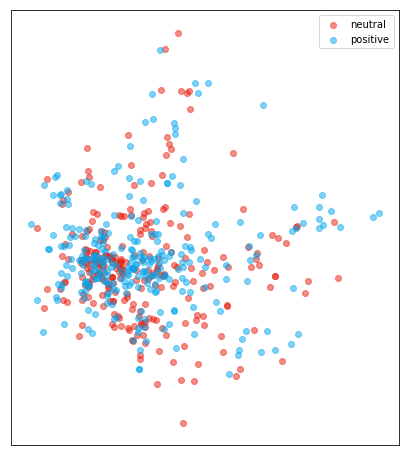

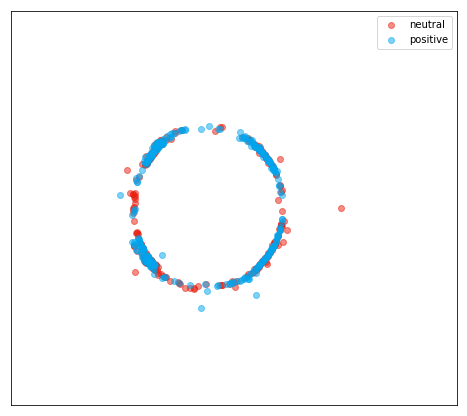

In [145]:
df = df_documents_athar_pos              

%store df
%run unsupervised_classification_athar.ipynb


In [146]:
train_Naive_Bayes(documents_athar_pos, list_all_words_athar_pos, 0.20)



documents in test_set: 	 1691
documents in training_set: 	 6765

Classifier accuracy percent: 87.34476641040804
Most Informative Features
                   stabl = True           positi : neutra =     26.9 : 1.0
               heterogen = True           positi : neutra =     26.9 : 1.0
                 simplic = True           positi : neutra =     26.9 : 1.0
                 primari = True           positi : neutra =     21.0 : 1.0
                 success = True           positi : neutra =     19.9 : 1.0
                  notabl = True           positi : neutra =     19.0 : 1.0
                 pioneer = True           positi : neutra =     19.0 : 1.0
                    easi = True           positi : neutra =     16.2 : 1.0
                  intens = True           positi : neutra =     15.0 : 1.0
                     saw = True           positi : neutra =     15.0 : 1.0
             nonindepend = True           positi : neutra =     15.0 : 1.0
                 impress = True      

# 7. Conclusion

Using the manually classified sentences by Athar (276 sentences are negative and 829 are positive), we have been able to train:
    - a naive Bayes classifier for negative sentiment with accuracy around 70%
    - a naive Bayes classifier for positive sentiment with accuracy around 90%

We could improve the accuracy of the negative sentiment classifier by increasing the number of negative sentences. We could use the current negative classifier to pre-screen sentences with negative sentiment and then manually check them. In order to reach 90% accuracy in a new negative classifier we need about 553 additional negative sentences, and therefore around 790 negative sentences pre-screened by the naive Bayes classifier we have trained here.  
